In [1]:
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt

import lsst.pipe.base as pipeBase
from lsst.afw.image.utils import getDistortedWcs

import lsst.afw.math as afwMath

import numpy as np


%matplotlib inline

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"

butler = dafPersist.Butler(DATADIR+"calexp_t") 

In [3]:
dataId = {"visit":784518,"filter":'r', "ccd":14}

In [4]:
sources = butler.get("src", dataId=dataId)
calexp = butler.get("calexp", dataId=dataId)

In [5]:
def getExposureMetadata(exposure):
        """!Extract metadata from an exposure

        @return an lsst.pipe.base.Struct containing the following exposure metadata:
        - bbox: parent bounding box
        - wcs: WCS (an lsst.afw.image.Wcs)
        - calib calibration (an lsst.afw.image.Calib), or None if unknown
        - filterName: name of filter, or None if unknown
        """
        exposureInfo = exposure.getInfo()
        filterName = exposureInfo.getFilter().getName() or None
        if filterName == "_unknown_":
            filterName = None
        return pipeBase.Struct(
            bbox=exposure.getBBox(),
            wcs=getDistortedWcs(exposureInfo),
            calib=exposureInfo.getCalib() if exposureInfo.hasCalib() else None,
            filterName=filterName,)


In [5]:
def get_threshold(dayDiff, factor=1):
    mi = dayDiff.getMaskedImage()
    bad = dayDiff.getMaskedImage().getMask().getPlaneBitMask(['BAD', 'SAT', 'EDGE', 'NO_DATA', ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.STDEVCLIP, sctrl)
    thres = (stats.getValue(afwMath.STDEVCLIP) * factor)
    return thres

def get_signal(dayDiff):
    mi = dayDiff.getMaskedImage()
    m = mi.getMask()
    bad = ~m.getPlaneBitMask(['DETECTED' ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.MEAN, sctrl)

    return (stats.getValue(afwMath.MEAN))
    

In [6]:
from copy import deepcopy

calexp = butler.get("calexp", dataId=dataId)
mi = calexp.getMaskedImage()
mi = deepcopy(mi)
m = mi.getMask()

bad = ~m.getPlaneBitMask(['DETECTED' ])
marray = m.getArray()


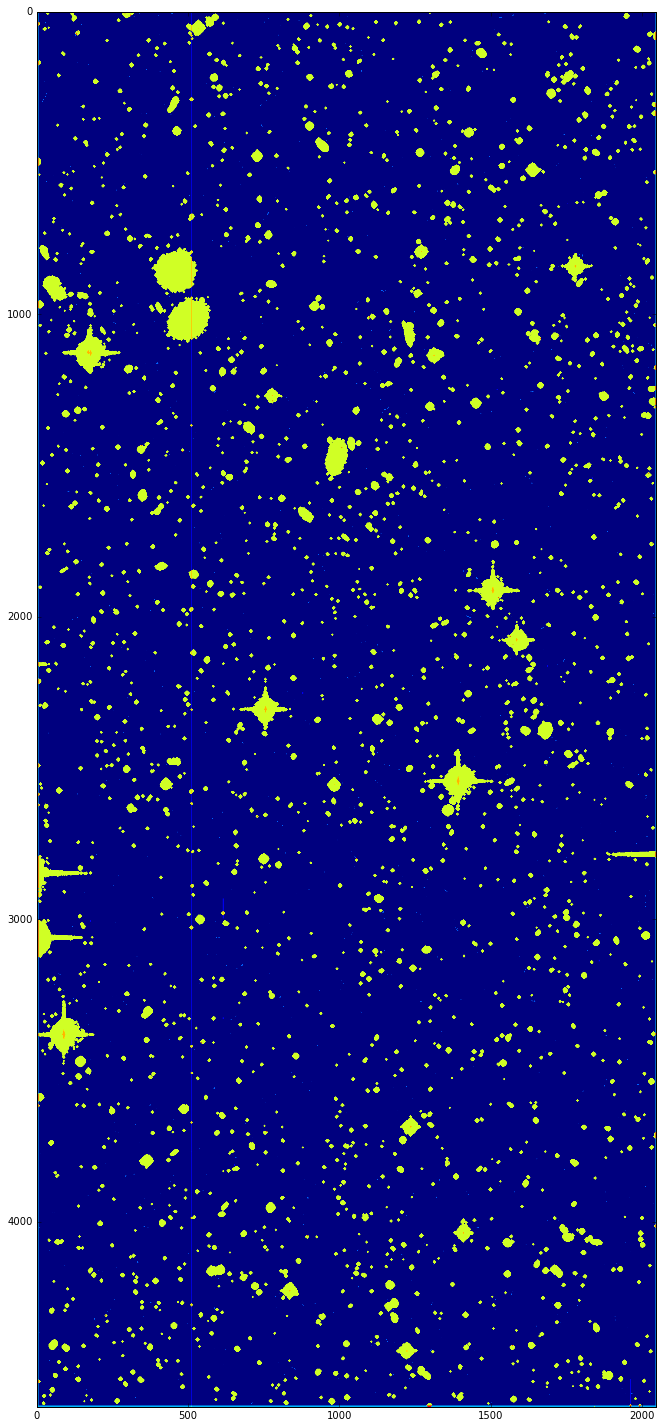

In [7]:

plt.figure(figsize=(50,25))
plt.imshow(m.getArray())
plt.show()

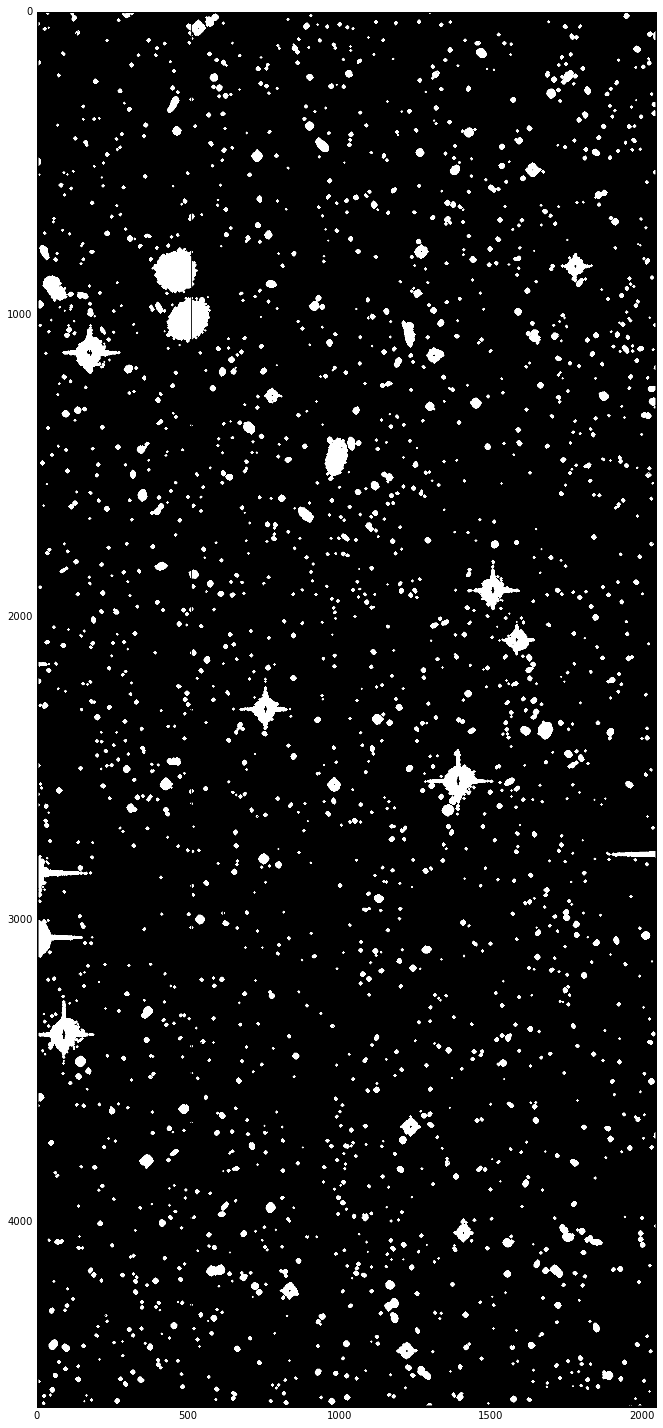

In [56]:

calexp = butler.get("calexp", dataId=dataId)
mi = calexp.getMaskedImage()
mi = deepcopy(mi)
m = mi.getMask()

bad = ~m.getPlaneBitMask(['DETECTED' ])
marray = m.getArray()

marray[marray&bad!=0]=0

plt.figure(figsize=(50,25))
plt.imshow(marray, cmap="gray")
plt.show()


array([ 17.14205742,  17.13021851,  17.11841774, ..., -19.71638489,
       -19.76082039, -19.80555534], dtype=float32)

In [65]:
bd

-33L

In [124]:
calexp = butler.get("calexp", dataId=dataId)
mi = calexp.getMaskedImage()
mi = deepcopy(mi)
im = mi.getImage().getArray()
m = mi.getMask()

bad = ~m.getPlaneBitMask(['DETECTED' ])
marray = m.getArray()
shape = im.shape


bool_mask = (marray&bad!=marray)
#im = im[bool_mask]
im = im[bool_mask]
#for i,m in enumerate(marray.ravel()):
   
    
        


#plt.figure(figsize=(50,20))
#plt.imshow(im, cmap="gray", vmin=0, vmax=20)
#plt.show()


In [126]:
im.mean()

135.83669

In [117]:
im.mean()

0.017112501

In [82]:
test = im[im!=0]
print test.mean()

135.837


In [102]:
test = np.array([[1,2,3],[1,2,1],[1,4,1]])
print test.shape

A = (test!=1)
print A
print test[A]

(3, 3)
[[False  True  True]
 [False  True False]
 [False  True False]]
[2 3 2 4]


In [336]:
print get_signal(calexp)
print np.mean(calexp.getMaskedImage().getImage().getArray())

5.48462291848
7.30701


In [316]:
mi = calexp.getMaskedImage()
m = mi.getMask()
m.getPlaneBitMask(['DETECTED'])

32L

In [6]:
calexps = []
for i, s in enumerate(b):
    print i
    calexps.append(butler.get("calexp", s.dataId))
   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [9]:
try:
        pool = multiprocessing.Pool()
        res =  pool.map(get_threshold, calexps)
finally:
        pool.close()

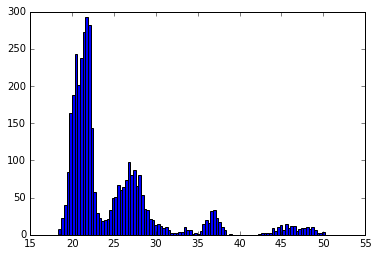

In [10]:
plt.hist(res, bins=100)
plt.show()

In [11]:
def get_mean(calexp):
    return calexp.getMaskedImage().getImage().getArray().mean()

def get_stn(calexp):
    return float(get_mean(calexp))/float(get_threshold(calexp))

In [12]:

try:
        pool = multiprocessing.Pool()
        stns =  pool.map(get_stn, calexps)
finally:
        pool.close()

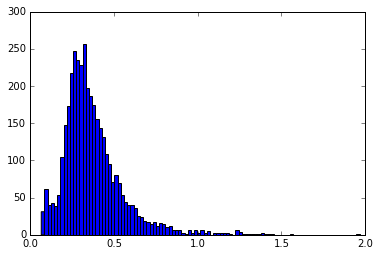

In [14]:
plt.hist(stns, bins=100)
plt.show()

In [281]:
import pickle

stns = pickle.load( open( "/datadec/cppm/jpreyes/CFHT_Production/stns.p", "rb" ) )


In [324]:
total_sn = []
for key in stns.keys():
    for subkey in stns[key].keys():
        total_sn.append(stns[key][subkey])

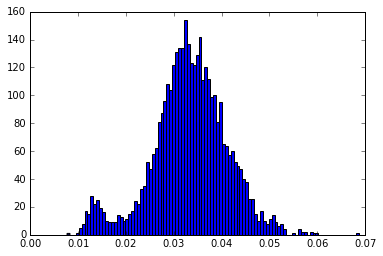

In [325]:
plt.hist(total_sn, bins=100)
plt.show()

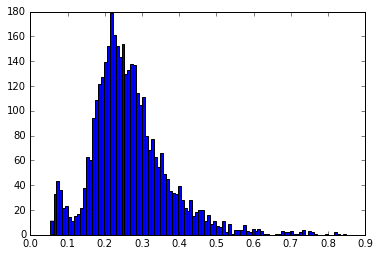

In [333]:
total_sn = []
for key in stns.keys():
    for subkey in stns[key].keys():
        total_sn.append(stns[key][subkey])
        
plt.hist(total_sn, bins=100)
plt.show()

8.52136382633


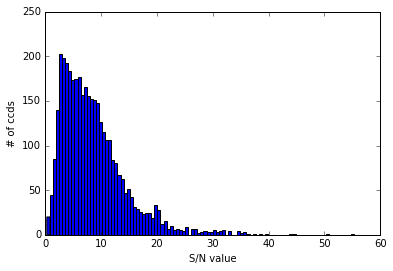

In [282]:
total_sn = []
for key in stns.keys():
    for subkey in stns[key].keys():
        total_sn.append(stns[key][subkey])
        
plt.hist(total_sn, bins=100)
print np.mean(total_sn)
plt.xlabel("S/N value")
plt.ylabel("# of ccds")
plt.show()

In [58]:
import random

low = []
high = []
ran = []

i=0
while i < 45:
    A = random.choice(values.keys())
    B = random.choice(values[A].keys())
    val = values[A][B]
    
    if val < 8.5 and len(low)<15:
        low.append((A,B,val))
        i+=1
    elif val > 0.75 and len(high)<15:
        high.append((A,B,val))
        i+=1
    elif len(ran)<15:
        ran.append((A,B,val))
        i+=1
        
                      


In [132]:
skmap = pickle.load( open("/datadec/cppm/jpreyes/CFHT_Production/detect_prod/deepCoadd/skyMap.pickle","r"))

In [147]:
print type(coord1)
print coord1

<class 'lsst.afw.coord._coord.Fk5Coord'>
Fk5Coord(214.2268017, 52.1738930, 2000.00)


In [ ]:
stns

In [271]:
patch_dict = {}
for visit in stns.keys():
    for ccd in stns[visit].keys():
        calexp =butler.get("calexp", dataId={"visit":visit, "ccd":ccd, "filter":"r"})
        wcs = calexp.getWcs()
        coord1 = wcs.pixelToSky(0,0)
        coord2 = wcs.pixelToSky(2048,4612)
        info = skmap.findTractPatchList([coord1, coord2])
        tract_info = info[0]
        patch_info = tract_info[1]
        
        for patch in patch_info:
            patch_index =  patch.getIndex()
            print patch_index, visit, ccd
            
            if patch_index not in patch_dict.keys():
                patch_dict.update({patch_index:{visit:{ccd:stns[visit][ccd]}}})
            elif visit not in patch_dict[patch_index].keys():
                patch_dict[patch_index].update({visit:{ccd:stns[visit][ccd]}})
            elif ccd not in patch_dict[patch_index][visit].keys():
                patch_dict[patch_index][visit].update({ccd:stns[visit][ccd]})
                
                                                       
                
                                                       

(5, 19) 982187 0
(5, 20) 982187 0
(5, 21) 982187 0
(5, 22) 982187 0
(5, 23) 982187 0
(5, 24) 982187 0
(6, 19) 982187 0
(6, 20) 982187 0
(6, 21) 982187 0
(6, 22) 982187 0
(6, 23) 982187 0
(6, 24) 982187 0
(7, 19) 982187 0
(7, 20) 982187 0
(7, 21) 982187 0
(7, 22) 982187 0
(7, 23) 982187 0
(7, 24) 982187 0
(7, 19) 982187 1
(7, 20) 982187 1
(7, 21) 982187 1
(7, 22) 982187 1
(7, 23) 982187 1
(7, 24) 982187 1
(8, 19) 982187 1
(8, 20) 982187 1
(8, 21) 982187 1
(8, 22) 982187 1
(8, 23) 982187 1
(8, 24) 982187 1
(9, 19) 982187 1
(9, 20) 982187 1
(9, 21) 982187 1
(9, 22) 982187 1
(9, 23) 982187 1
(9, 24) 982187 1
(9, 19) 982187 2
(9, 20) 982187 2
(9, 21) 982187 2
(9, 22) 982187 2
(9, 23) 982187 2
(9, 24) 982187 2
(10, 19) 982187 2
(10, 20) 982187 2
(10, 21) 982187 2
(10, 22) 982187 2
(10, 23) 982187 2
(10, 24) 982187 2
(11, 19) 982187 2
(11, 20) 982187 2
(11, 21) 982187 2
(11, 22) 982187 2
(11, 23) 982187 2
(11, 24) 982187 2
(11, 19) 982187 3
(11, 20) 982187 3
(11, 21) 982187 3
(11, 22) 982187 

(15, 10) 982187 23
(15, 11) 982187 23
(15, 12) 982187 23
(15, 13) 982187 23
(15, 14) 982187 23
(15, 15) 982187 23
(16, 10) 982187 23
(16, 11) 982187 23
(16, 12) 982187 23
(16, 13) 982187 23
(16, 14) 982187 23
(16, 15) 982187 23
(17, 10) 982187 23
(17, 11) 982187 23
(17, 12) 982187 23
(17, 13) 982187 23
(17, 14) 982187 23
(17, 15) 982187 23
(18, 10) 982187 23
(18, 11) 982187 23
(18, 12) 982187 23
(18, 13) 982187 23
(18, 14) 982187 23
(18, 15) 982187 23
(18, 10) 982187 24
(18, 11) 982187 24
(18, 12) 982187 24
(18, 13) 982187 24
(18, 14) 982187 24
(18, 15) 982187 24
(19, 10) 982187 24
(19, 11) 982187 24
(19, 12) 982187 24
(19, 13) 982187 24
(19, 14) 982187 24
(19, 15) 982187 24
(20, 10) 982187 24
(20, 11) 982187 24
(20, 12) 982187 24
(20, 13) 982187 24
(20, 14) 982187 24
(20, 15) 982187 24
(20, 10) 982187 25
(20, 11) 982187 25
(20, 12) 982187 25
(20, 13) 982187 25
(20, 14) 982187 25
(20, 15) 982187 25
(21, 10) 982187 25
(21, 11) 982187 25
(21, 12) 982187 25
(21, 13) 982187 25
(21, 14) 982

(13, 15) 967852 13
(13, 16) 967852 13
(13, 17) 967852 13
(13, 18) 967852 13
(13, 19) 967852 13
(13, 20) 967852 13
(14, 15) 967852 13
(14, 16) 967852 13
(14, 17) 967852 13
(14, 18) 967852 13
(14, 19) 967852 13
(14, 20) 967852 13
(15, 15) 967852 13
(15, 16) 967852 13
(15, 17) 967852 13
(15, 18) 967852 13
(15, 19) 967852 13
(15, 20) 967852 13
(16, 15) 967852 13
(16, 16) 967852 13
(16, 17) 967852 13
(16, 18) 967852 13
(16, 19) 967852 13
(16, 20) 967852 13
(16, 15) 967852 14
(16, 16) 967852 14
(16, 17) 967852 14
(16, 18) 967852 14
(16, 19) 967852 14
(16, 20) 967852 14
(17, 15) 967852 14
(17, 16) 967852 14
(17, 17) 967852 14
(17, 18) 967852 14
(17, 19) 967852 14
(17, 20) 967852 14
(18, 15) 967852 14
(18, 16) 967852 14
(18, 17) 967852 14
(18, 18) 967852 14
(18, 19) 967852 14
(18, 20) 967852 14
(18, 15) 967852 15
(18, 16) 967852 15
(18, 17) 967852 15
(18, 18) 967852 15
(18, 19) 967852 15
(18, 20) 967852 15
(19, 15) 967852 15
(19, 16) 967852 15
(19, 17) 967852 15
(19, 18) 967852 15
(19, 19) 967

(13, 20) 973326 4
(13, 21) 973326 4
(13, 22) 973326 4
(13, 23) 973326 4
(13, 24) 973326 4
(13, 25) 973326 4
(14, 20) 973326 4
(14, 21) 973326 4
(14, 22) 973326 4
(14, 23) 973326 4
(14, 24) 973326 4
(14, 25) 973326 4
(15, 20) 973326 4
(15, 21) 973326 4
(15, 22) 973326 4
(15, 23) 973326 4
(15, 24) 973326 4
(15, 25) 973326 4
(16, 20) 973326 4
(16, 21) 973326 4
(16, 22) 973326 4
(16, 23) 973326 4
(16, 24) 973326 4
(16, 25) 973326 4
(16, 20) 973326 5
(16, 21) 973326 5
(16, 22) 973326 5
(16, 23) 973326 5
(16, 24) 973326 5
(16, 25) 973326 5
(17, 20) 973326 5
(17, 21) 973326 5
(17, 22) 973326 5
(17, 23) 973326 5
(17, 24) 973326 5
(17, 25) 973326 5
(18, 20) 973326 5
(18, 21) 973326 5
(18, 22) 973326 5
(18, 23) 973326 5
(18, 24) 973326 5
(18, 25) 973326 5
(18, 20) 973326 6
(18, 21) 973326 6
(18, 22) 973326 6
(18, 23) 973326 6
(18, 24) 973326 6
(18, 25) 973326 6
(19, 20) 973326 6
(19, 21) 973326 6
(19, 22) 973326 6
(19, 23) 973326 6
(19, 24) 973326 6
(19, 25) 973326 6
(20, 20) 973326 6
(20, 21) 9

(5, 5) 973326 27
(5, 6) 973326 27
(5, 7) 973326 27
(5, 8) 973326 27
(5, 9) 973326 27
(5, 10) 973326 27
(6, 5) 973326 27
(6, 6) 973326 27
(6, 7) 973326 27
(6, 8) 973326 27
(6, 9) 973326 27
(6, 10) 973326 27
(7, 5) 973326 27
(7, 6) 973326 27
(7, 7) 973326 27
(7, 8) 973326 27
(7, 9) 973326 27
(7, 10) 973326 27
(7, 5) 973326 28
(7, 6) 973326 28
(7, 7) 973326 28
(7, 8) 973326 28
(7, 9) 973326 28
(7, 10) 973326 28
(8, 5) 973326 28
(8, 6) 973326 28
(8, 7) 973326 28
(8, 8) 973326 28
(8, 9) 973326 28
(8, 10) 973326 28
(9, 5) 973326 28
(9, 6) 973326 28
(9, 7) 973326 28
(9, 8) 973326 28
(9, 9) 973326 28
(9, 10) 973326 28
(9, 5) 973326 29
(9, 6) 973326 29
(9, 7) 973326 29
(9, 8) 973326 29
(9, 9) 973326 29
(9, 10) 973326 29
(10, 5) 973326 29
(10, 6) 973326 29
(10, 7) 973326 29
(10, 8) 973326 29
(10, 9) 973326 29
(10, 10) 973326 29
(11, 5) 973326 29
(11, 6) 973326 29
(11, 7) 973326 29
(11, 8) 973326 29
(11, 9) 973326 29
(11, 10) 973326 29
(11, 5) 973326 30
(11, 6) 973326 30
(11, 7) 973326 30
(11, 8)

(16, 15) 973327 14
(16, 16) 973327 14
(16, 17) 973327 14
(16, 18) 973327 14
(16, 19) 973327 14
(16, 20) 973327 14
(17, 15) 973327 14
(17, 16) 973327 14
(17, 17) 973327 14
(17, 18) 973327 14
(17, 19) 973327 14
(17, 20) 973327 14
(18, 15) 973327 14
(18, 16) 973327 14
(18, 17) 973327 14
(18, 18) 973327 14
(18, 19) 973327 14
(18, 20) 973327 14
(18, 15) 973327 15
(18, 16) 973327 15
(18, 17) 973327 15
(18, 18) 973327 15
(18, 19) 973327 15
(18, 20) 973327 15
(19, 15) 973327 15
(19, 16) 973327 15
(19, 17) 973327 15
(19, 18) 973327 15
(19, 19) 973327 15
(19, 20) 973327 15
(20, 15) 973327 15
(20, 16) 973327 15
(20, 17) 973327 15
(20, 18) 973327 15
(20, 19) 973327 15
(20, 20) 973327 15
(20, 15) 973327 16
(20, 16) 973327 16
(20, 17) 973327 16
(20, 18) 973327 16
(20, 19) 973327 16
(20, 20) 973327 16
(21, 15) 973327 16
(21, 16) 973327 16
(21, 17) 973327 16
(21, 18) 973327 16
(21, 19) 973327 16
(21, 20) 973327 16
(22, 15) 973327 16
(22, 16) 973327 16
(22, 17) 973327 16
(22, 18) 973327 16
(22, 19) 973

(9, 20) 973328 2
(9, 21) 973328 2
(9, 22) 973328 2
(9, 23) 973328 2
(9, 24) 973328 2
(10, 20) 973328 2
(10, 21) 973328 2
(10, 22) 973328 2
(10, 23) 973328 2
(10, 24) 973328 2
(11, 20) 973328 2
(11, 21) 973328 2
(11, 22) 973328 2
(11, 23) 973328 2
(11, 24) 973328 2
(11, 20) 973328 3
(11, 21) 973328 3
(11, 22) 973328 3
(11, 23) 973328 3
(11, 24) 973328 3
(12, 20) 973328 3
(12, 21) 973328 3
(12, 22) 973328 3
(12, 23) 973328 3
(12, 24) 973328 3
(13, 20) 973328 3
(13, 21) 973328 3
(13, 22) 973328 3
(13, 23) 973328 3
(13, 24) 973328 3
(14, 20) 973328 3
(14, 21) 973328 3
(14, 22) 973328 3
(14, 23) 973328 3
(14, 24) 973328 3
(13, 19) 973328 4
(13, 20) 973328 4
(13, 21) 973328 4
(13, 22) 973328 4
(13, 23) 973328 4
(13, 24) 973328 4
(14, 19) 973328 4
(14, 20) 973328 4
(14, 21) 973328 4
(14, 22) 973328 4
(14, 23) 973328 4
(14, 24) 973328 4
(15, 19) 973328 4
(15, 20) 973328 4
(15, 21) 973328 4
(15, 22) 973328 4
(15, 23) 973328 4
(15, 24) 973328 4
(16, 19) 973328 4
(16, 20) 973328 4
(16, 21) 973328

(20, 10) 973328 25
(20, 11) 973328 25
(20, 12) 973328 25
(20, 13) 973328 25
(20, 14) 973328 25
(20, 15) 973328 25
(21, 10) 973328 25
(21, 11) 973328 25
(21, 12) 973328 25
(21, 13) 973328 25
(21, 14) 973328 25
(21, 15) 973328 25
(22, 10) 973328 25
(22, 11) 973328 25
(22, 12) 973328 25
(22, 13) 973328 25
(22, 14) 973328 25
(22, 15) 973328 25
(22, 10) 973328 26
(22, 11) 973328 26
(22, 12) 973328 26
(22, 13) 973328 26
(22, 14) 973328 26
(22, 15) 973328 26
(23, 10) 973328 26
(23, 11) 973328 26
(23, 12) 973328 26
(23, 13) 973328 26
(23, 14) 973328 26
(23, 15) 973328 26
(24, 10) 973328 26
(24, 11) 973328 26
(24, 12) 973328 26
(24, 13) 973328 26
(24, 14) 973328 26
(24, 15) 973328 26
(5, 5) 973328 27
(5, 6) 973328 27
(5, 7) 973328 27
(5, 8) 973328 27
(5, 9) 973328 27
(5, 10) 973328 27
(6, 5) 973328 27
(6, 6) 973328 27
(6, 7) 973328 27
(6, 8) 973328 27
(6, 9) 973328 27
(6, 10) 973328 27
(7, 5) 973328 27
(7, 6) 973328 27
(7, 7) 973328 27
(7, 8) 973328 27
(7, 9) 973328 27
(7, 10) 973328 27
(7, 5) 

(15, 15) 973329 14
(15, 16) 973329 14
(15, 17) 973329 14
(15, 18) 973329 14
(15, 19) 973329 14
(15, 20) 973329 14
(16, 15) 973329 14
(16, 16) 973329 14
(16, 17) 973329 14
(16, 18) 973329 14
(16, 19) 973329 14
(16, 20) 973329 14
(17, 15) 973329 14
(17, 16) 973329 14
(17, 17) 973329 14
(17, 18) 973329 14
(17, 19) 973329 14
(17, 20) 973329 14
(18, 15) 973329 14
(18, 16) 973329 14
(18, 17) 973329 14
(18, 18) 973329 14
(18, 19) 973329 14
(18, 20) 973329 14
(18, 15) 973329 15
(18, 16) 973329 15
(18, 17) 973329 15
(18, 18) 973329 15
(18, 19) 973329 15
(18, 20) 973329 15
(19, 15) 973329 15
(19, 16) 973329 15
(19, 17) 973329 15
(19, 18) 973329 15
(19, 19) 973329 15
(19, 20) 973329 15
(20, 15) 973329 15
(20, 16) 973329 15
(20, 17) 973329 15
(20, 18) 973329 15
(20, 19) 973329 15
(20, 20) 973329 15
(20, 15) 973329 16
(20, 16) 973329 16
(20, 17) 973329 16
(20, 18) 973329 16
(20, 19) 973329 16
(20, 20) 973329 16
(21, 15) 973329 16
(21, 16) 973329 16
(21, 17) 973329 16
(21, 18) 973329 16
(21, 19) 973

(7, 20) 973330 1
(7, 21) 973330 1
(7, 22) 973330 1
(7, 23) 973330 1
(7, 24) 973330 1
(7, 25) 973330 1
(8, 20) 973330 1
(8, 21) 973330 1
(8, 22) 973330 1
(8, 23) 973330 1
(8, 24) 973330 1
(8, 25) 973330 1
(9, 20) 973330 1
(9, 21) 973330 1
(9, 22) 973330 1
(9, 23) 973330 1
(9, 24) 973330 1
(9, 25) 973330 1
(9, 20) 973330 2
(9, 21) 973330 2
(9, 22) 973330 2
(9, 23) 973330 2
(9, 24) 973330 2
(9, 25) 973330 2
(10, 20) 973330 2
(10, 21) 973330 2
(10, 22) 973330 2
(10, 23) 973330 2
(10, 24) 973330 2
(10, 25) 973330 2
(11, 20) 973330 2
(11, 21) 973330 2
(11, 22) 973330 2
(11, 23) 973330 2
(11, 24) 973330 2
(11, 25) 973330 2
(11, 20) 973330 3
(11, 21) 973330 3
(11, 22) 973330 3
(11, 23) 973330 3
(11, 24) 973330 3
(11, 25) 973330 3
(12, 20) 973330 3
(12, 21) 973330 3
(12, 22) 973330 3
(12, 23) 973330 3
(12, 24) 973330 3
(12, 25) 973330 3
(13, 20) 973330 3
(13, 21) 973330 3
(13, 22) 973330 3
(13, 23) 973330 3
(13, 24) 973330 3
(13, 25) 973330 3
(14, 20) 973330 3
(14, 21) 973330 3
(14, 22) 973330 

(18, 11) 973330 24
(18, 12) 973330 24
(18, 13) 973330 24
(18, 14) 973330 24
(18, 15) 973330 24
(18, 16) 973330 24
(19, 11) 973330 24
(19, 12) 973330 24
(19, 13) 973330 24
(19, 14) 973330 24
(19, 15) 973330 24
(19, 16) 973330 24
(20, 11) 973330 24
(20, 12) 973330 24
(20, 13) 973330 24
(20, 14) 973330 24
(20, 15) 973330 24
(20, 16) 973330 24
(20, 11) 973330 25
(20, 12) 973330 25
(20, 13) 973330 25
(20, 14) 973330 25
(20, 15) 973330 25
(20, 16) 973330 25
(21, 11) 973330 25
(21, 12) 973330 25
(21, 13) 973330 25
(21, 14) 973330 25
(21, 15) 973330 25
(21, 16) 973330 25
(22, 11) 973330 25
(22, 12) 973330 25
(22, 13) 973330 25
(22, 14) 973330 25
(22, 15) 973330 25
(22, 16) 973330 25
(22, 11) 973330 26
(22, 12) 973330 26
(22, 13) 973330 26
(22, 14) 973330 26
(22, 15) 973330 26
(23, 11) 973330 26
(23, 12) 973330 26
(23, 13) 973330 26
(23, 14) 973330 26
(23, 15) 973330 26
(24, 11) 973330 26
(24, 12) 973330 26
(24, 13) 973330 26
(24, 14) 973330 26
(24, 15) 973330 26
(5, 6) 973330 27
(5, 7) 973330 

(16, 15) 995364 14
(16, 16) 995364 14
(16, 17) 995364 14
(16, 18) 995364 14
(16, 19) 995364 14
(16, 20) 995364 14
(17, 15) 995364 14
(17, 16) 995364 14
(17, 17) 995364 14
(17, 18) 995364 14
(17, 19) 995364 14
(17, 20) 995364 14
(18, 15) 995364 14
(18, 16) 995364 14
(18, 17) 995364 14
(18, 18) 995364 14
(18, 19) 995364 14
(18, 20) 995364 14
(18, 15) 995364 15
(18, 16) 995364 15
(18, 17) 995364 15
(18, 18) 995364 15
(18, 19) 995364 15
(18, 20) 995364 15
(19, 15) 995364 15
(19, 16) 995364 15
(19, 17) 995364 15
(19, 18) 995364 15
(19, 19) 995364 15
(19, 20) 995364 15
(20, 15) 995364 15
(20, 16) 995364 15
(20, 17) 995364 15
(20, 18) 995364 15
(20, 19) 995364 15
(20, 20) 995364 15
(20, 15) 995364 16
(20, 16) 995364 16
(20, 17) 995364 16
(20, 18) 995364 16
(20, 19) 995364 16
(20, 20) 995364 16
(21, 15) 995364 16
(21, 16) 995364 16
(21, 17) 995364 16
(21, 18) 995364 16
(21, 19) 995364 16
(21, 20) 995364 16
(22, 15) 995364 16
(22, 16) 995364 16
(22, 17) 995364 16
(22, 18) 995364 16
(22, 19) 995

(9, 20) 995365 2
(9, 21) 995365 2
(9, 22) 995365 2
(9, 23) 995365 2
(9, 24) 995365 2
(9, 25) 995365 2
(10, 20) 995365 2
(10, 21) 995365 2
(10, 22) 995365 2
(10, 23) 995365 2
(10, 24) 995365 2
(10, 25) 995365 2
(11, 20) 995365 2
(11, 21) 995365 2
(11, 22) 995365 2
(11, 23) 995365 2
(11, 24) 995365 2
(11, 25) 995365 2
(12, 20) 995365 2
(12, 21) 995365 2
(12, 22) 995365 2
(12, 23) 995365 2
(12, 24) 995365 2
(12, 25) 995365 2
(11, 20) 995365 3
(11, 21) 995365 3
(11, 22) 995365 3
(11, 23) 995365 3
(11, 24) 995365 3
(11, 25) 995365 3
(12, 20) 995365 3
(12, 21) 995365 3
(12, 22) 995365 3
(12, 23) 995365 3
(12, 24) 995365 3
(12, 25) 995365 3
(13, 20) 995365 3
(13, 21) 995365 3
(13, 22) 995365 3
(13, 23) 995365 3
(13, 24) 995365 3
(13, 25) 995365 3
(14, 20) 995365 3
(14, 21) 995365 3
(14, 22) 995365 3
(14, 23) 995365 3
(14, 24) 995365 3
(14, 25) 995365 3
(14, 20) 995365 4
(14, 21) 995365 4
(14, 22) 995365 4
(14, 23) 995365 4
(14, 24) 995365 4
(14, 25) 995365 4
(15, 20) 995365 4
(15, 21) 995365 

(20, 10) 995365 25
(20, 11) 995365 25
(20, 12) 995365 25
(20, 13) 995365 25
(20, 14) 995365 25
(20, 15) 995365 25
(21, 10) 995365 25
(21, 11) 995365 25
(21, 12) 995365 25
(21, 13) 995365 25
(21, 14) 995365 25
(21, 15) 995365 25
(22, 10) 995365 25
(22, 11) 995365 25
(22, 12) 995365 25
(22, 13) 995365 25
(22, 14) 995365 25
(22, 15) 995365 25
(22, 10) 995365 26
(22, 11) 995365 26
(22, 12) 995365 26
(22, 13) 995365 26
(22, 14) 995365 26
(22, 15) 995365 26
(23, 10) 995365 26
(23, 11) 995365 26
(23, 12) 995365 26
(23, 13) 995365 26
(23, 14) 995365 26
(23, 15) 995365 26
(24, 10) 995365 26
(24, 11) 995365 26
(24, 12) 995365 26
(24, 13) 995365 26
(24, 14) 995365 26
(24, 15) 995365 26
(5, 5) 995365 27
(5, 6) 995365 27
(5, 7) 995365 27
(5, 8) 995365 27
(5, 9) 995365 27
(5, 10) 995365 27
(6, 5) 995365 27
(6, 6) 995365 27
(6, 7) 995365 27
(6, 8) 995365 27
(6, 9) 995365 27
(6, 10) 995365 27
(7, 5) 995365 27
(7, 6) 995365 27
(7, 7) 995365 27
(7, 8) 995365 27
(7, 9) 995365 27
(7, 10) 995365 27
(7, 5) 

(13, 14) 995366 13
(13, 15) 995366 13
(13, 16) 995366 13
(13, 17) 995366 13
(13, 18) 995366 13
(13, 19) 995366 13
(14, 14) 995366 13
(14, 15) 995366 13
(14, 16) 995366 13
(14, 17) 995366 13
(14, 18) 995366 13
(14, 19) 995366 13
(15, 14) 995366 13
(15, 15) 995366 13
(15, 16) 995366 13
(15, 17) 995366 13
(15, 18) 995366 13
(15, 19) 995366 13
(16, 14) 995366 13
(16, 15) 995366 13
(16, 16) 995366 13
(16, 17) 995366 13
(16, 18) 995366 13
(16, 19) 995366 13
(15, 14) 995366 14
(15, 15) 995366 14
(15, 16) 995366 14
(15, 17) 995366 14
(15, 18) 995366 14
(15, 19) 995366 14
(16, 14) 995366 14
(16, 15) 995366 14
(16, 16) 995366 14
(16, 17) 995366 14
(16, 18) 995366 14
(16, 19) 995366 14
(17, 14) 995366 14
(17, 15) 995366 14
(17, 16) 995366 14
(17, 17) 995366 14
(17, 18) 995366 14
(17, 19) 995366 14
(18, 14) 995366 14
(18, 15) 995366 14
(18, 16) 995366 14
(18, 17) 995366 14
(18, 18) 995366 14
(18, 19) 995366 14
(18, 14) 995366 15
(18, 15) 995366 15
(18, 16) 995366 15
(18, 17) 995366 15
(18, 18) 995

(9, 20) 995367 2
(9, 21) 995367 2
(9, 22) 995367 2
(9, 23) 995367 2
(9, 24) 995367 2
(9, 25) 995367 2
(10, 20) 995367 2
(10, 21) 995367 2
(10, 22) 995367 2
(10, 23) 995367 2
(10, 24) 995367 2
(10, 25) 995367 2
(11, 20) 995367 2
(11, 21) 995367 2
(11, 22) 995367 2
(11, 23) 995367 2
(11, 24) 995367 2
(11, 25) 995367 2
(11, 20) 995367 3
(11, 21) 995367 3
(11, 22) 995367 3
(11, 23) 995367 3
(11, 24) 995367 3
(11, 25) 995367 3
(12, 20) 995367 3
(12, 21) 995367 3
(12, 22) 995367 3
(12, 23) 995367 3
(12, 24) 995367 3
(12, 25) 995367 3
(13, 20) 995367 3
(13, 21) 995367 3
(13, 22) 995367 3
(13, 23) 995367 3
(13, 24) 995367 3
(13, 25) 995367 3
(13, 20) 995367 4
(13, 21) 995367 4
(13, 22) 995367 4
(13, 23) 995367 4
(13, 24) 995367 4
(13, 25) 995367 4
(14, 20) 995367 4
(14, 21) 995367 4
(14, 22) 995367 4
(14, 23) 995367 4
(14, 24) 995367 4
(14, 25) 995367 4
(15, 20) 995367 4
(15, 21) 995367 4
(15, 22) 995367 4
(15, 23) 995367 4
(15, 24) 995367 4
(15, 25) 995367 4
(16, 20) 995367 4
(16, 21) 995367 

(20, 10) 995367 25
(20, 11) 995367 25
(20, 12) 995367 25
(20, 13) 995367 25
(20, 14) 995367 25
(20, 15) 995367 25
(21, 10) 995367 25
(21, 11) 995367 25
(21, 12) 995367 25
(21, 13) 995367 25
(21, 14) 995367 25
(21, 15) 995367 25
(22, 10) 995367 25
(22, 11) 995367 25
(22, 12) 995367 25
(22, 13) 995367 25
(22, 14) 995367 25
(22, 15) 995367 25
(22, 10) 995367 26
(22, 11) 995367 26
(22, 12) 995367 26
(22, 13) 995367 26
(22, 14) 995367 26
(22, 15) 995367 26
(23, 10) 995367 26
(23, 11) 995367 26
(23, 12) 995367 26
(23, 13) 995367 26
(23, 14) 995367 26
(23, 15) 995367 26
(24, 10) 995367 26
(24, 11) 995367 26
(24, 12) 995367 26
(24, 13) 995367 26
(24, 14) 995367 26
(24, 15) 995367 26
(5, 5) 995367 27
(5, 6) 995367 27
(5, 7) 995367 27
(5, 8) 995367 27
(5, 9) 995367 27
(5, 10) 995367 27
(6, 5) 995367 27
(6, 6) 995367 27
(6, 7) 995367 27
(6, 8) 995367 27
(6, 9) 995367 27
(6, 10) 995367 27
(7, 5) 995367 27
(7, 6) 995367 27
(7, 7) 995367 27
(7, 8) 995367 27
(7, 9) 995367 27
(7, 10) 995367 27
(7, 5) 

(13, 15) 995368 13
(13, 16) 995368 13
(13, 17) 995368 13
(13, 18) 995368 13
(13, 19) 995368 13
(13, 20) 995368 13
(14, 15) 995368 13
(14, 16) 995368 13
(14, 17) 995368 13
(14, 18) 995368 13
(14, 19) 995368 13
(14, 20) 995368 13
(15, 15) 995368 13
(15, 16) 995368 13
(15, 17) 995368 13
(15, 18) 995368 13
(15, 19) 995368 13
(15, 20) 995368 13
(16, 15) 995368 13
(16, 16) 995368 13
(16, 17) 995368 13
(16, 18) 995368 13
(16, 19) 995368 13
(16, 20) 995368 13
(16, 15) 995368 14
(16, 16) 995368 14
(16, 17) 995368 14
(16, 18) 995368 14
(16, 19) 995368 14
(16, 20) 995368 14
(17, 15) 995368 14
(17, 16) 995368 14
(17, 17) 995368 14
(17, 18) 995368 14
(17, 19) 995368 14
(17, 20) 995368 14
(18, 15) 995368 14
(18, 16) 995368 14
(18, 17) 995368 14
(18, 18) 995368 14
(18, 19) 995368 14
(18, 20) 995368 14
(18, 15) 995368 15
(18, 16) 995368 15
(18, 17) 995368 15
(18, 18) 995368 15
(18, 19) 995368 15
(18, 20) 995368 15
(19, 15) 995368 15
(19, 16) 995368 15
(19, 17) 995368 15
(19, 18) 995368 15
(19, 19) 995

(11, 20) 973903 3
(11, 21) 973903 3
(11, 22) 973903 3
(11, 23) 973903 3
(11, 24) 973903 3
(12, 20) 973903 3
(12, 21) 973903 3
(12, 22) 973903 3
(12, 23) 973903 3
(12, 24) 973903 3
(13, 20) 973903 3
(13, 21) 973903 3
(13, 22) 973903 3
(13, 23) 973903 3
(13, 24) 973903 3
(13, 20) 973903 4
(13, 21) 973903 4
(13, 22) 973903 4
(13, 23) 973903 4
(13, 24) 973903 4
(14, 20) 973903 4
(14, 21) 973903 4
(14, 22) 973903 4
(14, 23) 973903 4
(14, 24) 973903 4
(15, 20) 973903 4
(15, 21) 973903 4
(15, 22) 973903 4
(15, 23) 973903 4
(15, 24) 973903 4
(16, 20) 973903 4
(16, 21) 973903 4
(16, 22) 973903 4
(16, 23) 973903 4
(16, 24) 973903 4
(15, 19) 973903 5
(15, 20) 973903 5
(15, 21) 973903 5
(15, 22) 973903 5
(15, 23) 973903 5
(15, 24) 973903 5
(16, 19) 973903 5
(16, 20) 973903 5
(16, 21) 973903 5
(16, 22) 973903 5
(16, 23) 973903 5
(16, 24) 973903 5
(17, 19) 973903 5
(17, 20) 973903 5
(17, 21) 973903 5
(17, 22) 973903 5
(17, 23) 973903 5
(17, 24) 973903 5
(18, 19) 973903 5
(18, 20) 973903 5
(18, 21) 9

(22, 10) 973903 26
(22, 11) 973903 26
(22, 12) 973903 26
(22, 13) 973903 26
(22, 14) 973903 26
(22, 15) 973903 26
(23, 10) 973903 26
(23, 11) 973903 26
(23, 12) 973903 26
(23, 13) 973903 26
(23, 14) 973903 26
(23, 15) 973903 26
(24, 10) 973903 26
(24, 11) 973903 26
(24, 12) 973903 26
(24, 13) 973903 26
(24, 14) 973903 26
(24, 15) 973903 26
(5, 5) 973903 27
(5, 6) 973903 27
(5, 7) 973903 27
(5, 8) 973903 27
(5, 9) 973903 27
(5, 10) 973903 27
(6, 5) 973903 27
(6, 6) 973903 27
(6, 7) 973903 27
(6, 8) 973903 27
(6, 9) 973903 27
(6, 10) 973903 27
(7, 5) 973903 27
(7, 6) 973903 27
(7, 7) 973903 27
(7, 8) 973903 27
(7, 9) 973903 27
(7, 10) 973903 27
(7, 5) 973903 28
(7, 6) 973903 28
(7, 7) 973903 28
(7, 8) 973903 28
(7, 9) 973903 28
(7, 10) 973903 28
(8, 5) 973903 28
(8, 6) 973903 28
(8, 7) 973903 28
(8, 8) 973903 28
(8, 9) 973903 28
(8, 10) 973903 28
(9, 5) 973903 28
(9, 6) 973903 28
(9, 7) 973903 28
(9, 8) 973903 28
(9, 9) 973903 28
(9, 10) 973903 28
(9, 5) 973903 29
(9, 6) 973903 29
(9, 7)

(18, 15) 979510 15
(18, 16) 979510 15
(18, 17) 979510 15
(18, 18) 979510 15
(18, 19) 979510 15
(18, 20) 979510 15
(19, 15) 979510 15
(19, 16) 979510 15
(19, 17) 979510 15
(19, 18) 979510 15
(19, 19) 979510 15
(19, 20) 979510 15
(20, 15) 979510 15
(20, 16) 979510 15
(20, 17) 979510 15
(20, 18) 979510 15
(20, 19) 979510 15
(20, 20) 979510 15
(20, 15) 979510 16
(20, 16) 979510 16
(20, 17) 979510 16
(20, 18) 979510 16
(20, 19) 979510 16
(20, 20) 979510 16
(21, 15) 979510 16
(21, 16) 979510 16
(21, 17) 979510 16
(21, 18) 979510 16
(21, 19) 979510 16
(21, 20) 979510 16
(22, 15) 979510 16
(22, 16) 979510 16
(22, 17) 979510 16
(22, 18) 979510 16
(22, 19) 979510 16
(22, 20) 979510 16
(22, 15) 979510 17
(22, 16) 979510 17
(22, 17) 979510 17
(22, 18) 979510 17
(22, 19) 979510 17
(22, 20) 979510 17
(23, 15) 979510 17
(23, 16) 979510 17
(23, 17) 979510 17
(23, 18) 979510 17
(23, 19) 979510 17
(23, 20) 979510 17
(24, 15) 979510 17
(24, 16) 979510 17
(24, 17) 979510 17
(24, 18) 979510 17
(24, 19) 979

(12, 20) 979511 3
(12, 21) 979511 3
(12, 22) 979511 3
(12, 23) 979511 3
(12, 24) 979511 3
(12, 25) 979511 3
(13, 20) 979511 3
(13, 21) 979511 3
(13, 22) 979511 3
(13, 23) 979511 3
(13, 24) 979511 3
(13, 25) 979511 3
(14, 20) 979511 3
(14, 21) 979511 3
(14, 22) 979511 3
(14, 23) 979511 3
(14, 24) 979511 3
(14, 25) 979511 3
(14, 20) 979511 4
(14, 21) 979511 4
(14, 22) 979511 4
(14, 23) 979511 4
(14, 24) 979511 4
(14, 25) 979511 4
(15, 20) 979511 4
(15, 21) 979511 4
(15, 22) 979511 4
(15, 23) 979511 4
(15, 24) 979511 4
(15, 25) 979511 4
(16, 20) 979511 4
(16, 21) 979511 4
(16, 22) 979511 4
(16, 23) 979511 4
(16, 24) 979511 4
(16, 25) 979511 4
(16, 20) 979511 5
(16, 21) 979511 5
(16, 22) 979511 5
(16, 23) 979511 5
(16, 24) 979511 5
(16, 25) 979511 5
(17, 20) 979511 5
(17, 21) 979511 5
(17, 22) 979511 5
(17, 23) 979511 5
(17, 24) 979511 5
(17, 25) 979511 5
(18, 20) 979511 5
(18, 21) 979511 5
(18, 22) 979511 5
(18, 23) 979511 5
(18, 24) 979511 5
(18, 25) 979511 5
(18, 20) 979511 6
(18, 21) 9

(22, 10) 979511 26
(22, 11) 979511 26
(22, 12) 979511 26
(22, 13) 979511 26
(22, 14) 979511 26
(22, 15) 979511 26
(23, 10) 979511 26
(23, 11) 979511 26
(23, 12) 979511 26
(23, 13) 979511 26
(23, 14) 979511 26
(23, 15) 979511 26
(24, 10) 979511 26
(24, 11) 979511 26
(24, 12) 979511 26
(24, 13) 979511 26
(24, 14) 979511 26
(24, 15) 979511 26
(5, 5) 979511 27
(5, 6) 979511 27
(5, 7) 979511 27
(5, 8) 979511 27
(5, 9) 979511 27
(5, 10) 979511 27
(6, 5) 979511 27
(6, 6) 979511 27
(6, 7) 979511 27
(6, 8) 979511 27
(6, 9) 979511 27
(6, 10) 979511 27
(7, 5) 979511 27
(7, 6) 979511 27
(7, 7) 979511 27
(7, 8) 979511 27
(7, 9) 979511 27
(7, 10) 979511 27
(7, 5) 979511 28
(7, 6) 979511 28
(7, 7) 979511 28
(7, 8) 979511 28
(7, 9) 979511 28
(7, 10) 979511 28
(8, 5) 979511 28
(8, 6) 979511 28
(8, 7) 979511 28
(8, 8) 979511 28
(8, 9) 979511 28
(8, 10) 979511 28
(9, 5) 979511 28
(9, 6) 979511 28
(9, 7) 979511 28
(9, 8) 979511 28
(9, 9) 979511 28
(9, 10) 979511 28
(9, 5) 979511 29
(9, 6) 979511 29
(9, 7)

(16, 14) 979512 14
(16, 15) 979512 14
(16, 16) 979512 14
(16, 17) 979512 14
(16, 18) 979512 14
(16, 19) 979512 14
(17, 14) 979512 14
(17, 15) 979512 14
(17, 16) 979512 14
(17, 17) 979512 14
(17, 18) 979512 14
(17, 19) 979512 14
(18, 14) 979512 14
(18, 15) 979512 14
(18, 16) 979512 14
(18, 17) 979512 14
(18, 18) 979512 14
(18, 19) 979512 14
(18, 14) 979512 15
(18, 15) 979512 15
(18, 16) 979512 15
(18, 17) 979512 15
(18, 18) 979512 15
(18, 19) 979512 15
(19, 14) 979512 15
(19, 15) 979512 15
(19, 16) 979512 15
(19, 17) 979512 15
(19, 18) 979512 15
(19, 19) 979512 15
(20, 14) 979512 15
(20, 15) 979512 15
(20, 16) 979512 15
(20, 17) 979512 15
(20, 18) 979512 15
(20, 19) 979512 15
(20, 14) 979512 16
(20, 15) 979512 16
(20, 16) 979512 16
(20, 17) 979512 16
(20, 18) 979512 16
(20, 19) 979512 16
(21, 14) 979512 16
(21, 15) 979512 16
(21, 16) 979512 16
(21, 17) 979512 16
(21, 18) 979512 16
(21, 19) 979512 16
(22, 14) 979512 16
(22, 15) 979512 16
(22, 16) 979512 16
(22, 17) 979512 16
(22, 18) 979

(13, 20) 979513 4
(13, 21) 979513 4
(13, 22) 979513 4
(13, 23) 979513 4
(13, 24) 979513 4
(13, 25) 979513 4
(14, 20) 979513 4
(14, 21) 979513 4
(14, 22) 979513 4
(14, 23) 979513 4
(14, 24) 979513 4
(14, 25) 979513 4
(15, 20) 979513 4
(15, 21) 979513 4
(15, 22) 979513 4
(15, 23) 979513 4
(15, 24) 979513 4
(15, 25) 979513 4
(16, 20) 979513 4
(16, 21) 979513 4
(16, 22) 979513 4
(16, 23) 979513 4
(16, 24) 979513 4
(16, 25) 979513 4
(16, 20) 979513 5
(16, 21) 979513 5
(16, 22) 979513 5
(16, 23) 979513 5
(16, 24) 979513 5
(16, 25) 979513 5
(17, 20) 979513 5
(17, 21) 979513 5
(17, 22) 979513 5
(17, 23) 979513 5
(17, 24) 979513 5
(17, 25) 979513 5
(18, 20) 979513 5
(18, 21) 979513 5
(18, 22) 979513 5
(18, 23) 979513 5
(18, 24) 979513 5
(18, 25) 979513 5
(18, 20) 979513 6
(18, 21) 979513 6
(18, 22) 979513 6
(18, 23) 979513 6
(18, 24) 979513 6
(18, 25) 979513 6
(19, 20) 979513 6
(19, 21) 979513 6
(19, 22) 979513 6
(19, 23) 979513 6
(19, 24) 979513 6
(19, 25) 979513 6
(20, 20) 979513 6
(20, 21) 9

(5, 5) 979513 27
(5, 6) 979513 27
(5, 7) 979513 27
(5, 8) 979513 27
(5, 9) 979513 27
(5, 10) 979513 27
(6, 5) 979513 27
(6, 6) 979513 27
(6, 7) 979513 27
(6, 8) 979513 27
(6, 9) 979513 27
(6, 10) 979513 27
(7, 5) 979513 27
(7, 6) 979513 27
(7, 7) 979513 27
(7, 8) 979513 27
(7, 9) 979513 27
(7, 10) 979513 27
(7, 5) 979513 28
(7, 6) 979513 28
(7, 7) 979513 28
(7, 8) 979513 28
(7, 9) 979513 28
(7, 10) 979513 28
(8, 5) 979513 28
(8, 6) 979513 28
(8, 7) 979513 28
(8, 8) 979513 28
(8, 9) 979513 28
(8, 10) 979513 28
(9, 5) 979513 28
(9, 6) 979513 28
(9, 7) 979513 28
(9, 8) 979513 28
(9, 9) 979513 28
(9, 10) 979513 28
(9, 5) 979513 29
(9, 6) 979513 29
(9, 7) 979513 29
(9, 8) 979513 29
(9, 9) 979513 29
(9, 10) 979513 29
(10, 5) 979513 29
(10, 6) 979513 29
(10, 7) 979513 29
(10, 8) 979513 29
(10, 9) 979513 29
(10, 10) 979513 29
(11, 5) 979513 29
(11, 6) 979513 29
(11, 7) 979513 29
(11, 8) 979513 29
(11, 9) 979513 29
(11, 10) 979513 29
(11, 5) 979513 30
(11, 6) 979513 30
(11, 7) 979513 30
(11, 8)

(16, 15) 979514 14
(16, 16) 979514 14
(16, 17) 979514 14
(16, 18) 979514 14
(16, 19) 979514 14
(16, 20) 979514 14
(17, 15) 979514 14
(17, 16) 979514 14
(17, 17) 979514 14
(17, 18) 979514 14
(17, 19) 979514 14
(17, 20) 979514 14
(18, 15) 979514 14
(18, 16) 979514 14
(18, 17) 979514 14
(18, 18) 979514 14
(18, 19) 979514 14
(18, 20) 979514 14
(18, 15) 979514 15
(18, 16) 979514 15
(18, 17) 979514 15
(18, 18) 979514 15
(18, 19) 979514 15
(18, 20) 979514 15
(19, 15) 979514 15
(19, 16) 979514 15
(19, 17) 979514 15
(19, 18) 979514 15
(19, 19) 979514 15
(19, 20) 979514 15
(20, 15) 979514 15
(20, 16) 979514 15
(20, 17) 979514 15
(20, 18) 979514 15
(20, 19) 979514 15
(20, 20) 979514 15
(20, 15) 979514 16
(20, 16) 979514 16
(20, 17) 979514 16
(20, 18) 979514 16
(20, 19) 979514 16
(20, 20) 979514 16
(21, 15) 979514 16
(21, 16) 979514 16
(21, 17) 979514 16
(21, 18) 979514 16
(21, 19) 979514 16
(21, 20) 979514 16
(22, 15) 979514 16
(22, 16) 979514 16
(22, 17) 979514 16
(22, 18) 979514 16
(22, 19) 979

(13, 20) 973901 4
(13, 21) 973901 4
(13, 22) 973901 4
(13, 23) 973901 4
(13, 24) 973901 4
(13, 25) 973901 4
(14, 20) 973901 4
(14, 21) 973901 4
(14, 22) 973901 4
(14, 23) 973901 4
(14, 24) 973901 4
(14, 25) 973901 4
(15, 20) 973901 4
(15, 21) 973901 4
(15, 22) 973901 4
(15, 23) 973901 4
(15, 24) 973901 4
(15, 25) 973901 4
(16, 20) 973901 4
(16, 21) 973901 4
(16, 22) 973901 4
(16, 23) 973901 4
(16, 24) 973901 4
(16, 25) 973901 4
(16, 20) 973901 5
(16, 21) 973901 5
(16, 22) 973901 5
(16, 23) 973901 5
(16, 24) 973901 5
(16, 25) 973901 5
(17, 20) 973901 5
(17, 21) 973901 5
(17, 22) 973901 5
(17, 23) 973901 5
(17, 24) 973901 5
(17, 25) 973901 5
(18, 20) 973901 5
(18, 21) 973901 5
(18, 22) 973901 5
(18, 23) 973901 5
(18, 24) 973901 5
(18, 25) 973901 5
(18, 20) 973901 6
(18, 21) 973901 6
(18, 22) 973901 6
(18, 23) 973901 6
(18, 24) 973901 6
(18, 25) 973901 6
(19, 20) 973901 6
(19, 21) 973901 6
(19, 22) 973901 6
(19, 23) 973901 6
(19, 24) 973901 6
(19, 25) 973901 6
(20, 20) 973901 6
(20, 21) 9

(5, 5) 973901 27
(5, 6) 973901 27
(5, 7) 973901 27
(5, 8) 973901 27
(5, 9) 973901 27
(5, 10) 973901 27
(6, 5) 973901 27
(6, 6) 973901 27
(6, 7) 973901 27
(6, 8) 973901 27
(6, 9) 973901 27
(6, 10) 973901 27
(7, 5) 973901 27
(7, 6) 973901 27
(7, 7) 973901 27
(7, 8) 973901 27
(7, 9) 973901 27
(7, 10) 973901 27
(7, 5) 973901 28
(7, 6) 973901 28
(7, 7) 973901 28
(7, 8) 973901 28
(7, 9) 973901 28
(7, 10) 973901 28
(8, 5) 973901 28
(8, 6) 973901 28
(8, 7) 973901 28
(8, 8) 973901 28
(8, 9) 973901 28
(8, 10) 973901 28
(9, 5) 973901 28
(9, 6) 973901 28
(9, 7) 973901 28
(9, 8) 973901 28
(9, 9) 973901 28
(9, 10) 973901 28
(9, 5) 973901 29
(9, 6) 973901 29
(9, 7) 973901 29
(9, 8) 973901 29
(9, 9) 973901 29
(9, 10) 973901 29
(10, 5) 973901 29
(10, 6) 973901 29
(10, 7) 973901 29
(10, 8) 973901 29
(10, 9) 973901 29
(10, 10) 973901 29
(11, 5) 973901 29
(11, 6) 973901 29
(11, 7) 973901 29
(11, 8) 973901 29
(11, 9) 973901 29
(11, 10) 973901 29
(11, 5) 973901 30
(11, 6) 973901 30
(11, 7) 973901 30
(11, 8)

(18, 15) 973902 15
(18, 16) 973902 15
(18, 17) 973902 15
(18, 18) 973902 15
(18, 19) 973902 15
(18, 20) 973902 15
(19, 15) 973902 15
(19, 16) 973902 15
(19, 17) 973902 15
(19, 18) 973902 15
(19, 19) 973902 15
(19, 20) 973902 15
(20, 15) 973902 15
(20, 16) 973902 15
(20, 17) 973902 15
(20, 18) 973902 15
(20, 19) 973902 15
(20, 20) 973902 15
(20, 15) 973902 16
(20, 16) 973902 16
(20, 17) 973902 16
(20, 18) 973902 16
(20, 19) 973902 16
(20, 20) 973902 16
(21, 15) 973902 16
(21, 16) 973902 16
(21, 17) 973902 16
(21, 18) 973902 16
(21, 19) 973902 16
(21, 20) 973902 16
(22, 15) 973902 16
(22, 16) 973902 16
(22, 17) 973902 16
(22, 18) 973902 16
(22, 19) 973902 16
(22, 20) 973902 16
(22, 15) 973902 17
(22, 16) 973902 17
(22, 17) 973902 17
(22, 18) 973902 17
(22, 19) 973902 17
(22, 20) 973902 17
(23, 15) 973902 17
(23, 16) 973902 17
(23, 17) 973902 17
(23, 18) 973902 17
(23, 19) 973902 17
(23, 20) 973902 17
(24, 15) 973902 17
(24, 16) 973902 17
(24, 17) 973902 17
(24, 18) 973902 17
(24, 19) 973

(11, 20) 981583 3
(11, 21) 981583 3
(11, 22) 981583 3
(11, 23) 981583 3
(11, 24) 981583 3
(11, 25) 981583 3
(12, 20) 981583 3
(12, 21) 981583 3
(12, 22) 981583 3
(12, 23) 981583 3
(12, 24) 981583 3
(12, 25) 981583 3
(13, 20) 981583 3
(13, 21) 981583 3
(13, 22) 981583 3
(13, 23) 981583 3
(13, 24) 981583 3
(13, 25) 981583 3
(14, 20) 981583 3
(14, 21) 981583 3
(14, 22) 981583 3
(14, 23) 981583 3
(14, 24) 981583 3
(14, 25) 981583 3
(13, 20) 981583 4
(13, 21) 981583 4
(13, 22) 981583 4
(13, 23) 981583 4
(13, 24) 981583 4
(13, 25) 981583 4
(14, 20) 981583 4
(14, 21) 981583 4
(14, 22) 981583 4
(14, 23) 981583 4
(14, 24) 981583 4
(14, 25) 981583 4
(15, 20) 981583 4
(15, 21) 981583 4
(15, 22) 981583 4
(15, 23) 981583 4
(15, 24) 981583 4
(15, 25) 981583 4
(16, 20) 981583 4
(16, 21) 981583 4
(16, 22) 981583 4
(16, 23) 981583 4
(16, 24) 981583 4
(16, 25) 981583 4
(16, 20) 981583 5
(16, 21) 981583 5
(16, 22) 981583 5
(16, 23) 981583 5
(16, 24) 981583 5
(16, 25) 981583 5
(17, 20) 981583 5
(17, 21) 9

(22, 10) 981583 26
(22, 11) 981583 26
(22, 12) 981583 26
(22, 13) 981583 26
(22, 14) 981583 26
(22, 15) 981583 26
(23, 10) 981583 26
(23, 11) 981583 26
(23, 12) 981583 26
(23, 13) 981583 26
(23, 14) 981583 26
(23, 15) 981583 26
(24, 10) 981583 26
(24, 11) 981583 26
(24, 12) 981583 26
(24, 13) 981583 26
(24, 14) 981583 26
(24, 15) 981583 26
(5, 5) 981583 27
(5, 6) 981583 27
(5, 7) 981583 27
(5, 8) 981583 27
(5, 9) 981583 27
(5, 10) 981583 27
(6, 5) 981583 27
(6, 6) 981583 27
(6, 7) 981583 27
(6, 8) 981583 27
(6, 9) 981583 27
(6, 10) 981583 27
(7, 5) 981583 27
(7, 6) 981583 27
(7, 7) 981583 27
(7, 8) 981583 27
(7, 9) 981583 27
(7, 10) 981583 27
(7, 5) 981583 28
(7, 6) 981583 28
(7, 7) 981583 28
(7, 8) 981583 28
(7, 9) 981583 28
(7, 10) 981583 28
(8, 5) 981583 28
(8, 6) 981583 28
(8, 7) 981583 28
(8, 8) 981583 28
(8, 9) 981583 28
(8, 10) 981583 28
(9, 5) 981583 28
(9, 6) 981583 28
(9, 7) 981583 28
(9, 8) 981583 28
(9, 9) 981583 28
(9, 10) 981583 28
(9, 5) 981583 29
(9, 6) 981583 29
(9, 7)

(15, 15) 973904 14
(15, 16) 973904 14
(15, 17) 973904 14
(15, 18) 973904 14
(15, 19) 973904 14
(15, 20) 973904 14
(16, 15) 973904 14
(16, 16) 973904 14
(16, 17) 973904 14
(16, 18) 973904 14
(16, 19) 973904 14
(16, 20) 973904 14
(17, 15) 973904 14
(17, 16) 973904 14
(17, 17) 973904 14
(17, 18) 973904 14
(17, 19) 973904 14
(17, 20) 973904 14
(18, 15) 973904 14
(18, 16) 973904 14
(18, 17) 973904 14
(18, 18) 973904 14
(18, 19) 973904 14
(18, 20) 973904 14
(18, 15) 973904 15
(18, 16) 973904 15
(18, 17) 973904 15
(18, 18) 973904 15
(18, 19) 973904 15
(18, 20) 973904 15
(19, 15) 973904 15
(19, 16) 973904 15
(19, 17) 973904 15
(19, 18) 973904 15
(19, 19) 973904 15
(19, 20) 973904 15
(20, 15) 973904 15
(20, 16) 973904 15
(20, 17) 973904 15
(20, 18) 973904 15
(20, 19) 973904 15
(20, 20) 973904 15
(20, 15) 973904 16
(20, 16) 973904 16
(20, 17) 973904 16
(20, 18) 973904 16
(20, 19) 973904 16
(20, 20) 973904 16
(21, 15) 973904 16
(21, 16) 973904 16
(21, 17) 973904 16
(21, 18) 973904 16
(21, 19) 973

(7, 19) 981585 1
(7, 20) 981585 1
(7, 21) 981585 1
(7, 22) 981585 1
(7, 23) 981585 1
(7, 24) 981585 1
(8, 19) 981585 1
(8, 20) 981585 1
(8, 21) 981585 1
(8, 22) 981585 1
(8, 23) 981585 1
(8, 24) 981585 1
(9, 19) 981585 1
(9, 20) 981585 1
(9, 21) 981585 1
(9, 22) 981585 1
(9, 23) 981585 1
(9, 24) 981585 1
(9, 19) 981585 2
(9, 20) 981585 2
(9, 21) 981585 2
(9, 22) 981585 2
(9, 23) 981585 2
(9, 24) 981585 2
(10, 19) 981585 2
(10, 20) 981585 2
(10, 21) 981585 2
(10, 22) 981585 2
(10, 23) 981585 2
(10, 24) 981585 2
(11, 19) 981585 2
(11, 20) 981585 2
(11, 21) 981585 2
(11, 22) 981585 2
(11, 23) 981585 2
(11, 24) 981585 2
(11, 19) 981585 3
(11, 20) 981585 3
(11, 21) 981585 3
(11, 22) 981585 3
(11, 23) 981585 3
(11, 24) 981585 3
(12, 19) 981585 3
(12, 20) 981585 3
(12, 21) 981585 3
(12, 22) 981585 3
(12, 23) 981585 3
(12, 24) 981585 3
(13, 19) 981585 3
(13, 20) 981585 3
(13, 21) 981585 3
(13, 22) 981585 3
(13, 23) 981585 3
(13, 24) 981585 3
(14, 19) 981585 3
(14, 20) 981585 3
(14, 21) 981585 

(18, 10) 981585 24
(18, 11) 981585 24
(18, 12) 981585 24
(18, 13) 981585 24
(18, 14) 981585 24
(18, 15) 981585 24
(19, 10) 981585 24
(19, 11) 981585 24
(19, 12) 981585 24
(19, 13) 981585 24
(19, 14) 981585 24
(19, 15) 981585 24
(20, 10) 981585 24
(20, 11) 981585 24
(20, 12) 981585 24
(20, 13) 981585 24
(20, 14) 981585 24
(20, 15) 981585 24
(20, 10) 981585 25
(20, 11) 981585 25
(20, 12) 981585 25
(20, 13) 981585 25
(20, 14) 981585 25
(20, 15) 981585 25
(21, 10) 981585 25
(21, 11) 981585 25
(21, 12) 981585 25
(21, 13) 981585 25
(21, 14) 981585 25
(21, 15) 981585 25
(22, 10) 981585 25
(22, 11) 981585 25
(22, 12) 981585 25
(22, 13) 981585 25
(22, 14) 981585 25
(22, 15) 981585 25
(22, 10) 981585 26
(22, 11) 981585 26
(22, 12) 981585 26
(22, 13) 981585 26
(22, 14) 981585 26
(22, 15) 981585 26
(23, 10) 981585 26
(23, 11) 981585 26
(23, 12) 981585 26
(23, 13) 981585 26
(23, 14) 981585 26
(23, 15) 981585 26
(24, 10) 981585 26
(24, 11) 981585 26
(24, 12) 981585 26
(24, 13) 981585 26
(24, 14) 981

(15, 15) 981586 14
(15, 16) 981586 14
(15, 17) 981586 14
(15, 18) 981586 14
(15, 19) 981586 14
(15, 20) 981586 14
(16, 15) 981586 14
(16, 16) 981586 14
(16, 17) 981586 14
(16, 18) 981586 14
(16, 19) 981586 14
(16, 20) 981586 14
(17, 15) 981586 14
(17, 16) 981586 14
(17, 17) 981586 14
(17, 18) 981586 14
(17, 19) 981586 14
(17, 20) 981586 14
(18, 15) 981586 14
(18, 16) 981586 14
(18, 17) 981586 14
(18, 18) 981586 14
(18, 19) 981586 14
(18, 20) 981586 14
(18, 15) 981586 15
(18, 16) 981586 15
(18, 17) 981586 15
(18, 18) 981586 15
(18, 19) 981586 15
(18, 20) 981586 15
(19, 15) 981586 15
(19, 16) 981586 15
(19, 17) 981586 15
(19, 18) 981586 15
(19, 19) 981586 15
(19, 20) 981586 15
(20, 15) 981586 15
(20, 16) 981586 15
(20, 17) 981586 15
(20, 18) 981586 15
(20, 19) 981586 15
(20, 20) 981586 15
(20, 15) 981586 16
(20, 16) 981586 16
(20, 17) 981586 16
(20, 18) 981586 16
(20, 19) 981586 16
(20, 20) 981586 16
(21, 15) 981586 16
(21, 16) 981586 16
(21, 17) 981586 16
(21, 18) 981586 16
(21, 19) 981

(9, 20) 981587 2
(9, 21) 981587 2
(9, 22) 981587 2
(9, 23) 981587 2
(9, 24) 981587 2
(9, 25) 981587 2
(10, 20) 981587 2
(10, 21) 981587 2
(10, 22) 981587 2
(10, 23) 981587 2
(10, 24) 981587 2
(10, 25) 981587 2
(11, 20) 981587 2
(11, 21) 981587 2
(11, 22) 981587 2
(11, 23) 981587 2
(11, 24) 981587 2
(11, 25) 981587 2
(12, 20) 981587 2
(12, 21) 981587 2
(12, 22) 981587 2
(12, 23) 981587 2
(12, 24) 981587 2
(12, 25) 981587 2
(11, 20) 981587 3
(11, 21) 981587 3
(11, 22) 981587 3
(11, 23) 981587 3
(11, 24) 981587 3
(11, 25) 981587 3
(12, 20) 981587 3
(12, 21) 981587 3
(12, 22) 981587 3
(12, 23) 981587 3
(12, 24) 981587 3
(12, 25) 981587 3
(13, 20) 981587 3
(13, 21) 981587 3
(13, 22) 981587 3
(13, 23) 981587 3
(13, 24) 981587 3
(13, 25) 981587 3
(14, 20) 981587 3
(14, 21) 981587 3
(14, 22) 981587 3
(14, 23) 981587 3
(14, 24) 981587 3
(14, 25) 981587 3
(14, 20) 981587 4
(14, 21) 981587 4
(14, 22) 981587 4
(14, 23) 981587 4
(14, 24) 981587 4
(14, 25) 981587 4
(15, 20) 981587 4
(15, 21) 981587 

(20, 11) 981587 25
(20, 12) 981587 25
(20, 13) 981587 25
(20, 14) 981587 25
(20, 15) 981587 25
(20, 16) 981587 25
(21, 11) 981587 25
(21, 12) 981587 25
(21, 13) 981587 25
(21, 14) 981587 25
(21, 15) 981587 25
(21, 16) 981587 25
(22, 11) 981587 25
(22, 12) 981587 25
(22, 13) 981587 25
(22, 14) 981587 25
(22, 15) 981587 25
(22, 16) 981587 25
(22, 11) 981587 26
(22, 12) 981587 26
(22, 13) 981587 26
(22, 14) 981587 26
(22, 15) 981587 26
(23, 11) 981587 26
(23, 12) 981587 26
(23, 13) 981587 26
(23, 14) 981587 26
(23, 15) 981587 26
(24, 11) 981587 26
(24, 12) 981587 26
(24, 13) 981587 26
(24, 14) 981587 26
(24, 15) 981587 26
(5, 6) 981587 27
(5, 7) 981587 27
(5, 8) 981587 27
(5, 9) 981587 27
(5, 10) 981587 27
(6, 6) 981587 27
(6, 7) 981587 27
(6, 8) 981587 27
(6, 9) 981587 27
(6, 10) 981587 27
(7, 6) 981587 27
(7, 7) 981587 27
(7, 8) 981587 27
(7, 9) 981587 27
(7, 10) 981587 27
(7, 6) 981587 28
(7, 7) 981587 28
(7, 8) 981587 28
(7, 9) 981587 28
(7, 10) 981587 28
(8, 6) 981587 28
(8, 7) 98158

(16, 15) 987220 14
(16, 16) 987220 14
(16, 17) 987220 14
(16, 18) 987220 14
(16, 19) 987220 14
(16, 20) 987220 14
(17, 15) 987220 14
(17, 16) 987220 14
(17, 17) 987220 14
(17, 18) 987220 14
(17, 19) 987220 14
(17, 20) 987220 14
(18, 15) 987220 14
(18, 16) 987220 14
(18, 17) 987220 14
(18, 18) 987220 14
(18, 19) 987220 14
(18, 20) 987220 14
(18, 15) 987220 15
(18, 16) 987220 15
(18, 17) 987220 15
(18, 18) 987220 15
(18, 19) 987220 15
(18, 20) 987220 15
(19, 15) 987220 15
(19, 16) 987220 15
(19, 17) 987220 15
(19, 18) 987220 15
(19, 19) 987220 15
(19, 20) 987220 15
(20, 15) 987220 15
(20, 16) 987220 15
(20, 17) 987220 15
(20, 18) 987220 15
(20, 19) 987220 15
(20, 20) 987220 15
(20, 15) 987220 16
(20, 16) 987220 16
(20, 17) 987220 16
(20, 18) 987220 16
(20, 19) 987220 16
(20, 20) 987220 16
(21, 15) 987220 16
(21, 16) 987220 16
(21, 17) 987220 16
(21, 18) 987220 16
(21, 19) 987220 16
(21, 20) 987220 16
(22, 15) 987220 16
(22, 16) 987220 16
(22, 17) 987220 16
(22, 18) 987220 16
(22, 19) 987

(9, 20) 987221 2
(9, 21) 987221 2
(9, 22) 987221 2
(9, 23) 987221 2
(9, 24) 987221 2
(10, 20) 987221 2
(10, 21) 987221 2
(10, 22) 987221 2
(10, 23) 987221 2
(10, 24) 987221 2
(11, 20) 987221 2
(11, 21) 987221 2
(11, 22) 987221 2
(11, 23) 987221 2
(11, 24) 987221 2
(11, 20) 987221 3
(11, 21) 987221 3
(11, 22) 987221 3
(11, 23) 987221 3
(11, 24) 987221 3
(12, 20) 987221 3
(12, 21) 987221 3
(12, 22) 987221 3
(12, 23) 987221 3
(12, 24) 987221 3
(13, 20) 987221 3
(13, 21) 987221 3
(13, 22) 987221 3
(13, 23) 987221 3
(13, 24) 987221 3
(14, 20) 987221 3
(14, 21) 987221 3
(14, 22) 987221 3
(14, 23) 987221 3
(14, 24) 987221 3
(13, 20) 987221 4
(13, 21) 987221 4
(13, 22) 987221 4
(13, 23) 987221 4
(13, 24) 987221 4
(14, 20) 987221 4
(14, 21) 987221 4
(14, 22) 987221 4
(14, 23) 987221 4
(14, 24) 987221 4
(15, 20) 987221 4
(15, 21) 987221 4
(15, 22) 987221 4
(15, 23) 987221 4
(15, 24) 987221 4
(16, 20) 987221 4
(16, 21) 987221 4
(16, 22) 987221 4
(16, 23) 987221 4
(16, 24) 987221 4
(15, 20) 987221

(22, 10) 987221 26
(22, 11) 987221 26
(22, 12) 987221 26
(22, 13) 987221 26
(22, 14) 987221 26
(22, 15) 987221 26
(23, 10) 987221 26
(23, 11) 987221 26
(23, 12) 987221 26
(23, 13) 987221 26
(23, 14) 987221 26
(23, 15) 987221 26
(24, 10) 987221 26
(24, 11) 987221 26
(24, 12) 987221 26
(24, 13) 987221 26
(24, 14) 987221 26
(24, 15) 987221 26
(5, 5) 987221 27
(5, 6) 987221 27
(5, 7) 987221 27
(5, 8) 987221 27
(5, 9) 987221 27
(5, 10) 987221 27
(6, 5) 987221 27
(6, 6) 987221 27
(6, 7) 987221 27
(6, 8) 987221 27
(6, 9) 987221 27
(6, 10) 987221 27
(7, 5) 987221 27
(7, 6) 987221 27
(7, 7) 987221 27
(7, 8) 987221 27
(7, 9) 987221 27
(7, 10) 987221 27
(7, 5) 987221 28
(7, 6) 987221 28
(7, 7) 987221 28
(7, 8) 987221 28
(7, 9) 987221 28
(7, 10) 987221 28
(8, 5) 987221 28
(8, 6) 987221 28
(8, 7) 987221 28
(8, 8) 987221 28
(8, 9) 987221 28
(8, 10) 987221 28
(9, 5) 987221 28
(9, 6) 987221 28
(9, 7) 987221 28
(9, 8) 987221 28
(9, 9) 987221 28
(9, 10) 987221 28
(9, 5) 987221 29
(9, 6) 987221 29
(9, 7)

(15, 15) 987222 14
(15, 16) 987222 14
(15, 17) 987222 14
(15, 18) 987222 14
(15, 19) 987222 14
(15, 20) 987222 14
(16, 15) 987222 14
(16, 16) 987222 14
(16, 17) 987222 14
(16, 18) 987222 14
(16, 19) 987222 14
(16, 20) 987222 14
(17, 15) 987222 14
(17, 16) 987222 14
(17, 17) 987222 14
(17, 18) 987222 14
(17, 19) 987222 14
(17, 20) 987222 14
(18, 15) 987222 14
(18, 16) 987222 14
(18, 17) 987222 14
(18, 18) 987222 14
(18, 19) 987222 14
(18, 20) 987222 14
(18, 15) 987222 15
(18, 16) 987222 15
(18, 17) 987222 15
(18, 18) 987222 15
(18, 19) 987222 15
(18, 20) 987222 15
(19, 15) 987222 15
(19, 16) 987222 15
(19, 17) 987222 15
(19, 18) 987222 15
(19, 19) 987222 15
(19, 20) 987222 15
(20, 15) 987222 15
(20, 16) 987222 15
(20, 17) 987222 15
(20, 18) 987222 15
(20, 19) 987222 15
(20, 20) 987222 15
(20, 15) 987222 16
(20, 16) 987222 16
(20, 17) 987222 16
(20, 18) 987222 16
(20, 19) 987222 16
(20, 20) 987222 16
(21, 15) 987222 16
(21, 16) 987222 16
(21, 17) 987222 16
(21, 18) 987222 16
(21, 19) 987

(9, 21) 987223 2
(9, 22) 987223 2
(9, 23) 987223 2
(9, 24) 987223 2
(9, 25) 987223 2
(10, 21) 987223 2
(10, 22) 987223 2
(10, 23) 987223 2
(10, 24) 987223 2
(10, 25) 987223 2
(11, 21) 987223 2
(11, 22) 987223 2
(11, 23) 987223 2
(11, 24) 987223 2
(11, 25) 987223 2
(11, 21) 987223 3
(11, 22) 987223 3
(11, 23) 987223 3
(11, 24) 987223 3
(11, 25) 987223 3
(12, 21) 987223 3
(12, 22) 987223 3
(12, 23) 987223 3
(12, 24) 987223 3
(12, 25) 987223 3
(13, 21) 987223 3
(13, 22) 987223 3
(13, 23) 987223 3
(13, 24) 987223 3
(13, 25) 987223 3
(14, 21) 987223 3
(14, 22) 987223 3
(14, 23) 987223 3
(14, 24) 987223 3
(14, 25) 987223 3
(13, 21) 987223 4
(13, 22) 987223 4
(13, 23) 987223 4
(13, 24) 987223 4
(13, 25) 987223 4
(14, 21) 987223 4
(14, 22) 987223 4
(14, 23) 987223 4
(14, 24) 987223 4
(14, 25) 987223 4
(15, 21) 987223 4
(15, 22) 987223 4
(15, 23) 987223 4
(15, 24) 987223 4
(15, 25) 987223 4
(16, 21) 987223 4
(16, 22) 987223 4
(16, 23) 987223 4
(16, 24) 987223 4
(16, 25) 987223 4
(16, 21) 987223

(22, 11) 987223 26
(22, 12) 987223 26
(22, 13) 987223 26
(22, 14) 987223 26
(22, 15) 987223 26
(22, 16) 987223 26
(23, 11) 987223 26
(23, 12) 987223 26
(23, 13) 987223 26
(23, 14) 987223 26
(23, 15) 987223 26
(23, 16) 987223 26
(24, 11) 987223 26
(24, 12) 987223 26
(24, 13) 987223 26
(24, 14) 987223 26
(24, 15) 987223 26
(24, 16) 987223 26
(5, 6) 987223 27
(5, 7) 987223 27
(5, 8) 987223 27
(5, 9) 987223 27
(5, 10) 987223 27
(5, 11) 987223 27
(6, 6) 987223 27
(6, 7) 987223 27
(6, 8) 987223 27
(6, 9) 987223 27
(6, 10) 987223 27
(6, 11) 987223 27
(7, 6) 987223 27
(7, 7) 987223 27
(7, 8) 987223 27
(7, 9) 987223 27
(7, 10) 987223 27
(7, 11) 987223 27
(7, 6) 987223 28
(7, 7) 987223 28
(7, 8) 987223 28
(7, 9) 987223 28
(7, 10) 987223 28
(7, 11) 987223 28
(8, 6) 987223 28
(8, 7) 987223 28
(8, 8) 987223 28
(8, 9) 987223 28
(8, 10) 987223 28
(8, 11) 987223 28
(9, 6) 987223 28
(9, 7) 987223 28
(9, 8) 987223 28
(9, 9) 987223 28
(9, 10) 987223 28
(9, 11) 987223 28
(9, 6) 987223 29
(9, 7) 987223 29


(15, 14) 975440 14
(15, 15) 975440 14
(15, 16) 975440 14
(15, 17) 975440 14
(15, 18) 975440 14
(15, 19) 975440 14
(16, 14) 975440 14
(16, 15) 975440 14
(16, 16) 975440 14
(16, 17) 975440 14
(16, 18) 975440 14
(16, 19) 975440 14
(17, 14) 975440 14
(17, 15) 975440 14
(17, 16) 975440 14
(17, 17) 975440 14
(17, 18) 975440 14
(17, 19) 975440 14
(18, 14) 975440 14
(18, 15) 975440 14
(18, 16) 975440 14
(18, 17) 975440 14
(18, 18) 975440 14
(18, 19) 975440 14
(18, 14) 975440 15
(18, 15) 975440 15
(18, 16) 975440 15
(18, 17) 975440 15
(18, 18) 975440 15
(18, 19) 975440 15
(19, 14) 975440 15
(19, 15) 975440 15
(19, 16) 975440 15
(19, 17) 975440 15
(19, 18) 975440 15
(19, 19) 975440 15
(20, 14) 975440 15
(20, 15) 975440 15
(20, 16) 975440 15
(20, 17) 975440 15
(20, 18) 975440 15
(20, 19) 975440 15
(20, 14) 975440 16
(20, 15) 975440 16
(20, 16) 975440 16
(20, 17) 975440 16
(20, 18) 975440 16
(20, 19) 975440 16
(21, 14) 975440 16
(21, 15) 975440 16
(21, 16) 975440 16
(21, 17) 975440 16
(21, 18) 975

(11, 20) 975441 3
(11, 21) 975441 3
(11, 22) 975441 3
(11, 23) 975441 3
(11, 24) 975441 3
(11, 25) 975441 3
(12, 20) 975441 3
(12, 21) 975441 3
(12, 22) 975441 3
(12, 23) 975441 3
(12, 24) 975441 3
(12, 25) 975441 3
(13, 20) 975441 3
(13, 21) 975441 3
(13, 22) 975441 3
(13, 23) 975441 3
(13, 24) 975441 3
(13, 25) 975441 3
(13, 20) 975441 4
(13, 21) 975441 4
(13, 22) 975441 4
(13, 23) 975441 4
(13, 24) 975441 4
(13, 25) 975441 4
(14, 20) 975441 4
(14, 21) 975441 4
(14, 22) 975441 4
(14, 23) 975441 4
(14, 24) 975441 4
(14, 25) 975441 4
(15, 20) 975441 4
(15, 21) 975441 4
(15, 22) 975441 4
(15, 23) 975441 4
(15, 24) 975441 4
(15, 25) 975441 4
(16, 20) 975441 4
(16, 21) 975441 4
(16, 22) 975441 4
(16, 23) 975441 4
(16, 24) 975441 4
(16, 25) 975441 4
(15, 20) 975441 5
(15, 21) 975441 5
(15, 22) 975441 5
(15, 23) 975441 5
(15, 24) 975441 5
(15, 25) 975441 5
(16, 20) 975441 5
(16, 21) 975441 5
(16, 22) 975441 5
(16, 23) 975441 5
(16, 24) 975441 5
(16, 25) 975441 5
(17, 20) 975441 5
(17, 21) 9

(22, 10) 975441 26
(22, 11) 975441 26
(22, 12) 975441 26
(22, 13) 975441 26
(22, 14) 975441 26
(22, 15) 975441 26
(23, 10) 975441 26
(23, 11) 975441 26
(23, 12) 975441 26
(23, 13) 975441 26
(23, 14) 975441 26
(23, 15) 975441 26
(24, 10) 975441 26
(24, 11) 975441 26
(24, 12) 975441 26
(24, 13) 975441 26
(24, 14) 975441 26
(24, 15) 975441 26
(5, 5) 975441 27
(5, 6) 975441 27
(5, 7) 975441 27
(5, 8) 975441 27
(5, 9) 975441 27
(5, 10) 975441 27
(6, 5) 975441 27
(6, 6) 975441 27
(6, 7) 975441 27
(6, 8) 975441 27
(6, 9) 975441 27
(6, 10) 975441 27
(7, 5) 975441 27
(7, 6) 975441 27
(7, 7) 975441 27
(7, 8) 975441 27
(7, 9) 975441 27
(7, 10) 975441 27
(7, 5) 975441 28
(7, 6) 975441 28
(7, 7) 975441 28
(7, 8) 975441 28
(7, 9) 975441 28
(7, 10) 975441 28
(8, 5) 975441 28
(8, 6) 975441 28
(8, 7) 975441 28
(8, 8) 975441 28
(8, 9) 975441 28
(8, 10) 975441 28
(9, 5) 975441 28
(9, 6) 975441 28
(9, 7) 975441 28
(9, 8) 975441 28
(9, 9) 975441 28
(9, 10) 975441 28
(9, 5) 975441 29
(9, 6) 975441 29
(9, 7)

(16, 15) 982180 14
(16, 16) 982180 14
(16, 17) 982180 14
(16, 18) 982180 14
(16, 19) 982180 14
(16, 20) 982180 14
(17, 15) 982180 14
(17, 16) 982180 14
(17, 17) 982180 14
(17, 18) 982180 14
(17, 19) 982180 14
(17, 20) 982180 14
(18, 15) 982180 14
(18, 16) 982180 14
(18, 17) 982180 14
(18, 18) 982180 14
(18, 19) 982180 14
(18, 20) 982180 14
(18, 15) 982180 15
(18, 16) 982180 15
(18, 17) 982180 15
(18, 18) 982180 15
(18, 19) 982180 15
(18, 20) 982180 15
(19, 15) 982180 15
(19, 16) 982180 15
(19, 17) 982180 15
(19, 18) 982180 15
(19, 19) 982180 15
(19, 20) 982180 15
(20, 15) 982180 15
(20, 16) 982180 15
(20, 17) 982180 15
(20, 18) 982180 15
(20, 19) 982180 15
(20, 20) 982180 15
(20, 15) 982180 16
(20, 16) 982180 16
(20, 17) 982180 16
(20, 18) 982180 16
(20, 19) 982180 16
(20, 20) 982180 16
(21, 15) 982180 16
(21, 16) 982180 16
(21, 17) 982180 16
(21, 18) 982180 16
(21, 19) 982180 16
(21, 20) 982180 16
(22, 15) 982180 16
(22, 16) 982180 16
(22, 17) 982180 16
(22, 18) 982180 16
(22, 19) 982

(9, 20) 982181 2
(9, 21) 982181 2
(9, 22) 982181 2
(9, 23) 982181 2
(9, 24) 982181 2
(9, 25) 982181 2
(10, 20) 982181 2
(10, 21) 982181 2
(10, 22) 982181 2
(10, 23) 982181 2
(10, 24) 982181 2
(10, 25) 982181 2
(11, 20) 982181 2
(11, 21) 982181 2
(11, 22) 982181 2
(11, 23) 982181 2
(11, 24) 982181 2
(11, 25) 982181 2
(12, 20) 982181 2
(12, 21) 982181 2
(12, 22) 982181 2
(12, 23) 982181 2
(12, 24) 982181 2
(12, 25) 982181 2
(11, 20) 982181 3
(11, 21) 982181 3
(11, 22) 982181 3
(11, 23) 982181 3
(11, 24) 982181 3
(11, 25) 982181 3
(12, 20) 982181 3
(12, 21) 982181 3
(12, 22) 982181 3
(12, 23) 982181 3
(12, 24) 982181 3
(12, 25) 982181 3
(13, 20) 982181 3
(13, 21) 982181 3
(13, 22) 982181 3
(13, 23) 982181 3
(13, 24) 982181 3
(13, 25) 982181 3
(14, 20) 982181 3
(14, 21) 982181 3
(14, 22) 982181 3
(14, 23) 982181 3
(14, 24) 982181 3
(14, 25) 982181 3
(14, 20) 982181 4
(14, 21) 982181 4
(14, 22) 982181 4
(14, 23) 982181 4
(14, 24) 982181 4
(14, 25) 982181 4
(15, 20) 982181 4
(15, 21) 982181 

(20, 10) 982181 25
(20, 11) 982181 25
(20, 12) 982181 25
(20, 13) 982181 25
(20, 14) 982181 25
(20, 15) 982181 25
(21, 10) 982181 25
(21, 11) 982181 25
(21, 12) 982181 25
(21, 13) 982181 25
(21, 14) 982181 25
(21, 15) 982181 25
(22, 10) 982181 25
(22, 11) 982181 25
(22, 12) 982181 25
(22, 13) 982181 25
(22, 14) 982181 25
(22, 15) 982181 25
(22, 10) 982181 26
(22, 11) 982181 26
(22, 12) 982181 26
(22, 13) 982181 26
(22, 14) 982181 26
(22, 15) 982181 26
(23, 10) 982181 26
(23, 11) 982181 26
(23, 12) 982181 26
(23, 13) 982181 26
(23, 14) 982181 26
(23, 15) 982181 26
(24, 10) 982181 26
(24, 11) 982181 26
(24, 12) 982181 26
(24, 13) 982181 26
(24, 14) 982181 26
(24, 15) 982181 26
(5, 5) 982181 27
(5, 6) 982181 27
(5, 7) 982181 27
(5, 8) 982181 27
(5, 9) 982181 27
(5, 10) 982181 27
(6, 5) 982181 27
(6, 6) 982181 27
(6, 7) 982181 27
(6, 8) 982181 27
(6, 9) 982181 27
(6, 10) 982181 27
(7, 5) 982181 27
(7, 6) 982181 27
(7, 7) 982181 27
(7, 8) 982181 27
(7, 9) 982181 27
(7, 10) 982181 27
(7, 5) 

(13, 14) 982182 13
(13, 15) 982182 13
(13, 16) 982182 13
(13, 17) 982182 13
(13, 18) 982182 13
(13, 19) 982182 13
(14, 14) 982182 13
(14, 15) 982182 13
(14, 16) 982182 13
(14, 17) 982182 13
(14, 18) 982182 13
(14, 19) 982182 13
(15, 14) 982182 13
(15, 15) 982182 13
(15, 16) 982182 13
(15, 17) 982182 13
(15, 18) 982182 13
(15, 19) 982182 13
(16, 14) 982182 13
(16, 15) 982182 13
(16, 16) 982182 13
(16, 17) 982182 13
(16, 18) 982182 13
(16, 19) 982182 13
(15, 14) 982182 14
(15, 15) 982182 14
(15, 16) 982182 14
(15, 17) 982182 14
(15, 18) 982182 14
(15, 19) 982182 14
(16, 14) 982182 14
(16, 15) 982182 14
(16, 16) 982182 14
(16, 17) 982182 14
(16, 18) 982182 14
(16, 19) 982182 14
(17, 14) 982182 14
(17, 15) 982182 14
(17, 16) 982182 14
(17, 17) 982182 14
(17, 18) 982182 14
(17, 19) 982182 14
(18, 14) 982182 14
(18, 15) 982182 14
(18, 16) 982182 14
(18, 17) 982182 14
(18, 18) 982182 14
(18, 19) 982182 14
(18, 14) 982182 15
(18, 15) 982182 15
(18, 16) 982182 15
(18, 17) 982182 15
(18, 18) 982

(9, 20) 982183 2
(9, 21) 982183 2
(9, 22) 982183 2
(9, 23) 982183 2
(9, 24) 982183 2
(9, 25) 982183 2
(10, 20) 982183 2
(10, 21) 982183 2
(10, 22) 982183 2
(10, 23) 982183 2
(10, 24) 982183 2
(10, 25) 982183 2
(11, 20) 982183 2
(11, 21) 982183 2
(11, 22) 982183 2
(11, 23) 982183 2
(11, 24) 982183 2
(11, 25) 982183 2
(11, 20) 982183 3
(11, 21) 982183 3
(11, 22) 982183 3
(11, 23) 982183 3
(11, 24) 982183 3
(11, 25) 982183 3
(12, 20) 982183 3
(12, 21) 982183 3
(12, 22) 982183 3
(12, 23) 982183 3
(12, 24) 982183 3
(12, 25) 982183 3
(13, 20) 982183 3
(13, 21) 982183 3
(13, 22) 982183 3
(13, 23) 982183 3
(13, 24) 982183 3
(13, 25) 982183 3
(13, 20) 982183 4
(13, 21) 982183 4
(13, 22) 982183 4
(13, 23) 982183 4
(13, 24) 982183 4
(13, 25) 982183 4
(14, 20) 982183 4
(14, 21) 982183 4
(14, 22) 982183 4
(14, 23) 982183 4
(14, 24) 982183 4
(14, 25) 982183 4
(15, 20) 982183 4
(15, 21) 982183 4
(15, 22) 982183 4
(15, 23) 982183 4
(15, 24) 982183 4
(15, 25) 982183 4
(16, 20) 982183 4
(16, 21) 982183 

(20, 10) 982183 25
(20, 11) 982183 25
(20, 12) 982183 25
(20, 13) 982183 25
(20, 14) 982183 25
(20, 15) 982183 25
(21, 10) 982183 25
(21, 11) 982183 25
(21, 12) 982183 25
(21, 13) 982183 25
(21, 14) 982183 25
(21, 15) 982183 25
(22, 10) 982183 25
(22, 11) 982183 25
(22, 12) 982183 25
(22, 13) 982183 25
(22, 14) 982183 25
(22, 15) 982183 25
(22, 10) 982183 26
(22, 11) 982183 26
(22, 12) 982183 26
(22, 13) 982183 26
(22, 14) 982183 26
(22, 15) 982183 26
(23, 10) 982183 26
(23, 11) 982183 26
(23, 12) 982183 26
(23, 13) 982183 26
(23, 14) 982183 26
(23, 15) 982183 26
(24, 10) 982183 26
(24, 11) 982183 26
(24, 12) 982183 26
(24, 13) 982183 26
(24, 14) 982183 26
(24, 15) 982183 26
(5, 5) 982183 27
(5, 6) 982183 27
(5, 7) 982183 27
(5, 8) 982183 27
(5, 9) 982183 27
(5, 10) 982183 27
(6, 5) 982183 27
(6, 6) 982183 27
(6, 7) 982183 27
(6, 8) 982183 27
(6, 9) 982183 27
(6, 10) 982183 27
(7, 5) 982183 27
(7, 6) 982183 27
(7, 7) 982183 27
(7, 8) 982183 27
(7, 9) 982183 27
(7, 10) 982183 27
(7, 5) 

(13, 15) 982184 13
(13, 16) 982184 13
(13, 17) 982184 13
(13, 18) 982184 13
(13, 19) 982184 13
(13, 20) 982184 13
(14, 15) 982184 13
(14, 16) 982184 13
(14, 17) 982184 13
(14, 18) 982184 13
(14, 19) 982184 13
(14, 20) 982184 13
(15, 15) 982184 13
(15, 16) 982184 13
(15, 17) 982184 13
(15, 18) 982184 13
(15, 19) 982184 13
(15, 20) 982184 13
(16, 15) 982184 13
(16, 16) 982184 13
(16, 17) 982184 13
(16, 18) 982184 13
(16, 19) 982184 13
(16, 20) 982184 13
(16, 15) 982184 14
(16, 16) 982184 14
(16, 17) 982184 14
(16, 18) 982184 14
(16, 19) 982184 14
(16, 20) 982184 14
(17, 15) 982184 14
(17, 16) 982184 14
(17, 17) 982184 14
(17, 18) 982184 14
(17, 19) 982184 14
(17, 20) 982184 14
(18, 15) 982184 14
(18, 16) 982184 14
(18, 17) 982184 14
(18, 18) 982184 14
(18, 19) 982184 14
(18, 20) 982184 14
(18, 15) 982184 15
(18, 16) 982184 15
(18, 17) 982184 15
(18, 18) 982184 15
(18, 19) 982184 15
(18, 20) 982184 15
(19, 15) 982184 15
(19, 16) 982184 15
(19, 17) 982184 15
(19, 18) 982184 15
(19, 19) 982

(9, 20) 982185 2
(9, 21) 982185 2
(9, 22) 982185 2
(9, 23) 982185 2
(9, 24) 982185 2
(9, 25) 982185 2
(10, 20) 982185 2
(10, 21) 982185 2
(10, 22) 982185 2
(10, 23) 982185 2
(10, 24) 982185 2
(10, 25) 982185 2
(11, 20) 982185 2
(11, 21) 982185 2
(11, 22) 982185 2
(11, 23) 982185 2
(11, 24) 982185 2
(11, 25) 982185 2
(11, 20) 982185 3
(11, 21) 982185 3
(11, 22) 982185 3
(11, 23) 982185 3
(11, 24) 982185 3
(11, 25) 982185 3
(12, 20) 982185 3
(12, 21) 982185 3
(12, 22) 982185 3
(12, 23) 982185 3
(12, 24) 982185 3
(12, 25) 982185 3
(13, 20) 982185 3
(13, 21) 982185 3
(13, 22) 982185 3
(13, 23) 982185 3
(13, 24) 982185 3
(13, 25) 982185 3
(14, 20) 982185 3
(14, 21) 982185 3
(14, 22) 982185 3
(14, 23) 982185 3
(14, 24) 982185 3
(14, 25) 982185 3
(13, 20) 982185 4
(13, 21) 982185 4
(13, 22) 982185 4
(13, 23) 982185 4
(13, 24) 982185 4
(13, 25) 982185 4
(14, 20) 982185 4
(14, 21) 982185 4
(14, 22) 982185 4
(14, 23) 982185 4
(14, 24) 982185 4
(14, 25) 982185 4
(15, 20) 982185 4
(15, 21) 982185 

(20, 10) 982185 25
(20, 11) 982185 25
(20, 12) 982185 25
(20, 13) 982185 25
(20, 14) 982185 25
(20, 15) 982185 25
(21, 10) 982185 25
(21, 11) 982185 25
(21, 12) 982185 25
(21, 13) 982185 25
(21, 14) 982185 25
(21, 15) 982185 25
(22, 10) 982185 25
(22, 11) 982185 25
(22, 12) 982185 25
(22, 13) 982185 25
(22, 14) 982185 25
(22, 15) 982185 25
(22, 10) 982185 26
(22, 11) 982185 26
(22, 12) 982185 26
(22, 13) 982185 26
(22, 14) 982185 26
(22, 15) 982185 26
(23, 10) 982185 26
(23, 11) 982185 26
(23, 12) 982185 26
(23, 13) 982185 26
(23, 14) 982185 26
(23, 15) 982185 26
(24, 10) 982185 26
(24, 11) 982185 26
(24, 12) 982185 26
(24, 13) 982185 26
(24, 14) 982185 26
(24, 15) 982185 26
(5, 5) 982185 27
(5, 6) 982185 27
(5, 7) 982185 27
(5, 8) 982185 27
(5, 9) 982185 27
(5, 10) 982185 27
(6, 5) 982185 27
(6, 6) 982185 27
(6, 7) 982185 27
(6, 8) 982185 27
(6, 9) 982185 27
(6, 10) 982185 27
(7, 5) 982185 27
(7, 6) 982185 27
(7, 7) 982185 27
(7, 8) 982185 27
(7, 9) 982185 27
(7, 10) 982185 27
(7, 5) 

(13, 14) 967850 13
(13, 15) 967850 13
(13, 16) 967850 13
(13, 17) 967850 13
(13, 18) 967850 13
(13, 19) 967850 13
(14, 14) 967850 13
(14, 15) 967850 13
(14, 16) 967850 13
(14, 17) 967850 13
(14, 18) 967850 13
(14, 19) 967850 13
(15, 14) 967850 13
(15, 15) 967850 13
(15, 16) 967850 13
(15, 17) 967850 13
(15, 18) 967850 13
(15, 19) 967850 13
(16, 14) 967850 13
(16, 15) 967850 13
(16, 16) 967850 13
(16, 17) 967850 13
(16, 18) 967850 13
(16, 19) 967850 13
(15, 14) 967850 14
(15, 15) 967850 14
(15, 16) 967850 14
(15, 17) 967850 14
(15, 18) 967850 14
(15, 19) 967850 14
(16, 14) 967850 14
(16, 15) 967850 14
(16, 16) 967850 14
(16, 17) 967850 14
(16, 18) 967850 14
(16, 19) 967850 14
(17, 14) 967850 14
(17, 15) 967850 14
(17, 16) 967850 14
(17, 17) 967850 14
(17, 18) 967850 14
(17, 19) 967850 14
(18, 14) 967850 14
(18, 15) 967850 14
(18, 16) 967850 14
(18, 17) 967850 14
(18, 18) 967850 14
(18, 19) 967850 14
(18, 14) 967850 15
(18, 15) 967850 15
(18, 16) 967850 15
(18, 17) 967850 15
(18, 18) 967

(11, 20) 967851 3
(11, 21) 967851 3
(11, 22) 967851 3
(11, 23) 967851 3
(11, 24) 967851 3
(11, 25) 967851 3
(12, 20) 967851 3
(12, 21) 967851 3
(12, 22) 967851 3
(12, 23) 967851 3
(12, 24) 967851 3
(12, 25) 967851 3
(13, 20) 967851 3
(13, 21) 967851 3
(13, 22) 967851 3
(13, 23) 967851 3
(13, 24) 967851 3
(13, 25) 967851 3
(13, 20) 967851 4
(13, 21) 967851 4
(13, 22) 967851 4
(13, 23) 967851 4
(13, 24) 967851 4
(13, 25) 967851 4
(14, 20) 967851 4
(14, 21) 967851 4
(14, 22) 967851 4
(14, 23) 967851 4
(14, 24) 967851 4
(14, 25) 967851 4
(15, 20) 967851 4
(15, 21) 967851 4
(15, 22) 967851 4
(15, 23) 967851 4
(15, 24) 967851 4
(15, 25) 967851 4
(16, 20) 967851 4
(16, 21) 967851 4
(16, 22) 967851 4
(16, 23) 967851 4
(16, 24) 967851 4
(16, 25) 967851 4
(15, 20) 967851 5
(15, 21) 967851 5
(15, 22) 967851 5
(15, 23) 967851 5
(15, 24) 967851 5
(15, 25) 967851 5
(16, 20) 967851 5
(16, 21) 967851 5
(16, 22) 967851 5
(16, 23) 967851 5
(16, 24) 967851 5
(16, 25) 967851 5
(17, 20) 967851 5
(17, 21) 9

(22, 10) 967851 26
(22, 11) 967851 26
(22, 12) 967851 26
(22, 13) 967851 26
(22, 14) 967851 26
(22, 15) 967851 26
(23, 10) 967851 26
(23, 11) 967851 26
(23, 12) 967851 26
(23, 13) 967851 26
(23, 14) 967851 26
(23, 15) 967851 26
(24, 10) 967851 26
(24, 11) 967851 26
(24, 12) 967851 26
(24, 13) 967851 26
(24, 14) 967851 26
(24, 15) 967851 26
(5, 5) 967851 27
(5, 6) 967851 27
(5, 7) 967851 27
(5, 8) 967851 27
(5, 9) 967851 27
(5, 10) 967851 27
(6, 5) 967851 27
(6, 6) 967851 27
(6, 7) 967851 27
(6, 8) 967851 27
(6, 9) 967851 27
(6, 10) 967851 27
(7, 5) 967851 27
(7, 6) 967851 27
(7, 7) 967851 27
(7, 8) 967851 27
(7, 9) 967851 27
(7, 10) 967851 27
(7, 5) 967851 28
(7, 6) 967851 28
(7, 7) 967851 28
(7, 8) 967851 28
(7, 9) 967851 28
(7, 10) 967851 28
(8, 5) 967851 28
(8, 6) 967851 28
(8, 7) 967851 28
(8, 8) 967851 28
(8, 9) 967851 28
(8, 10) 967851 28
(9, 5) 967851 28
(9, 6) 967851 28
(9, 7) 967851 28
(9, 8) 967851 28
(9, 9) 967851 28
(9, 10) 967851 28
(9, 5) 967851 29
(9, 6) 967851 29
(9, 7)

(15, 15) 982188 14
(15, 16) 982188 14
(15, 17) 982188 14
(15, 18) 982188 14
(15, 19) 982188 14
(15, 20) 982188 14
(16, 15) 982188 14
(16, 16) 982188 14
(16, 17) 982188 14
(16, 18) 982188 14
(16, 19) 982188 14
(16, 20) 982188 14
(17, 15) 982188 14
(17, 16) 982188 14
(17, 17) 982188 14
(17, 18) 982188 14
(17, 19) 982188 14
(17, 20) 982188 14
(18, 15) 982188 14
(18, 16) 982188 14
(18, 17) 982188 14
(18, 18) 982188 14
(18, 19) 982188 14
(18, 20) 982188 14
(18, 15) 982188 15
(18, 16) 982188 15
(18, 17) 982188 15
(18, 18) 982188 15
(18, 19) 982188 15
(18, 20) 982188 15
(19, 15) 982188 15
(19, 16) 982188 15
(19, 17) 982188 15
(19, 18) 982188 15
(19, 19) 982188 15
(19, 20) 982188 15
(20, 15) 982188 15
(20, 16) 982188 15
(20, 17) 982188 15
(20, 18) 982188 15
(20, 19) 982188 15
(20, 20) 982188 15
(20, 15) 982188 16
(20, 16) 982188 16
(20, 17) 982188 16
(20, 18) 982188 16
(20, 19) 982188 16
(20, 20) 982188 16
(21, 15) 982188 16
(21, 16) 982188 16
(21, 17) 982188 16
(21, 18) 982188 16
(21, 19) 982

(7, 20) 982189 1
(7, 21) 982189 1
(7, 22) 982189 1
(7, 23) 982189 1
(7, 24) 982189 1
(7, 25) 982189 1
(8, 20) 982189 1
(8, 21) 982189 1
(8, 22) 982189 1
(8, 23) 982189 1
(8, 24) 982189 1
(8, 25) 982189 1
(9, 20) 982189 1
(9, 21) 982189 1
(9, 22) 982189 1
(9, 23) 982189 1
(9, 24) 982189 1
(9, 25) 982189 1
(9, 20) 982189 2
(9, 21) 982189 2
(9, 22) 982189 2
(9, 23) 982189 2
(9, 24) 982189 2
(9, 25) 982189 2
(10, 20) 982189 2
(10, 21) 982189 2
(10, 22) 982189 2
(10, 23) 982189 2
(10, 24) 982189 2
(10, 25) 982189 2
(11, 20) 982189 2
(11, 21) 982189 2
(11, 22) 982189 2
(11, 23) 982189 2
(11, 24) 982189 2
(11, 25) 982189 2
(11, 20) 982189 3
(11, 21) 982189 3
(11, 22) 982189 3
(11, 23) 982189 3
(11, 24) 982189 3
(11, 25) 982189 3
(12, 20) 982189 3
(12, 21) 982189 3
(12, 22) 982189 3
(12, 23) 982189 3
(12, 24) 982189 3
(12, 25) 982189 3
(13, 20) 982189 3
(13, 21) 982189 3
(13, 22) 982189 3
(13, 23) 982189 3
(13, 24) 982189 3
(13, 25) 982189 3
(14, 20) 982189 3
(14, 21) 982189 3
(14, 22) 982189 

(18, 11) 982189 24
(18, 12) 982189 24
(18, 13) 982189 24
(18, 14) 982189 24
(18, 15) 982189 24
(18, 16) 982189 24
(19, 11) 982189 24
(19, 12) 982189 24
(19, 13) 982189 24
(19, 14) 982189 24
(19, 15) 982189 24
(19, 16) 982189 24
(20, 11) 982189 24
(20, 12) 982189 24
(20, 13) 982189 24
(20, 14) 982189 24
(20, 15) 982189 24
(20, 16) 982189 24
(20, 11) 982189 25
(20, 12) 982189 25
(20, 13) 982189 25
(20, 14) 982189 25
(20, 15) 982189 25
(20, 16) 982189 25
(21, 11) 982189 25
(21, 12) 982189 25
(21, 13) 982189 25
(21, 14) 982189 25
(21, 15) 982189 25
(21, 16) 982189 25
(22, 11) 982189 25
(22, 12) 982189 25
(22, 13) 982189 25
(22, 14) 982189 25
(22, 15) 982189 25
(22, 16) 982189 25
(22, 11) 982189 26
(22, 12) 982189 26
(22, 13) 982189 26
(22, 14) 982189 26
(22, 15) 982189 26
(23, 11) 982189 26
(23, 12) 982189 26
(23, 13) 982189 26
(23, 14) 982189 26
(23, 15) 982189 26
(24, 11) 982189 26
(24, 12) 982189 26
(24, 13) 982189 26
(24, 14) 982189 26
(24, 15) 982189 26
(5, 6) 982189 27
(5, 7) 982189 

(16, 15) 976050 14
(16, 16) 976050 14
(16, 17) 976050 14
(16, 18) 976050 14
(16, 19) 976050 14
(16, 20) 976050 14
(17, 15) 976050 14
(17, 16) 976050 14
(17, 17) 976050 14
(17, 18) 976050 14
(17, 19) 976050 14
(17, 20) 976050 14
(18, 15) 976050 14
(18, 16) 976050 14
(18, 17) 976050 14
(18, 18) 976050 14
(18, 19) 976050 14
(18, 20) 976050 14
(18, 15) 976050 15
(18, 16) 976050 15
(18, 17) 976050 15
(18, 18) 976050 15
(18, 19) 976050 15
(18, 20) 976050 15
(19, 15) 976050 15
(19, 16) 976050 15
(19, 17) 976050 15
(19, 18) 976050 15
(19, 19) 976050 15
(19, 20) 976050 15
(20, 15) 976050 15
(20, 16) 976050 15
(20, 17) 976050 15
(20, 18) 976050 15
(20, 19) 976050 15
(20, 20) 976050 15
(20, 15) 976050 16
(20, 16) 976050 16
(20, 17) 976050 16
(20, 18) 976050 16
(20, 19) 976050 16
(20, 20) 976050 16
(21, 15) 976050 16
(21, 16) 976050 16
(21, 17) 976050 16
(21, 18) 976050 16
(21, 19) 976050 16
(21, 20) 976050 16
(22, 15) 976050 16
(22, 16) 976050 16
(22, 17) 976050 16
(22, 18) 976050 16
(22, 19) 976

(9, 20) 976051 2
(9, 21) 976051 2
(9, 22) 976051 2
(9, 23) 976051 2
(9, 24) 976051 2
(9, 25) 976051 2
(10, 20) 976051 2
(10, 21) 976051 2
(10, 22) 976051 2
(10, 23) 976051 2
(10, 24) 976051 2
(10, 25) 976051 2
(11, 20) 976051 2
(11, 21) 976051 2
(11, 22) 976051 2
(11, 23) 976051 2
(11, 24) 976051 2
(11, 25) 976051 2
(12, 20) 976051 2
(12, 21) 976051 2
(12, 22) 976051 2
(12, 23) 976051 2
(12, 24) 976051 2
(12, 25) 976051 2
(11, 20) 976051 3
(11, 21) 976051 3
(11, 22) 976051 3
(11, 23) 976051 3
(11, 24) 976051 3
(11, 25) 976051 3
(12, 20) 976051 3
(12, 21) 976051 3
(12, 22) 976051 3
(12, 23) 976051 3
(12, 24) 976051 3
(12, 25) 976051 3
(13, 20) 976051 3
(13, 21) 976051 3
(13, 22) 976051 3
(13, 23) 976051 3
(13, 24) 976051 3
(13, 25) 976051 3
(14, 20) 976051 3
(14, 21) 976051 3
(14, 22) 976051 3
(14, 23) 976051 3
(14, 24) 976051 3
(14, 25) 976051 3
(14, 20) 976051 4
(14, 21) 976051 4
(14, 22) 976051 4
(14, 23) 976051 4
(14, 24) 976051 4
(14, 25) 976051 4
(15, 20) 976051 4
(15, 21) 976051 

(20, 10) 976051 25
(20, 11) 976051 25
(20, 12) 976051 25
(20, 13) 976051 25
(20, 14) 976051 25
(20, 15) 976051 25
(21, 10) 976051 25
(21, 11) 976051 25
(21, 12) 976051 25
(21, 13) 976051 25
(21, 14) 976051 25
(21, 15) 976051 25
(22, 10) 976051 25
(22, 11) 976051 25
(22, 12) 976051 25
(22, 13) 976051 25
(22, 14) 976051 25
(22, 15) 976051 25
(22, 10) 976051 26
(22, 11) 976051 26
(22, 12) 976051 26
(22, 13) 976051 26
(22, 14) 976051 26
(22, 15) 976051 26
(23, 10) 976051 26
(23, 11) 976051 26
(23, 12) 976051 26
(23, 13) 976051 26
(23, 14) 976051 26
(23, 15) 976051 26
(24, 10) 976051 26
(24, 11) 976051 26
(24, 12) 976051 26
(24, 13) 976051 26
(24, 14) 976051 26
(24, 15) 976051 26
(5, 5) 976051 27
(5, 6) 976051 27
(5, 7) 976051 27
(5, 8) 976051 27
(5, 9) 976051 27
(5, 10) 976051 27
(6, 5) 976051 27
(6, 6) 976051 27
(6, 7) 976051 27
(6, 8) 976051 27
(6, 9) 976051 27
(6, 10) 976051 27
(7, 5) 976051 27
(7, 6) 976051 27
(7, 7) 976051 27
(7, 8) 976051 27
(7, 9) 976051 27
(7, 10) 976051 27
(7, 5) 

(13, 14) 976052 13
(13, 15) 976052 13
(13, 16) 976052 13
(13, 17) 976052 13
(13, 18) 976052 13
(13, 19) 976052 13
(14, 14) 976052 13
(14, 15) 976052 13
(14, 16) 976052 13
(14, 17) 976052 13
(14, 18) 976052 13
(14, 19) 976052 13
(15, 14) 976052 13
(15, 15) 976052 13
(15, 16) 976052 13
(15, 17) 976052 13
(15, 18) 976052 13
(15, 19) 976052 13
(16, 14) 976052 13
(16, 15) 976052 13
(16, 16) 976052 13
(16, 17) 976052 13
(16, 18) 976052 13
(16, 19) 976052 13
(15, 14) 976052 14
(15, 15) 976052 14
(15, 16) 976052 14
(15, 17) 976052 14
(15, 18) 976052 14
(15, 19) 976052 14
(16, 14) 976052 14
(16, 15) 976052 14
(16, 16) 976052 14
(16, 17) 976052 14
(16, 18) 976052 14
(16, 19) 976052 14
(17, 14) 976052 14
(17, 15) 976052 14
(17, 16) 976052 14
(17, 17) 976052 14
(17, 18) 976052 14
(17, 19) 976052 14
(18, 14) 976052 14
(18, 15) 976052 14
(18, 16) 976052 14
(18, 17) 976052 14
(18, 18) 976052 14
(18, 19) 976052 14
(18, 14) 976052 15
(18, 15) 976052 15
(18, 16) 976052 15
(18, 17) 976052 15
(18, 18) 976

(9, 20) 976053 2
(9, 21) 976053 2
(9, 22) 976053 2
(9, 23) 976053 2
(9, 24) 976053 2
(9, 25) 976053 2
(10, 20) 976053 2
(10, 21) 976053 2
(10, 22) 976053 2
(10, 23) 976053 2
(10, 24) 976053 2
(10, 25) 976053 2
(11, 20) 976053 2
(11, 21) 976053 2
(11, 22) 976053 2
(11, 23) 976053 2
(11, 24) 976053 2
(11, 25) 976053 2
(11, 20) 976053 3
(11, 21) 976053 3
(11, 22) 976053 3
(11, 23) 976053 3
(11, 24) 976053 3
(11, 25) 976053 3
(12, 20) 976053 3
(12, 21) 976053 3
(12, 22) 976053 3
(12, 23) 976053 3
(12, 24) 976053 3
(12, 25) 976053 3
(13, 20) 976053 3
(13, 21) 976053 3
(13, 22) 976053 3
(13, 23) 976053 3
(13, 24) 976053 3
(13, 25) 976053 3
(13, 20) 976053 4
(13, 21) 976053 4
(13, 22) 976053 4
(13, 23) 976053 4
(13, 24) 976053 4
(13, 25) 976053 4
(14, 20) 976053 4
(14, 21) 976053 4
(14, 22) 976053 4
(14, 23) 976053 4
(14, 24) 976053 4
(14, 25) 976053 4
(15, 20) 976053 4
(15, 21) 976053 4
(15, 22) 976053 4
(15, 23) 976053 4
(15, 24) 976053 4
(15, 25) 976053 4
(16, 20) 976053 4
(16, 21) 976053 

(20, 10) 976053 25
(20, 11) 976053 25
(20, 12) 976053 25
(20, 13) 976053 25
(20, 14) 976053 25
(20, 15) 976053 25
(21, 10) 976053 25
(21, 11) 976053 25
(21, 12) 976053 25
(21, 13) 976053 25
(21, 14) 976053 25
(21, 15) 976053 25
(22, 10) 976053 25
(22, 11) 976053 25
(22, 12) 976053 25
(22, 13) 976053 25
(22, 14) 976053 25
(22, 15) 976053 25
(22, 10) 976053 26
(22, 11) 976053 26
(22, 12) 976053 26
(22, 13) 976053 26
(22, 14) 976053 26
(22, 15) 976053 26
(23, 10) 976053 26
(23, 11) 976053 26
(23, 12) 976053 26
(23, 13) 976053 26
(23, 14) 976053 26
(23, 15) 976053 26
(24, 10) 976053 26
(24, 11) 976053 26
(24, 12) 976053 26
(24, 13) 976053 26
(24, 14) 976053 26
(24, 15) 976053 26
(5, 5) 976053 27
(5, 6) 976053 27
(5, 7) 976053 27
(5, 8) 976053 27
(5, 9) 976053 27
(5, 10) 976053 27
(6, 5) 976053 27
(6, 6) 976053 27
(6, 7) 976053 27
(6, 8) 976053 27
(6, 9) 976053 27
(6, 10) 976053 27
(7, 5) 976053 27
(7, 6) 976053 27
(7, 7) 976053 27
(7, 8) 976053 27
(7, 9) 976053 27
(7, 10) 976053 27
(7, 5) 

(13, 15) 976054 13
(13, 16) 976054 13
(13, 17) 976054 13
(13, 18) 976054 13
(13, 19) 976054 13
(13, 20) 976054 13
(14, 15) 976054 13
(14, 16) 976054 13
(14, 17) 976054 13
(14, 18) 976054 13
(14, 19) 976054 13
(14, 20) 976054 13
(15, 15) 976054 13
(15, 16) 976054 13
(15, 17) 976054 13
(15, 18) 976054 13
(15, 19) 976054 13
(15, 20) 976054 13
(16, 15) 976054 13
(16, 16) 976054 13
(16, 17) 976054 13
(16, 18) 976054 13
(16, 19) 976054 13
(16, 20) 976054 13
(16, 15) 976054 14
(16, 16) 976054 14
(16, 17) 976054 14
(16, 18) 976054 14
(16, 19) 976054 14
(16, 20) 976054 14
(17, 15) 976054 14
(17, 16) 976054 14
(17, 17) 976054 14
(17, 18) 976054 14
(17, 19) 976054 14
(17, 20) 976054 14
(18, 15) 976054 14
(18, 16) 976054 14
(18, 17) 976054 14
(18, 18) 976054 14
(18, 19) 976054 14
(18, 20) 976054 14
(18, 15) 976054 15
(18, 16) 976054 15
(18, 17) 976054 15
(18, 18) 976054 15
(18, 19) 976054 15
(18, 20) 976054 15
(19, 15) 976054 15
(19, 16) 976054 15
(19, 17) 976054 15
(19, 18) 976054 15
(19, 19) 976

(9, 20) 986881 2
(9, 21) 986881 2
(9, 22) 986881 2
(9, 23) 986881 2
(9, 24) 986881 2
(9, 25) 986881 2
(10, 20) 986881 2
(10, 21) 986881 2
(10, 22) 986881 2
(10, 23) 986881 2
(10, 24) 986881 2
(10, 25) 986881 2
(11, 20) 986881 2
(11, 21) 986881 2
(11, 22) 986881 2
(11, 23) 986881 2
(11, 24) 986881 2
(11, 25) 986881 2
(11, 20) 986881 3
(11, 21) 986881 3
(11, 22) 986881 3
(11, 23) 986881 3
(11, 24) 986881 3
(11, 25) 986881 3
(12, 20) 986881 3
(12, 21) 986881 3
(12, 22) 986881 3
(12, 23) 986881 3
(12, 24) 986881 3
(12, 25) 986881 3
(13, 20) 986881 3
(13, 21) 986881 3
(13, 22) 986881 3
(13, 23) 986881 3
(13, 24) 986881 3
(13, 25) 986881 3
(14, 20) 986881 3
(14, 21) 986881 3
(14, 22) 986881 3
(14, 23) 986881 3
(14, 24) 986881 3
(14, 25) 986881 3
(13, 20) 986881 4
(13, 21) 986881 4
(13, 22) 986881 4
(13, 23) 986881 4
(13, 24) 986881 4
(13, 25) 986881 4
(14, 20) 986881 4
(14, 21) 986881 4
(14, 22) 986881 4
(14, 23) 986881 4
(14, 24) 986881 4
(14, 25) 986881 4
(15, 20) 986881 4
(15, 21) 986881 

(20, 10) 986881 25
(20, 11) 986881 25
(20, 12) 986881 25
(20, 13) 986881 25
(20, 14) 986881 25
(20, 15) 986881 25
(21, 10) 986881 25
(21, 11) 986881 25
(21, 12) 986881 25
(21, 13) 986881 25
(21, 14) 986881 25
(21, 15) 986881 25
(22, 10) 986881 25
(22, 11) 986881 25
(22, 12) 986881 25
(22, 13) 986881 25
(22, 14) 986881 25
(22, 15) 986881 25
(22, 10) 986881 26
(22, 11) 986881 26
(22, 12) 986881 26
(22, 13) 986881 26
(22, 14) 986881 26
(22, 15) 986881 26
(23, 10) 986881 26
(23, 11) 986881 26
(23, 12) 986881 26
(23, 13) 986881 26
(23, 14) 986881 26
(23, 15) 986881 26
(24, 10) 986881 26
(24, 11) 986881 26
(24, 12) 986881 26
(24, 13) 986881 26
(24, 14) 986881 26
(24, 15) 986881 26
(5, 5) 986881 27
(5, 6) 986881 27
(5, 7) 986881 27
(5, 8) 986881 27
(5, 9) 986881 27
(5, 10) 986881 27
(6, 5) 986881 27
(6, 6) 986881 27
(6, 7) 986881 27
(6, 8) 986881 27
(6, 9) 986881 27
(6, 10) 986881 27
(7, 5) 986881 27
(7, 6) 986881 27
(7, 7) 986881 27
(7, 8) 986881 27
(7, 9) 986881 27
(7, 10) 986881 27
(7, 5) 

(14, 15) 986882 13
(14, 16) 986882 13
(14, 17) 986882 13
(14, 18) 986882 13
(14, 19) 986882 13
(14, 20) 986882 13
(15, 15) 986882 13
(15, 16) 986882 13
(15, 17) 986882 13
(15, 18) 986882 13
(15, 19) 986882 13
(15, 20) 986882 13
(16, 15) 986882 13
(16, 16) 986882 13
(16, 17) 986882 13
(16, 18) 986882 13
(16, 19) 986882 13
(16, 20) 986882 13
(16, 15) 986882 14
(16, 16) 986882 14
(16, 17) 986882 14
(16, 18) 986882 14
(16, 19) 986882 14
(16, 20) 986882 14
(17, 15) 986882 14
(17, 16) 986882 14
(17, 17) 986882 14
(17, 18) 986882 14
(17, 19) 986882 14
(17, 20) 986882 14
(18, 15) 986882 14
(18, 16) 986882 14
(18, 17) 986882 14
(18, 18) 986882 14
(18, 19) 986882 14
(18, 20) 986882 14
(18, 15) 986882 15
(18, 16) 986882 15
(18, 17) 986882 15
(18, 18) 986882 15
(18, 19) 986882 15
(18, 20) 986882 15
(19, 15) 986882 15
(19, 16) 986882 15
(19, 17) 986882 15
(19, 18) 986882 15
(19, 19) 986882 15
(19, 20) 986882 15
(20, 15) 986882 15
(20, 16) 986882 15
(20, 17) 986882 15
(20, 18) 986882 15
(20, 19) 986

(7, 20) 986883 1
(7, 21) 986883 1
(7, 22) 986883 1
(7, 23) 986883 1
(7, 24) 986883 1
(8, 20) 986883 1
(8, 21) 986883 1
(8, 22) 986883 1
(8, 23) 986883 1
(8, 24) 986883 1
(9, 20) 986883 1
(9, 21) 986883 1
(9, 22) 986883 1
(9, 23) 986883 1
(9, 24) 986883 1
(9, 20) 986883 2
(9, 21) 986883 2
(9, 22) 986883 2
(9, 23) 986883 2
(9, 24) 986883 2
(10, 20) 986883 2
(10, 21) 986883 2
(10, 22) 986883 2
(10, 23) 986883 2
(10, 24) 986883 2
(11, 20) 986883 2
(11, 21) 986883 2
(11, 22) 986883 2
(11, 23) 986883 2
(11, 24) 986883 2
(11, 20) 986883 3
(11, 21) 986883 3
(11, 22) 986883 3
(11, 23) 986883 3
(11, 24) 986883 3
(12, 20) 986883 3
(12, 21) 986883 3
(12, 22) 986883 3
(12, 23) 986883 3
(12, 24) 986883 3
(13, 20) 986883 3
(13, 21) 986883 3
(13, 22) 986883 3
(13, 23) 986883 3
(13, 24) 986883 3
(13, 20) 986883 4
(13, 21) 986883 4
(13, 22) 986883 4
(13, 23) 986883 4
(13, 24) 986883 4
(14, 20) 986883 4
(14, 21) 986883 4
(14, 22) 986883 4
(14, 23) 986883 4
(14, 24) 986883 4
(15, 20) 986883 4
(15, 21) 986

(22, 10) 986883 26
(22, 11) 986883 26
(22, 12) 986883 26
(22, 13) 986883 26
(22, 14) 986883 26
(22, 15) 986883 26
(23, 10) 986883 26
(23, 11) 986883 26
(23, 12) 986883 26
(23, 13) 986883 26
(23, 14) 986883 26
(23, 15) 986883 26
(24, 10) 986883 26
(24, 11) 986883 26
(24, 12) 986883 26
(24, 13) 986883 26
(24, 14) 986883 26
(24, 15) 986883 26
(5, 5) 986883 27
(5, 6) 986883 27
(5, 7) 986883 27
(5, 8) 986883 27
(5, 9) 986883 27
(5, 10) 986883 27
(6, 5) 986883 27
(6, 6) 986883 27
(6, 7) 986883 27
(6, 8) 986883 27
(6, 9) 986883 27
(6, 10) 986883 27
(7, 5) 986883 27
(7, 6) 986883 27
(7, 7) 986883 27
(7, 8) 986883 27
(7, 9) 986883 27
(7, 10) 986883 27
(7, 5) 986883 28
(7, 6) 986883 28
(7, 7) 986883 28
(7, 8) 986883 28
(7, 9) 986883 28
(7, 10) 986883 28
(8, 5) 986883 28
(8, 6) 986883 28
(8, 7) 986883 28
(8, 8) 986883 28
(8, 9) 986883 28
(8, 10) 986883 28
(9, 5) 986883 28
(9, 6) 986883 28
(9, 7) 986883 28
(9, 8) 986883 28
(9, 9) 986883 28
(9, 10) 986883 28
(9, 5) 986883 29
(9, 6) 986883 29
(9, 7)

(15, 15) 986884 14
(15, 16) 986884 14
(15, 17) 986884 14
(15, 18) 986884 14
(15, 19) 986884 14
(15, 20) 986884 14
(16, 15) 986884 14
(16, 16) 986884 14
(16, 17) 986884 14
(16, 18) 986884 14
(16, 19) 986884 14
(16, 20) 986884 14
(17, 15) 986884 14
(17, 16) 986884 14
(17, 17) 986884 14
(17, 18) 986884 14
(17, 19) 986884 14
(17, 20) 986884 14
(18, 15) 986884 14
(18, 16) 986884 14
(18, 17) 986884 14
(18, 18) 986884 14
(18, 19) 986884 14
(18, 20) 986884 14
(18, 15) 986884 15
(18, 16) 986884 15
(18, 17) 986884 15
(18, 18) 986884 15
(18, 19) 986884 15
(18, 20) 986884 15
(19, 15) 986884 15
(19, 16) 986884 15
(19, 17) 986884 15
(19, 18) 986884 15
(19, 19) 986884 15
(19, 20) 986884 15
(20, 15) 986884 15
(20, 16) 986884 15
(20, 17) 986884 15
(20, 18) 986884 15
(20, 19) 986884 15
(20, 20) 986884 15
(20, 15) 986884 16
(20, 16) 986884 16
(20, 17) 986884 16
(20, 18) 986884 16
(20, 19) 986884 16
(20, 20) 986884 16
(21, 15) 986884 16
(21, 16) 986884 16
(21, 17) 986884 16
(21, 18) 986884 16
(21, 19) 986

(9, 21) 986885 2
(9, 22) 986885 2
(9, 23) 986885 2
(9, 24) 986885 2
(9, 25) 986885 2
(10, 21) 986885 2
(10, 22) 986885 2
(10, 23) 986885 2
(10, 24) 986885 2
(10, 25) 986885 2
(11, 21) 986885 2
(11, 22) 986885 2
(11, 23) 986885 2
(11, 24) 986885 2
(11, 25) 986885 2
(11, 21) 986885 3
(11, 22) 986885 3
(11, 23) 986885 3
(11, 24) 986885 3
(11, 25) 986885 3
(12, 21) 986885 3
(12, 22) 986885 3
(12, 23) 986885 3
(12, 24) 986885 3
(12, 25) 986885 3
(13, 21) 986885 3
(13, 22) 986885 3
(13, 23) 986885 3
(13, 24) 986885 3
(13, 25) 986885 3
(14, 21) 986885 3
(14, 22) 986885 3
(14, 23) 986885 3
(14, 24) 986885 3
(14, 25) 986885 3
(13, 21) 986885 4
(13, 22) 986885 4
(13, 23) 986885 4
(13, 24) 986885 4
(13, 25) 986885 4
(14, 21) 986885 4
(14, 22) 986885 4
(14, 23) 986885 4
(14, 24) 986885 4
(14, 25) 986885 4
(15, 21) 986885 4
(15, 22) 986885 4
(15, 23) 986885 4
(15, 24) 986885 4
(15, 25) 986885 4
(16, 21) 986885 4
(16, 22) 986885 4
(16, 23) 986885 4
(16, 24) 986885 4
(16, 25) 986885 4
(16, 21) 986885

(22, 11) 986885 26
(22, 12) 986885 26
(22, 13) 986885 26
(22, 14) 986885 26
(22, 15) 986885 26
(22, 16) 986885 26
(23, 11) 986885 26
(23, 12) 986885 26
(23, 13) 986885 26
(23, 14) 986885 26
(23, 15) 986885 26
(23, 16) 986885 26
(24, 11) 986885 26
(24, 12) 986885 26
(24, 13) 986885 26
(24, 14) 986885 26
(24, 15) 986885 26
(24, 16) 986885 26
(5, 6) 986885 27
(5, 7) 986885 27
(5, 8) 986885 27
(5, 9) 986885 27
(5, 10) 986885 27
(5, 11) 986885 27
(6, 6) 986885 27
(6, 7) 986885 27
(6, 8) 986885 27
(6, 9) 986885 27
(6, 10) 986885 27
(6, 11) 986885 27
(7, 6) 986885 27
(7, 7) 986885 27
(7, 8) 986885 27
(7, 9) 986885 27
(7, 10) 986885 27
(7, 11) 986885 27
(7, 6) 986885 28
(7, 7) 986885 28
(7, 8) 986885 28
(7, 9) 986885 28
(7, 10) 986885 28
(7, 11) 986885 28
(8, 6) 986885 28
(8, 7) 986885 28
(8, 8) 986885 28
(8, 9) 986885 28
(8, 10) 986885 28
(8, 11) 986885 28
(9, 6) 986885 28
(9, 7) 986885 28
(9, 8) 986885 28
(9, 9) 986885 28
(9, 10) 986885 28
(9, 11) 986885 28
(9, 6) 986885 29
(9, 7) 986885 29


(16, 15) 986886 14
(16, 16) 986886 14
(16, 17) 986886 14
(16, 18) 986886 14
(16, 19) 986886 14
(16, 20) 986886 14
(17, 15) 986886 14
(17, 16) 986886 14
(17, 17) 986886 14
(17, 18) 986886 14
(17, 19) 986886 14
(17, 20) 986886 14
(18, 15) 986886 14
(18, 16) 986886 14
(18, 17) 986886 14
(18, 18) 986886 14
(18, 19) 986886 14
(18, 20) 986886 14
(18, 15) 986886 15
(18, 16) 986886 15
(18, 17) 986886 15
(18, 18) 986886 15
(18, 19) 986886 15
(18, 20) 986886 15
(19, 15) 986886 15
(19, 16) 986886 15
(19, 17) 986886 15
(19, 18) 986886 15
(19, 19) 986886 15
(19, 20) 986886 15
(20, 15) 986886 15
(20, 16) 986886 15
(20, 17) 986886 15
(20, 18) 986886 15
(20, 19) 986886 15
(20, 20) 986886 15
(20, 15) 986886 16
(20, 16) 986886 16
(20, 17) 986886 16
(20, 18) 986886 16
(20, 19) 986886 16
(20, 20) 986886 16
(21, 15) 986886 16
(21, 16) 986886 16
(21, 17) 986886 16
(21, 18) 986886 16
(21, 19) 986886 16
(21, 20) 986886 16
(22, 15) 986886 16
(22, 16) 986886 16
(22, 17) 986886 16
(22, 18) 986886 16
(22, 19) 986

(9, 20) 986887 2
(9, 21) 986887 2
(9, 22) 986887 2
(9, 23) 986887 2
(9, 24) 986887 2
(10, 20) 986887 2
(10, 21) 986887 2
(10, 22) 986887 2
(10, 23) 986887 2
(10, 24) 986887 2
(11, 20) 986887 2
(11, 21) 986887 2
(11, 22) 986887 2
(11, 23) 986887 2
(11, 24) 986887 2
(11, 20) 986887 3
(11, 21) 986887 3
(11, 22) 986887 3
(11, 23) 986887 3
(11, 24) 986887 3
(12, 20) 986887 3
(12, 21) 986887 3
(12, 22) 986887 3
(12, 23) 986887 3
(12, 24) 986887 3
(13, 20) 986887 3
(13, 21) 986887 3
(13, 22) 986887 3
(13, 23) 986887 3
(13, 24) 986887 3
(13, 20) 986887 4
(13, 21) 986887 4
(13, 22) 986887 4
(13, 23) 986887 4
(13, 24) 986887 4
(14, 20) 986887 4
(14, 21) 986887 4
(14, 22) 986887 4
(14, 23) 986887 4
(14, 24) 986887 4
(15, 20) 986887 4
(15, 21) 986887 4
(15, 22) 986887 4
(15, 23) 986887 4
(15, 24) 986887 4
(16, 20) 986887 4
(16, 21) 986887 4
(16, 22) 986887 4
(16, 23) 986887 4
(16, 24) 986887 4
(15, 20) 986887 5
(15, 21) 986887 5
(15, 22) 986887 5
(15, 23) 986887 5
(15, 24) 986887 5
(16, 20) 986887

(22, 10) 986887 26
(22, 11) 986887 26
(22, 12) 986887 26
(22, 13) 986887 26
(22, 14) 986887 26
(22, 15) 986887 26
(23, 10) 986887 26
(23, 11) 986887 26
(23, 12) 986887 26
(23, 13) 986887 26
(23, 14) 986887 26
(23, 15) 986887 26
(24, 10) 986887 26
(24, 11) 986887 26
(24, 12) 986887 26
(24, 13) 986887 26
(24, 14) 986887 26
(24, 15) 986887 26
(5, 5) 986887 27
(5, 6) 986887 27
(5, 7) 986887 27
(5, 8) 986887 27
(5, 9) 986887 27
(5, 10) 986887 27
(6, 5) 986887 27
(6, 6) 986887 27
(6, 7) 986887 27
(6, 8) 986887 27
(6, 9) 986887 27
(6, 10) 986887 27
(7, 5) 986887 27
(7, 6) 986887 27
(7, 7) 986887 27
(7, 8) 986887 27
(7, 9) 986887 27
(7, 10) 986887 27
(7, 5) 986887 28
(7, 6) 986887 28
(7, 7) 986887 28
(7, 8) 986887 28
(7, 9) 986887 28
(7, 10) 986887 28
(8, 5) 986887 28
(8, 6) 986887 28
(8, 7) 986887 28
(8, 8) 986887 28
(8, 9) 986887 28
(8, 10) 986887 28
(9, 5) 986887 28
(9, 6) 986887 28
(9, 7) 986887 28
(9, 8) 986887 28
(9, 9) 986887 28
(9, 10) 986887 28
(9, 5) 986887 29
(9, 6) 986887 29
(9, 7)

(16, 15) 981584 14
(16, 16) 981584 14
(16, 17) 981584 14
(16, 18) 981584 14
(16, 19) 981584 14
(16, 20) 981584 14
(17, 15) 981584 14
(17, 16) 981584 14
(17, 17) 981584 14
(17, 18) 981584 14
(17, 19) 981584 14
(17, 20) 981584 14
(18, 15) 981584 14
(18, 16) 981584 14
(18, 17) 981584 14
(18, 18) 981584 14
(18, 19) 981584 14
(18, 20) 981584 14
(18, 15) 981584 15
(18, 16) 981584 15
(18, 17) 981584 15
(18, 18) 981584 15
(18, 19) 981584 15
(18, 20) 981584 15
(19, 15) 981584 15
(19, 16) 981584 15
(19, 17) 981584 15
(19, 18) 981584 15
(19, 19) 981584 15
(19, 20) 981584 15
(20, 15) 981584 15
(20, 16) 981584 15
(20, 17) 981584 15
(20, 18) 981584 15
(20, 19) 981584 15
(20, 20) 981584 15
(20, 15) 981584 16
(20, 16) 981584 16
(20, 17) 981584 16
(20, 18) 981584 16
(20, 19) 981584 16
(20, 20) 981584 16
(21, 15) 981584 16
(21, 16) 981584 16
(21, 17) 981584 16
(21, 18) 981584 16
(21, 19) 981584 16
(21, 20) 981584 16
(22, 15) 981584 16
(22, 16) 981584 16
(22, 17) 981584 16
(22, 18) 981584 16
(22, 19) 981

(9, 20) 974652 2
(9, 21) 974652 2
(9, 22) 974652 2
(9, 23) 974652 2
(9, 24) 974652 2
(9, 25) 974652 2
(10, 20) 974652 2
(10, 21) 974652 2
(10, 22) 974652 2
(10, 23) 974652 2
(10, 24) 974652 2
(10, 25) 974652 2
(11, 20) 974652 2
(11, 21) 974652 2
(11, 22) 974652 2
(11, 23) 974652 2
(11, 24) 974652 2
(11, 25) 974652 2
(11, 20) 974652 3
(11, 21) 974652 3
(11, 22) 974652 3
(11, 23) 974652 3
(11, 24) 974652 3
(11, 25) 974652 3
(12, 20) 974652 3
(12, 21) 974652 3
(12, 22) 974652 3
(12, 23) 974652 3
(12, 24) 974652 3
(12, 25) 974652 3
(13, 20) 974652 3
(13, 21) 974652 3
(13, 22) 974652 3
(13, 23) 974652 3
(13, 24) 974652 3
(13, 25) 974652 3
(14, 20) 974652 3
(14, 21) 974652 3
(14, 22) 974652 3
(14, 23) 974652 3
(14, 24) 974652 3
(14, 25) 974652 3
(13, 20) 974652 4
(13, 21) 974652 4
(13, 22) 974652 4
(13, 23) 974652 4
(13, 24) 974652 4
(13, 25) 974652 4
(14, 20) 974652 4
(14, 21) 974652 4
(14, 22) 974652 4
(14, 23) 974652 4
(14, 24) 974652 4
(14, 25) 974652 4
(15, 20) 974652 4
(15, 21) 974652 

(20, 10) 974652 25
(20, 11) 974652 25
(20, 12) 974652 25
(20, 13) 974652 25
(20, 14) 974652 25
(20, 15) 974652 25
(21, 10) 974652 25
(21, 11) 974652 25
(21, 12) 974652 25
(21, 13) 974652 25
(21, 14) 974652 25
(21, 15) 974652 25
(22, 10) 974652 25
(22, 11) 974652 25
(22, 12) 974652 25
(22, 13) 974652 25
(22, 14) 974652 25
(22, 15) 974652 25
(22, 10) 974652 26
(22, 11) 974652 26
(22, 12) 974652 26
(22, 13) 974652 26
(22, 14) 974652 26
(22, 15) 974652 26
(23, 10) 974652 26
(23, 11) 974652 26
(23, 12) 974652 26
(23, 13) 974652 26
(23, 14) 974652 26
(23, 15) 974652 26
(24, 10) 974652 26
(24, 11) 974652 26
(24, 12) 974652 26
(24, 13) 974652 26
(24, 14) 974652 26
(24, 15) 974652 26
(5, 5) 974652 27
(5, 6) 974652 27
(5, 7) 974652 27
(5, 8) 974652 27
(5, 9) 974652 27
(5, 10) 974652 27
(6, 5) 974652 27
(6, 6) 974652 27
(6, 7) 974652 27
(6, 8) 974652 27
(6, 9) 974652 27
(6, 10) 974652 27
(7, 5) 974652 27
(7, 6) 974652 27
(7, 7) 974652 27
(7, 8) 974652 27
(7, 9) 974652 27
(7, 10) 974652 27
(7, 5) 

(13, 15) 974653 13
(13, 16) 974653 13
(13, 17) 974653 13
(13, 18) 974653 13
(13, 19) 974653 13
(13, 20) 974653 13
(14, 15) 974653 13
(14, 16) 974653 13
(14, 17) 974653 13
(14, 18) 974653 13
(14, 19) 974653 13
(14, 20) 974653 13
(15, 15) 974653 13
(15, 16) 974653 13
(15, 17) 974653 13
(15, 18) 974653 13
(15, 19) 974653 13
(15, 20) 974653 13
(16, 15) 974653 13
(16, 16) 974653 13
(16, 17) 974653 13
(16, 18) 974653 13
(16, 19) 974653 13
(16, 20) 974653 13
(16, 15) 974653 14
(16, 16) 974653 14
(16, 17) 974653 14
(16, 18) 974653 14
(16, 19) 974653 14
(16, 20) 974653 14
(17, 15) 974653 14
(17, 16) 974653 14
(17, 17) 974653 14
(17, 18) 974653 14
(17, 19) 974653 14
(17, 20) 974653 14
(18, 15) 974653 14
(18, 16) 974653 14
(18, 17) 974653 14
(18, 18) 974653 14
(18, 19) 974653 14
(18, 20) 974653 14
(18, 15) 974653 15
(18, 16) 974653 15
(18, 17) 974653 15
(18, 18) 974653 15
(18, 19) 974653 15
(18, 20) 974653 15
(19, 15) 974653 15
(19, 16) 974653 15
(19, 17) 974653 15
(19, 18) 974653 15
(19, 19) 974

(5, 20) 974654 0
(5, 21) 974654 0
(5, 22) 974654 0
(5, 23) 974654 0
(5, 24) 974654 0
(6, 20) 974654 0
(6, 21) 974654 0
(6, 22) 974654 0
(6, 23) 974654 0
(6, 24) 974654 0
(7, 20) 974654 0
(7, 21) 974654 0
(7, 22) 974654 0
(7, 23) 974654 0
(7, 24) 974654 0
(7, 20) 974654 1
(7, 21) 974654 1
(7, 22) 974654 1
(7, 23) 974654 1
(7, 24) 974654 1
(8, 20) 974654 1
(8, 21) 974654 1
(8, 22) 974654 1
(8, 23) 974654 1
(8, 24) 974654 1
(9, 20) 974654 1
(9, 21) 974654 1
(9, 22) 974654 1
(9, 23) 974654 1
(9, 24) 974654 1
(9, 20) 974654 2
(9, 21) 974654 2
(9, 22) 974654 2
(9, 23) 974654 2
(9, 24) 974654 2
(10, 20) 974654 2
(10, 21) 974654 2
(10, 22) 974654 2
(10, 23) 974654 2
(10, 24) 974654 2
(11, 20) 974654 2
(11, 21) 974654 2
(11, 22) 974654 2
(11, 23) 974654 2
(11, 24) 974654 2
(11, 20) 974654 3
(11, 21) 974654 3
(11, 22) 974654 3
(11, 23) 974654 3
(11, 24) 974654 3
(12, 20) 974654 3
(12, 21) 974654 3
(12, 22) 974654 3
(12, 23) 974654 3
(12, 24) 974654 3
(13, 20) 974654 3
(13, 21) 974654 3
(13, 22) 

(18, 10) 974654 24
(18, 11) 974654 24
(18, 12) 974654 24
(18, 13) 974654 24
(18, 14) 974654 24
(18, 15) 974654 24
(19, 10) 974654 24
(19, 11) 974654 24
(19, 12) 974654 24
(19, 13) 974654 24
(19, 14) 974654 24
(19, 15) 974654 24
(20, 10) 974654 24
(20, 11) 974654 24
(20, 12) 974654 24
(20, 13) 974654 24
(20, 14) 974654 24
(20, 15) 974654 24
(20, 10) 974654 25
(20, 11) 974654 25
(20, 12) 974654 25
(20, 13) 974654 25
(20, 14) 974654 25
(20, 15) 974654 25
(21, 10) 974654 25
(21, 11) 974654 25
(21, 12) 974654 25
(21, 13) 974654 25
(21, 14) 974654 25
(21, 15) 974654 25
(22, 10) 974654 25
(22, 11) 974654 25
(22, 12) 974654 25
(22, 13) 974654 25
(22, 14) 974654 25
(22, 15) 974654 25
(22, 10) 974654 26
(22, 11) 974654 26
(22, 12) 974654 26
(22, 13) 974654 26
(22, 14) 974654 26
(22, 15) 974654 26
(23, 10) 974654 26
(23, 11) 974654 26
(23, 12) 974654 26
(23, 13) 974654 26
(23, 14) 974654 26
(23, 15) 974654 26
(24, 10) 974654 26
(24, 11) 974654 26
(24, 12) 974654 26
(24, 13) 974654 26
(24, 14) 974

(15, 15) 974655 14
(15, 16) 974655 14
(15, 17) 974655 14
(15, 18) 974655 14
(15, 19) 974655 14
(15, 20) 974655 14
(16, 15) 974655 14
(16, 16) 974655 14
(16, 17) 974655 14
(16, 18) 974655 14
(16, 19) 974655 14
(16, 20) 974655 14
(17, 15) 974655 14
(17, 16) 974655 14
(17, 17) 974655 14
(17, 18) 974655 14
(17, 19) 974655 14
(17, 20) 974655 14
(18, 15) 974655 14
(18, 16) 974655 14
(18, 17) 974655 14
(18, 18) 974655 14
(18, 19) 974655 14
(18, 20) 974655 14
(18, 15) 974655 15
(18, 16) 974655 15
(18, 17) 974655 15
(18, 18) 974655 15
(18, 19) 974655 15
(18, 20) 974655 15
(19, 15) 974655 15
(19, 16) 974655 15
(19, 17) 974655 15
(19, 18) 974655 15
(19, 19) 974655 15
(19, 20) 974655 15
(20, 15) 974655 15
(20, 16) 974655 15
(20, 17) 974655 15
(20, 18) 974655 15
(20, 19) 974655 15
(20, 20) 974655 15
(20, 15) 974655 16
(20, 16) 974655 16
(20, 17) 974655 16
(20, 18) 974655 16
(20, 19) 974655 16
(20, 20) 974655 16
(21, 15) 974655 16
(21, 16) 974655 16
(21, 17) 974655 16
(21, 18) 974655 16
(21, 19) 974

(7, 20) 974656 1
(7, 21) 974656 1
(7, 22) 974656 1
(7, 23) 974656 1
(7, 24) 974656 1
(7, 25) 974656 1
(8, 20) 974656 1
(8, 21) 974656 1
(8, 22) 974656 1
(8, 23) 974656 1
(8, 24) 974656 1
(8, 25) 974656 1
(9, 20) 974656 1
(9, 21) 974656 1
(9, 22) 974656 1
(9, 23) 974656 1
(9, 24) 974656 1
(9, 25) 974656 1
(9, 20) 974656 2
(9, 21) 974656 2
(9, 22) 974656 2
(9, 23) 974656 2
(9, 24) 974656 2
(9, 25) 974656 2
(10, 20) 974656 2
(10, 21) 974656 2
(10, 22) 974656 2
(10, 23) 974656 2
(10, 24) 974656 2
(10, 25) 974656 2
(11, 20) 974656 2
(11, 21) 974656 2
(11, 22) 974656 2
(11, 23) 974656 2
(11, 24) 974656 2
(11, 25) 974656 2
(11, 20) 974656 3
(11, 21) 974656 3
(11, 22) 974656 3
(11, 23) 974656 3
(11, 24) 974656 3
(11, 25) 974656 3
(12, 20) 974656 3
(12, 21) 974656 3
(12, 22) 974656 3
(12, 23) 974656 3
(12, 24) 974656 3
(12, 25) 974656 3
(13, 20) 974656 3
(13, 21) 974656 3
(13, 22) 974656 3
(13, 23) 974656 3
(13, 24) 974656 3
(13, 25) 974656 3
(14, 20) 974656 3
(14, 21) 974656 3
(14, 22) 974656 

(18, 11) 974656 24
(18, 12) 974656 24
(18, 13) 974656 24
(18, 14) 974656 24
(18, 15) 974656 24
(18, 16) 974656 24
(19, 11) 974656 24
(19, 12) 974656 24
(19, 13) 974656 24
(19, 14) 974656 24
(19, 15) 974656 24
(19, 16) 974656 24
(20, 11) 974656 24
(20, 12) 974656 24
(20, 13) 974656 24
(20, 14) 974656 24
(20, 15) 974656 24
(20, 16) 974656 24
(20, 11) 974656 25
(20, 12) 974656 25
(20, 13) 974656 25
(20, 14) 974656 25
(20, 15) 974656 25
(20, 16) 974656 25
(21, 11) 974656 25
(21, 12) 974656 25
(21, 13) 974656 25
(21, 14) 974656 25
(21, 15) 974656 25
(21, 16) 974656 25
(22, 11) 974656 25
(22, 12) 974656 25
(22, 13) 974656 25
(22, 14) 974656 25
(22, 15) 974656 25
(22, 16) 974656 25
(22, 11) 974656 26
(22, 12) 974656 26
(22, 13) 974656 26
(22, 14) 974656 26
(22, 15) 974656 26
(22, 16) 974656 26
(23, 11) 974656 26
(23, 12) 974656 26
(23, 13) 974656 26
(23, 14) 974656 26
(23, 15) 974656 26
(23, 16) 974656 26
(24, 11) 974656 26
(24, 12) 974656 26
(24, 13) 974656 26
(24, 14) 974656 26
(24, 15) 974

(16, 15) 967498 14
(16, 16) 967498 14
(16, 17) 967498 14
(16, 18) 967498 14
(16, 19) 967498 14
(16, 20) 967498 14
(17, 15) 967498 14
(17, 16) 967498 14
(17, 17) 967498 14
(17, 18) 967498 14
(17, 19) 967498 14
(17, 20) 967498 14
(18, 15) 967498 14
(18, 16) 967498 14
(18, 17) 967498 14
(18, 18) 967498 14
(18, 19) 967498 14
(18, 20) 967498 14
(18, 15) 967498 15
(18, 16) 967498 15
(18, 17) 967498 15
(18, 18) 967498 15
(18, 19) 967498 15
(18, 20) 967498 15
(19, 15) 967498 15
(19, 16) 967498 15
(19, 17) 967498 15
(19, 18) 967498 15
(19, 19) 967498 15
(19, 20) 967498 15
(20, 15) 967498 15
(20, 16) 967498 15
(20, 17) 967498 15
(20, 18) 967498 15
(20, 19) 967498 15
(20, 20) 967498 15
(20, 15) 967498 16
(20, 16) 967498 16
(20, 17) 967498 16
(20, 18) 967498 16
(20, 19) 967498 16
(20, 20) 967498 16
(21, 15) 967498 16
(21, 16) 967498 16
(21, 17) 967498 16
(21, 18) 967498 16
(21, 19) 967498 16
(21, 20) 967498 16
(22, 15) 967498 16
(22, 16) 967498 16
(22, 17) 967498 16
(22, 18) 967498 16
(22, 19) 967

(9, 20) 967499 2
(9, 21) 967499 2
(9, 22) 967499 2
(9, 23) 967499 2
(9, 24) 967499 2
(9, 25) 967499 2
(10, 20) 967499 2
(10, 21) 967499 2
(10, 22) 967499 2
(10, 23) 967499 2
(10, 24) 967499 2
(10, 25) 967499 2
(11, 20) 967499 2
(11, 21) 967499 2
(11, 22) 967499 2
(11, 23) 967499 2
(11, 24) 967499 2
(11, 25) 967499 2
(12, 20) 967499 2
(12, 21) 967499 2
(12, 22) 967499 2
(12, 23) 967499 2
(12, 24) 967499 2
(12, 25) 967499 2
(11, 20) 967499 3
(11, 21) 967499 3
(11, 22) 967499 3
(11, 23) 967499 3
(11, 24) 967499 3
(11, 25) 967499 3
(12, 20) 967499 3
(12, 21) 967499 3
(12, 22) 967499 3
(12, 23) 967499 3
(12, 24) 967499 3
(12, 25) 967499 3
(13, 20) 967499 3
(13, 21) 967499 3
(13, 22) 967499 3
(13, 23) 967499 3
(13, 24) 967499 3
(13, 25) 967499 3
(14, 20) 967499 3
(14, 21) 967499 3
(14, 22) 967499 3
(14, 23) 967499 3
(14, 24) 967499 3
(14, 25) 967499 3
(14, 20) 967499 4
(14, 21) 967499 4
(14, 22) 967499 4
(14, 23) 967499 4
(14, 24) 967499 4
(14, 25) 967499 4
(15, 20) 967499 4
(15, 21) 967499 

(20, 10) 967499 25
(20, 11) 967499 25
(20, 12) 967499 25
(20, 13) 967499 25
(20, 14) 967499 25
(20, 15) 967499 25
(21, 10) 967499 25
(21, 11) 967499 25
(21, 12) 967499 25
(21, 13) 967499 25
(21, 14) 967499 25
(21, 15) 967499 25
(22, 10) 967499 25
(22, 11) 967499 25
(22, 12) 967499 25
(22, 13) 967499 25
(22, 14) 967499 25
(22, 15) 967499 25
(22, 10) 967499 26
(22, 11) 967499 26
(22, 12) 967499 26
(22, 13) 967499 26
(22, 14) 967499 26
(22, 15) 967499 26
(23, 10) 967499 26
(23, 11) 967499 26
(23, 12) 967499 26
(23, 13) 967499 26
(23, 14) 967499 26
(23, 15) 967499 26
(24, 10) 967499 26
(24, 11) 967499 26
(24, 12) 967499 26
(24, 13) 967499 26
(24, 14) 967499 26
(24, 15) 967499 26
(5, 5) 967499 27
(5, 6) 967499 27
(5, 7) 967499 27
(5, 8) 967499 27
(5, 9) 967499 27
(5, 10) 967499 27
(6, 5) 967499 27
(6, 6) 967499 27
(6, 7) 967499 27
(6, 8) 967499 27
(6, 9) 967499 27
(6, 10) 967499 27
(7, 5) 967499 27
(7, 6) 967499 27
(7, 7) 967499 27
(7, 8) 967499 27
(7, 9) 967499 27
(7, 10) 967499 27
(7, 5) 

(13, 14) 967500 13
(13, 15) 967500 13
(13, 16) 967500 13
(13, 17) 967500 13
(13, 18) 967500 13
(13, 19) 967500 13
(14, 14) 967500 13
(14, 15) 967500 13
(14, 16) 967500 13
(14, 17) 967500 13
(14, 18) 967500 13
(14, 19) 967500 13
(15, 14) 967500 13
(15, 15) 967500 13
(15, 16) 967500 13
(15, 17) 967500 13
(15, 18) 967500 13
(15, 19) 967500 13
(16, 14) 967500 13
(16, 15) 967500 13
(16, 16) 967500 13
(16, 17) 967500 13
(16, 18) 967500 13
(16, 19) 967500 13
(15, 14) 967500 14
(15, 15) 967500 14
(15, 16) 967500 14
(15, 17) 967500 14
(15, 18) 967500 14
(15, 19) 967500 14
(16, 14) 967500 14
(16, 15) 967500 14
(16, 16) 967500 14
(16, 17) 967500 14
(16, 18) 967500 14
(16, 19) 967500 14
(17, 14) 967500 14
(17, 15) 967500 14
(17, 16) 967500 14
(17, 17) 967500 14
(17, 18) 967500 14
(17, 19) 967500 14
(18, 14) 967500 14
(18, 15) 967500 14
(18, 16) 967500 14
(18, 17) 967500 14
(18, 18) 967500 14
(18, 19) 967500 14
(18, 14) 967500 15
(18, 15) 967500 15
(18, 16) 967500 15
(18, 17) 967500 15
(18, 18) 967

(9, 20) 967501 2
(9, 21) 967501 2
(9, 22) 967501 2
(9, 23) 967501 2
(9, 24) 967501 2
(9, 25) 967501 2
(10, 20) 967501 2
(10, 21) 967501 2
(10, 22) 967501 2
(10, 23) 967501 2
(10, 24) 967501 2
(10, 25) 967501 2
(11, 20) 967501 2
(11, 21) 967501 2
(11, 22) 967501 2
(11, 23) 967501 2
(11, 24) 967501 2
(11, 25) 967501 2
(11, 20) 967501 3
(11, 21) 967501 3
(11, 22) 967501 3
(11, 23) 967501 3
(11, 24) 967501 3
(11, 25) 967501 3
(12, 20) 967501 3
(12, 21) 967501 3
(12, 22) 967501 3
(12, 23) 967501 3
(12, 24) 967501 3
(12, 25) 967501 3
(13, 20) 967501 3
(13, 21) 967501 3
(13, 22) 967501 3
(13, 23) 967501 3
(13, 24) 967501 3
(13, 25) 967501 3
(13, 20) 967501 4
(13, 21) 967501 4
(13, 22) 967501 4
(13, 23) 967501 4
(13, 24) 967501 4
(13, 25) 967501 4
(14, 20) 967501 4
(14, 21) 967501 4
(14, 22) 967501 4
(14, 23) 967501 4
(14, 24) 967501 4
(14, 25) 967501 4
(15, 20) 967501 4
(15, 21) 967501 4
(15, 22) 967501 4
(15, 23) 967501 4
(15, 24) 967501 4
(15, 25) 967501 4
(16, 20) 967501 4
(16, 21) 967501 

(20, 10) 967501 25
(20, 11) 967501 25
(20, 12) 967501 25
(20, 13) 967501 25
(20, 14) 967501 25
(20, 15) 967501 25
(21, 10) 967501 25
(21, 11) 967501 25
(21, 12) 967501 25
(21, 13) 967501 25
(21, 14) 967501 25
(21, 15) 967501 25
(22, 10) 967501 25
(22, 11) 967501 25
(22, 12) 967501 25
(22, 13) 967501 25
(22, 14) 967501 25
(22, 15) 967501 25
(22, 10) 967501 26
(22, 11) 967501 26
(22, 12) 967501 26
(22, 13) 967501 26
(22, 14) 967501 26
(22, 15) 967501 26
(23, 10) 967501 26
(23, 11) 967501 26
(23, 12) 967501 26
(23, 13) 967501 26
(23, 14) 967501 26
(23, 15) 967501 26
(24, 10) 967501 26
(24, 11) 967501 26
(24, 12) 967501 26
(24, 13) 967501 26
(24, 14) 967501 26
(24, 15) 967501 26
(5, 5) 967501 27
(5, 6) 967501 27
(5, 7) 967501 27
(5, 8) 967501 27
(5, 9) 967501 27
(5, 10) 967501 27
(6, 5) 967501 27
(6, 6) 967501 27
(6, 7) 967501 27
(6, 8) 967501 27
(6, 9) 967501 27
(6, 10) 967501 27
(7, 5) 967501 27
(7, 6) 967501 27
(7, 7) 967501 27
(7, 8) 967501 27
(7, 9) 967501 27
(7, 10) 967501 27
(7, 5) 

(13, 15) 967502 13
(13, 16) 967502 13
(13, 17) 967502 13
(13, 18) 967502 13
(13, 19) 967502 13
(13, 20) 967502 13
(14, 15) 967502 13
(14, 16) 967502 13
(14, 17) 967502 13
(14, 18) 967502 13
(14, 19) 967502 13
(14, 20) 967502 13
(15, 15) 967502 13
(15, 16) 967502 13
(15, 17) 967502 13
(15, 18) 967502 13
(15, 19) 967502 13
(15, 20) 967502 13
(16, 15) 967502 13
(16, 16) 967502 13
(16, 17) 967502 13
(16, 18) 967502 13
(16, 19) 967502 13
(16, 20) 967502 13
(16, 15) 967502 14
(16, 16) 967502 14
(16, 17) 967502 14
(16, 18) 967502 14
(16, 19) 967502 14
(16, 20) 967502 14
(17, 15) 967502 14
(17, 16) 967502 14
(17, 17) 967502 14
(17, 18) 967502 14
(17, 19) 967502 14
(17, 20) 967502 14
(18, 15) 967502 14
(18, 16) 967502 14
(18, 17) 967502 14
(18, 18) 967502 14
(18, 19) 967502 14
(18, 20) 967502 14
(18, 15) 967502 15
(18, 16) 967502 15
(18, 17) 967502 15
(18, 18) 967502 15
(18, 19) 967502 15
(18, 20) 967502 15
(19, 15) 967502 15
(19, 16) 967502 15
(19, 17) 967502 15
(19, 18) 967502 15
(19, 19) 967

(11, 20) 996717 3
(11, 21) 996717 3
(11, 22) 996717 3
(11, 23) 996717 3
(11, 24) 996717 3
(11, 25) 996717 3
(12, 20) 996717 3
(12, 21) 996717 3
(12, 22) 996717 3
(12, 23) 996717 3
(12, 24) 996717 3
(12, 25) 996717 3
(13, 20) 996717 3
(13, 21) 996717 3
(13, 22) 996717 3
(13, 23) 996717 3
(13, 24) 996717 3
(13, 25) 996717 3
(14, 20) 996717 3
(14, 21) 996717 3
(14, 22) 996717 3
(14, 23) 996717 3
(14, 24) 996717 3
(14, 25) 996717 3
(13, 20) 996717 4
(13, 21) 996717 4
(13, 22) 996717 4
(13, 23) 996717 4
(13, 24) 996717 4
(13, 25) 996717 4
(14, 20) 996717 4
(14, 21) 996717 4
(14, 22) 996717 4
(14, 23) 996717 4
(14, 24) 996717 4
(14, 25) 996717 4
(15, 20) 996717 4
(15, 21) 996717 4
(15, 22) 996717 4
(15, 23) 996717 4
(15, 24) 996717 4
(15, 25) 996717 4
(16, 20) 996717 4
(16, 21) 996717 4
(16, 22) 996717 4
(16, 23) 996717 4
(16, 24) 996717 4
(16, 25) 996717 4
(16, 20) 996717 5
(16, 21) 996717 5
(16, 22) 996717 5
(16, 23) 996717 5
(16, 24) 996717 5
(16, 25) 996717 5
(17, 20) 996717 5
(17, 21) 9

(22, 10) 996717 26
(22, 11) 996717 26
(22, 12) 996717 26
(22, 13) 996717 26
(22, 14) 996717 26
(22, 15) 996717 26
(23, 10) 996717 26
(23, 11) 996717 26
(23, 12) 996717 26
(23, 13) 996717 26
(23, 14) 996717 26
(23, 15) 996717 26
(24, 10) 996717 26
(24, 11) 996717 26
(24, 12) 996717 26
(24, 13) 996717 26
(24, 14) 996717 26
(24, 15) 996717 26
(5, 5) 996717 27
(5, 6) 996717 27
(5, 7) 996717 27
(5, 8) 996717 27
(5, 9) 996717 27
(5, 10) 996717 27
(6, 5) 996717 27
(6, 6) 996717 27
(6, 7) 996717 27
(6, 8) 996717 27
(6, 9) 996717 27
(6, 10) 996717 27
(7, 5) 996717 27
(7, 6) 996717 27
(7, 7) 996717 27
(7, 8) 996717 27
(7, 9) 996717 27
(7, 10) 996717 27
(7, 5) 996717 28
(7, 6) 996717 28
(7, 7) 996717 28
(7, 8) 996717 28
(7, 9) 996717 28
(7, 10) 996717 28
(8, 5) 996717 28
(8, 6) 996717 28
(8, 7) 996717 28
(8, 8) 996717 28
(8, 9) 996717 28
(8, 10) 996717 28
(9, 5) 996717 28
(9, 6) 996717 28
(9, 7) 996717 28
(9, 8) 996717 28
(9, 9) 996717 28
(9, 10) 996717 28
(9, 5) 996717 29
(9, 6) 996717 29
(9, 7)

(16, 15) 996718 14
(16, 16) 996718 14
(16, 17) 996718 14
(16, 18) 996718 14
(16, 19) 996718 14
(16, 20) 996718 14
(17, 15) 996718 14
(17, 16) 996718 14
(17, 17) 996718 14
(17, 18) 996718 14
(17, 19) 996718 14
(17, 20) 996718 14
(18, 15) 996718 14
(18, 16) 996718 14
(18, 17) 996718 14
(18, 18) 996718 14
(18, 19) 996718 14
(18, 20) 996718 14
(18, 15) 996718 15
(18, 16) 996718 15
(18, 17) 996718 15
(18, 18) 996718 15
(18, 19) 996718 15
(18, 20) 996718 15
(19, 15) 996718 15
(19, 16) 996718 15
(19, 17) 996718 15
(19, 18) 996718 15
(19, 19) 996718 15
(19, 20) 996718 15
(20, 15) 996718 15
(20, 16) 996718 15
(20, 17) 996718 15
(20, 18) 996718 15
(20, 19) 996718 15
(20, 20) 996718 15
(20, 15) 996718 16
(20, 16) 996718 16
(20, 17) 996718 16
(20, 18) 996718 16
(20, 19) 996718 16
(20, 20) 996718 16
(21, 15) 996718 16
(21, 16) 996718 16
(21, 17) 996718 16
(21, 18) 996718 16
(21, 19) 996718 16
(21, 20) 996718 16
(22, 15) 996718 16
(22, 16) 996718 16
(22, 17) 996718 16
(22, 18) 996718 16
(22, 19) 996

(9, 19) 996719 2
(9, 20) 996719 2
(9, 21) 996719 2
(9, 22) 996719 2
(9, 23) 996719 2
(9, 24) 996719 2
(10, 19) 996719 2
(10, 20) 996719 2
(10, 21) 996719 2
(10, 22) 996719 2
(10, 23) 996719 2
(10, 24) 996719 2
(11, 19) 996719 2
(11, 20) 996719 2
(11, 21) 996719 2
(11, 22) 996719 2
(11, 23) 996719 2
(11, 24) 996719 2
(11, 19) 996719 3
(11, 20) 996719 3
(11, 21) 996719 3
(11, 22) 996719 3
(11, 23) 996719 3
(11, 24) 996719 3
(12, 19) 996719 3
(12, 20) 996719 3
(12, 21) 996719 3
(12, 22) 996719 3
(12, 23) 996719 3
(12, 24) 996719 3
(13, 19) 996719 3
(13, 20) 996719 3
(13, 21) 996719 3
(13, 22) 996719 3
(13, 23) 996719 3
(13, 24) 996719 3
(13, 19) 996719 4
(13, 20) 996719 4
(13, 21) 996719 4
(13, 22) 996719 4
(13, 23) 996719 4
(13, 24) 996719 4
(14, 19) 996719 4
(14, 20) 996719 4
(14, 21) 996719 4
(14, 22) 996719 4
(14, 23) 996719 4
(14, 24) 996719 4
(15, 19) 996719 4
(15, 20) 996719 4
(15, 21) 996719 4
(15, 22) 996719 4
(15, 23) 996719 4
(15, 24) 996719 4
(16, 19) 996719 4
(16, 20) 996719 

(22, 10) 996719 26
(22, 11) 996719 26
(22, 12) 996719 26
(22, 13) 996719 26
(22, 14) 996719 26
(22, 15) 996719 26
(23, 10) 996719 26
(23, 11) 996719 26
(23, 12) 996719 26
(23, 13) 996719 26
(23, 14) 996719 26
(23, 15) 996719 26
(24, 10) 996719 26
(24, 11) 996719 26
(24, 12) 996719 26
(24, 13) 996719 26
(24, 14) 996719 26
(24, 15) 996719 26
(5, 5) 996719 27
(5, 6) 996719 27
(5, 7) 996719 27
(5, 8) 996719 27
(5, 9) 996719 27
(6, 5) 996719 27
(6, 6) 996719 27
(6, 7) 996719 27
(6, 8) 996719 27
(6, 9) 996719 27
(7, 5) 996719 27
(7, 6) 996719 27
(7, 7) 996719 27
(7, 8) 996719 27
(7, 9) 996719 27
(7, 5) 996719 28
(7, 6) 996719 28
(7, 7) 996719 28
(7, 8) 996719 28
(7, 9) 996719 28
(8, 5) 996719 28
(8, 6) 996719 28
(8, 7) 996719 28
(8, 8) 996719 28
(8, 9) 996719 28
(9, 5) 996719 28
(9, 6) 996719 28
(9, 7) 996719 28
(9, 8) 996719 28
(9, 9) 996719 28
(9, 5) 996719 29
(9, 6) 996719 29
(9, 7) 996719 29
(9, 8) 996719 29
(9, 9) 996719 29
(10, 5) 996719 29
(10, 6) 996719 29
(10, 7) 996719 29
(10, 8) 9

(18, 15) 996720 15
(18, 16) 996720 15
(18, 17) 996720 15
(18, 18) 996720 15
(18, 19) 996720 15
(18, 20) 996720 15
(19, 15) 996720 15
(19, 16) 996720 15
(19, 17) 996720 15
(19, 18) 996720 15
(19, 19) 996720 15
(19, 20) 996720 15
(20, 15) 996720 15
(20, 16) 996720 15
(20, 17) 996720 15
(20, 18) 996720 15
(20, 19) 996720 15
(20, 20) 996720 15
(20, 15) 996720 16
(20, 16) 996720 16
(20, 17) 996720 16
(20, 18) 996720 16
(20, 19) 996720 16
(20, 20) 996720 16
(21, 15) 996720 16
(21, 16) 996720 16
(21, 17) 996720 16
(21, 18) 996720 16
(21, 19) 996720 16
(21, 20) 996720 16
(22, 15) 996720 16
(22, 16) 996720 16
(22, 17) 996720 16
(22, 18) 996720 16
(22, 19) 996720 16
(22, 20) 996720 16
(22, 15) 996720 17
(22, 16) 996720 17
(22, 17) 996720 17
(22, 18) 996720 17
(22, 19) 996720 17
(22, 20) 996720 17
(23, 15) 996720 17
(23, 16) 996720 17
(23, 17) 996720 17
(23, 18) 996720 17
(23, 19) 996720 17
(23, 20) 996720 17
(24, 15) 996720 17
(24, 16) 996720 17
(24, 17) 996720 17
(24, 18) 996720 17
(24, 19) 996

(11, 20) 996721 3
(11, 21) 996721 3
(11, 22) 996721 3
(11, 23) 996721 3
(11, 24) 996721 3
(11, 25) 996721 3
(12, 20) 996721 3
(12, 21) 996721 3
(12, 22) 996721 3
(12, 23) 996721 3
(12, 24) 996721 3
(12, 25) 996721 3
(13, 20) 996721 3
(13, 21) 996721 3
(13, 22) 996721 3
(13, 23) 996721 3
(13, 24) 996721 3
(13, 25) 996721 3
(14, 20) 996721 3
(14, 21) 996721 3
(14, 22) 996721 3
(14, 23) 996721 3
(14, 24) 996721 3
(14, 25) 996721 3
(13, 20) 996721 4
(13, 21) 996721 4
(13, 22) 996721 4
(13, 23) 996721 4
(13, 24) 996721 4
(13, 25) 996721 4
(14, 20) 996721 4
(14, 21) 996721 4
(14, 22) 996721 4
(14, 23) 996721 4
(14, 24) 996721 4
(14, 25) 996721 4
(15, 20) 996721 4
(15, 21) 996721 4
(15, 22) 996721 4
(15, 23) 996721 4
(15, 24) 996721 4
(15, 25) 996721 4
(16, 20) 996721 4
(16, 21) 996721 4
(16, 22) 996721 4
(16, 23) 996721 4
(16, 24) 996721 4
(16, 25) 996721 4
(16, 20) 996721 5
(16, 21) 996721 5
(16, 22) 996721 5
(16, 23) 996721 5
(16, 24) 996721 5
(16, 25) 996721 5
(17, 20) 996721 5
(17, 21) 9

(5, 6) 996721 27
(5, 7) 996721 27
(5, 8) 996721 27
(5, 9) 996721 27
(5, 10) 996721 27
(6, 6) 996721 27
(6, 7) 996721 27
(6, 8) 996721 27
(6, 9) 996721 27
(6, 10) 996721 27
(7, 6) 996721 27
(7, 7) 996721 27
(7, 8) 996721 27
(7, 9) 996721 27
(7, 10) 996721 27
(7, 6) 996721 28
(7, 7) 996721 28
(7, 8) 996721 28
(7, 9) 996721 28
(7, 10) 996721 28
(8, 6) 996721 28
(8, 7) 996721 28
(8, 8) 996721 28
(8, 9) 996721 28
(8, 10) 996721 28
(9, 6) 996721 28
(9, 7) 996721 28
(9, 8) 996721 28
(9, 9) 996721 28
(9, 10) 996721 28
(9, 6) 996721 29
(9, 7) 996721 29
(9, 8) 996721 29
(9, 9) 996721 29
(9, 10) 996721 29
(10, 6) 996721 29
(10, 7) 996721 29
(10, 8) 996721 29
(10, 9) 996721 29
(10, 10) 996721 29
(11, 6) 996721 29
(11, 7) 996721 29
(11, 8) 996721 29
(11, 9) 996721 29
(11, 10) 996721 29
(11, 6) 996721 30
(11, 7) 996721 30
(11, 8) 996721 30
(11, 9) 996721 30
(11, 10) 996721 30
(12, 6) 996721 30
(12, 7) 996721 30
(12, 8) 996721 30
(12, 9) 996721 30
(12, 10) 996721 30
(13, 6) 996721 30
(13, 7) 996721 3

(20, 15) 996233 16
(20, 16) 996233 16
(20, 17) 996233 16
(20, 18) 996233 16
(20, 19) 996233 16
(20, 20) 996233 16
(21, 15) 996233 16
(21, 16) 996233 16
(21, 17) 996233 16
(21, 18) 996233 16
(21, 19) 996233 16
(21, 20) 996233 16
(22, 15) 996233 16
(22, 16) 996233 16
(22, 17) 996233 16
(22, 18) 996233 16
(22, 19) 996233 16
(22, 20) 996233 16
(22, 15) 996233 17
(22, 16) 996233 17
(22, 17) 996233 17
(22, 18) 996233 17
(22, 19) 996233 17
(22, 20) 996233 17
(23, 15) 996233 17
(23, 16) 996233 17
(23, 17) 996233 17
(23, 18) 996233 17
(23, 19) 996233 17
(23, 20) 996233 17
(24, 15) 996233 17
(24, 16) 996233 17
(24, 17) 996233 17
(24, 18) 996233 17
(24, 19) 996233 17
(24, 20) 996233 17
(5, 10) 996233 18
(5, 11) 996233 18
(5, 12) 996233 18
(5, 13) 996233 18
(5, 14) 996233 18
(5, 15) 996233 18
(6, 10) 996233 18
(6, 11) 996233 18
(6, 12) 996233 18
(6, 13) 996233 18
(6, 14) 996233 18
(6, 15) 996233 18
(7, 10) 996233 18
(7, 11) 996233 18
(7, 12) 996233 18
(7, 13) 996233 18
(7, 14) 996233 18
(7, 15) 99

(13, 20) 996234 4
(13, 21) 996234 4
(13, 22) 996234 4
(13, 23) 996234 4
(13, 24) 996234 4
(13, 25) 996234 4
(14, 20) 996234 4
(14, 21) 996234 4
(14, 22) 996234 4
(14, 23) 996234 4
(14, 24) 996234 4
(14, 25) 996234 4
(15, 20) 996234 4
(15, 21) 996234 4
(15, 22) 996234 4
(15, 23) 996234 4
(15, 24) 996234 4
(15, 25) 996234 4
(16, 20) 996234 4
(16, 21) 996234 4
(16, 22) 996234 4
(16, 23) 996234 4
(16, 24) 996234 4
(16, 25) 996234 4
(16, 20) 996234 5
(16, 21) 996234 5
(16, 22) 996234 5
(16, 23) 996234 5
(16, 24) 996234 5
(16, 25) 996234 5
(17, 20) 996234 5
(17, 21) 996234 5
(17, 22) 996234 5
(17, 23) 996234 5
(17, 24) 996234 5
(17, 25) 996234 5
(18, 20) 996234 5
(18, 21) 996234 5
(18, 22) 996234 5
(18, 23) 996234 5
(18, 24) 996234 5
(18, 25) 996234 5
(18, 20) 996234 6
(18, 21) 996234 6
(18, 22) 996234 6
(18, 23) 996234 6
(18, 24) 996234 6
(18, 25) 996234 6
(19, 20) 996234 6
(19, 21) 996234 6
(19, 22) 996234 6
(19, 23) 996234 6
(19, 24) 996234 6
(19, 25) 996234 6
(20, 20) 996234 6
(20, 21) 9

(7, 6) 996234 28
(7, 7) 996234 28
(7, 8) 996234 28
(7, 9) 996234 28
(7, 10) 996234 28
(8, 6) 996234 28
(8, 7) 996234 28
(8, 8) 996234 28
(8, 9) 996234 28
(8, 10) 996234 28
(9, 6) 996234 28
(9, 7) 996234 28
(9, 8) 996234 28
(9, 9) 996234 28
(9, 10) 996234 28
(9, 6) 996234 29
(9, 7) 996234 29
(9, 8) 996234 29
(9, 9) 996234 29
(9, 10) 996234 29
(10, 6) 996234 29
(10, 7) 996234 29
(10, 8) 996234 29
(10, 9) 996234 29
(10, 10) 996234 29
(11, 6) 996234 29
(11, 7) 996234 29
(11, 8) 996234 29
(11, 9) 996234 29
(11, 10) 996234 29
(11, 6) 996234 30
(11, 7) 996234 30
(11, 8) 996234 30
(11, 9) 996234 30
(11, 10) 996234 30
(12, 6) 996234 30
(12, 7) 996234 30
(12, 8) 996234 30
(12, 9) 996234 30
(12, 10) 996234 30
(13, 6) 996234 30
(13, 7) 996234 30
(13, 8) 996234 30
(13, 9) 996234 30
(13, 10) 996234 30
(14, 6) 996234 30
(14, 7) 996234 30
(14, 8) 996234 30
(14, 9) 996234 30
(14, 10) 996234 30
(13, 6) 996234 31
(13, 7) 996234 31
(13, 8) 996234 31
(13, 9) 996234 31
(13, 10) 996234 31
(14, 6) 996234 31
(

(22, 15) 988583 17
(22, 16) 988583 17
(22, 17) 988583 17
(22, 18) 988583 17
(22, 19) 988583 17
(22, 20) 988583 17
(23, 15) 988583 17
(23, 16) 988583 17
(23, 17) 988583 17
(23, 18) 988583 17
(23, 19) 988583 17
(23, 20) 988583 17
(24, 15) 988583 17
(24, 16) 988583 17
(24, 17) 988583 17
(24, 18) 988583 17
(24, 19) 988583 17
(24, 20) 988583 17
(5, 10) 988583 18
(5, 11) 988583 18
(5, 12) 988583 18
(5, 13) 988583 18
(5, 14) 988583 18
(5, 15) 988583 18
(6, 10) 988583 18
(6, 11) 988583 18
(6, 12) 988583 18
(6, 13) 988583 18
(6, 14) 988583 18
(6, 15) 988583 18
(7, 10) 988583 18
(7, 11) 988583 18
(7, 12) 988583 18
(7, 13) 988583 18
(7, 14) 988583 18
(7, 15) 988583 18
(7, 10) 988583 19
(7, 11) 988583 19
(7, 12) 988583 19
(7, 13) 988583 19
(7, 14) 988583 19
(7, 15) 988583 19
(8, 10) 988583 19
(8, 11) 988583 19
(8, 12) 988583 19
(8, 13) 988583 19
(8, 14) 988583 19
(8, 15) 988583 19
(9, 10) 988583 19
(9, 11) 988583 19
(9, 12) 988583 19
(9, 13) 988583 19
(9, 14) 988583 19
(9, 15) 988583 19
(9, 10) 98

(14, 20) 988584 4
(14, 21) 988584 4
(14, 22) 988584 4
(14, 23) 988584 4
(14, 24) 988584 4
(14, 25) 988584 4
(15, 20) 988584 4
(15, 21) 988584 4
(15, 22) 988584 4
(15, 23) 988584 4
(15, 24) 988584 4
(15, 25) 988584 4
(16, 20) 988584 4
(16, 21) 988584 4
(16, 22) 988584 4
(16, 23) 988584 4
(16, 24) 988584 4
(16, 25) 988584 4
(16, 20) 988584 5
(16, 21) 988584 5
(16, 22) 988584 5
(16, 23) 988584 5
(16, 24) 988584 5
(16, 25) 988584 5
(17, 20) 988584 5
(17, 21) 988584 5
(17, 22) 988584 5
(17, 23) 988584 5
(17, 24) 988584 5
(17, 25) 988584 5
(18, 20) 988584 5
(18, 21) 988584 5
(18, 22) 988584 5
(18, 23) 988584 5
(18, 24) 988584 5
(18, 25) 988584 5
(18, 20) 988584 6
(18, 21) 988584 6
(18, 22) 988584 6
(18, 23) 988584 6
(18, 24) 988584 6
(18, 25) 988584 6
(19, 20) 988584 6
(19, 21) 988584 6
(19, 22) 988584 6
(19, 23) 988584 6
(19, 24) 988584 6
(19, 25) 988584 6
(20, 20) 988584 6
(20, 21) 988584 6
(20, 22) 988584 6
(20, 23) 988584 6
(20, 24) 988584 6
(20, 25) 988584 6
(20, 20) 988584 7
(20, 21) 9

(7, 5) 988584 28
(7, 6) 988584 28
(7, 7) 988584 28
(7, 8) 988584 28
(7, 9) 988584 28
(7, 10) 988584 28
(8, 5) 988584 28
(8, 6) 988584 28
(8, 7) 988584 28
(8, 8) 988584 28
(8, 9) 988584 28
(8, 10) 988584 28
(9, 5) 988584 28
(9, 6) 988584 28
(9, 7) 988584 28
(9, 8) 988584 28
(9, 9) 988584 28
(9, 10) 988584 28
(9, 5) 988584 29
(9, 6) 988584 29
(9, 7) 988584 29
(9, 8) 988584 29
(9, 9) 988584 29
(9, 10) 988584 29
(10, 5) 988584 29
(10, 6) 988584 29
(10, 7) 988584 29
(10, 8) 988584 29
(10, 9) 988584 29
(10, 10) 988584 29
(11, 5) 988584 29
(11, 6) 988584 29
(11, 7) 988584 29
(11, 8) 988584 29
(11, 9) 988584 29
(11, 10) 988584 29
(12, 5) 988584 29
(12, 6) 988584 29
(12, 7) 988584 29
(12, 8) 988584 29
(12, 9) 988584 29
(12, 10) 988584 29
(11, 5) 988584 30
(11, 6) 988584 30
(11, 7) 988584 30
(11, 8) 988584 30
(11, 9) 988584 30
(11, 10) 988584 30
(12, 5) 988584 30
(12, 6) 988584 30
(12, 7) 988584 30
(12, 8) 988584 30
(12, 9) 988584 30
(12, 10) 988584 30
(13, 5) 988584 30
(13, 6) 988584 30
(13, 7)

(22, 14) 988585 17
(22, 15) 988585 17
(22, 16) 988585 17
(22, 17) 988585 17
(22, 18) 988585 17
(22, 19) 988585 17
(23, 14) 988585 17
(23, 15) 988585 17
(23, 16) 988585 17
(23, 17) 988585 17
(23, 18) 988585 17
(23, 19) 988585 17
(24, 14) 988585 17
(24, 15) 988585 17
(24, 16) 988585 17
(24, 17) 988585 17
(24, 18) 988585 17
(24, 19) 988585 17
(5, 10) 988585 18
(5, 11) 988585 18
(5, 12) 988585 18
(5, 13) 988585 18
(5, 14) 988585 18
(5, 15) 988585 18
(6, 10) 988585 18
(6, 11) 988585 18
(6, 12) 988585 18
(6, 13) 988585 18
(6, 14) 988585 18
(6, 15) 988585 18
(7, 10) 988585 18
(7, 11) 988585 18
(7, 12) 988585 18
(7, 13) 988585 18
(7, 14) 988585 18
(7, 15) 988585 18
(7, 10) 988585 19
(7, 11) 988585 19
(7, 12) 988585 19
(7, 13) 988585 19
(7, 14) 988585 19
(7, 15) 988585 19
(8, 10) 988585 19
(8, 11) 988585 19
(8, 12) 988585 19
(8, 13) 988585 19
(8, 14) 988585 19
(8, 15) 988585 19
(9, 10) 988585 19
(9, 11) 988585 19
(9, 12) 988585 19
(9, 13) 988585 19
(9, 14) 988585 19
(9, 15) 988585 19
(9, 10) 98

(15, 20) 988586 5
(15, 21) 988586 5
(15, 22) 988586 5
(15, 23) 988586 5
(15, 24) 988586 5
(15, 25) 988586 5
(16, 20) 988586 5
(16, 21) 988586 5
(16, 22) 988586 5
(16, 23) 988586 5
(16, 24) 988586 5
(16, 25) 988586 5
(17, 20) 988586 5
(17, 21) 988586 5
(17, 22) 988586 5
(17, 23) 988586 5
(17, 24) 988586 5
(17, 25) 988586 5
(18, 20) 988586 5
(18, 21) 988586 5
(18, 22) 988586 5
(18, 23) 988586 5
(18, 24) 988586 5
(18, 25) 988586 5
(18, 20) 988586 6
(18, 21) 988586 6
(18, 22) 988586 6
(18, 23) 988586 6
(18, 24) 988586 6
(18, 25) 988586 6
(19, 20) 988586 6
(19, 21) 988586 6
(19, 22) 988586 6
(19, 23) 988586 6
(19, 24) 988586 6
(19, 25) 988586 6
(20, 20) 988586 6
(20, 21) 988586 6
(20, 22) 988586 6
(20, 23) 988586 6
(20, 24) 988586 6
(20, 25) 988586 6
(20, 20) 988586 7
(20, 21) 988586 7
(20, 22) 988586 7
(20, 23) 988586 7
(20, 24) 988586 7
(20, 25) 988586 7
(21, 20) 988586 7
(21, 21) 988586 7
(21, 22) 988586 7
(21, 23) 988586 7
(21, 24) 988586 7
(21, 25) 988586 7
(22, 20) 988586 7
(22, 21) 9

(7, 5) 988586 28
(7, 6) 988586 28
(7, 7) 988586 28
(7, 8) 988586 28
(7, 9) 988586 28
(7, 10) 988586 28
(8, 5) 988586 28
(8, 6) 988586 28
(8, 7) 988586 28
(8, 8) 988586 28
(8, 9) 988586 28
(8, 10) 988586 28
(9, 5) 988586 28
(9, 6) 988586 28
(9, 7) 988586 28
(9, 8) 988586 28
(9, 9) 988586 28
(9, 10) 988586 28
(9, 5) 988586 29
(9, 6) 988586 29
(9, 7) 988586 29
(9, 8) 988586 29
(9, 9) 988586 29
(9, 10) 988586 29
(10, 5) 988586 29
(10, 6) 988586 29
(10, 7) 988586 29
(10, 8) 988586 29
(10, 9) 988586 29
(10, 10) 988586 29
(11, 5) 988586 29
(11, 6) 988586 29
(11, 7) 988586 29
(11, 8) 988586 29
(11, 9) 988586 29
(11, 10) 988586 29
(11, 5) 988586 30
(11, 6) 988586 30
(11, 7) 988586 30
(11, 8) 988586 30
(11, 9) 988586 30
(11, 10) 988586 30
(12, 5) 988586 30
(12, 6) 988586 30
(12, 7) 988586 30
(12, 8) 988586 30
(12, 9) 988586 30
(12, 10) 988586 30
(13, 5) 988586 30
(13, 6) 988586 30
(13, 7) 988586 30
(13, 8) 988586 30
(13, 9) 988586 30
(13, 10) 988586 30
(13, 5) 988586 31
(13, 6) 988586 31
(13, 7)

(22, 15) 988587 17
(22, 16) 988587 17
(22, 17) 988587 17
(22, 18) 988587 17
(22, 19) 988587 17
(22, 20) 988587 17
(23, 15) 988587 17
(23, 16) 988587 17
(23, 17) 988587 17
(23, 18) 988587 17
(23, 19) 988587 17
(23, 20) 988587 17
(24, 15) 988587 17
(24, 16) 988587 17
(24, 17) 988587 17
(24, 18) 988587 17
(24, 19) 988587 17
(24, 20) 988587 17
(5, 11) 988587 18
(5, 12) 988587 18
(5, 13) 988587 18
(5, 14) 988587 18
(5, 15) 988587 18
(5, 16) 988587 18
(6, 11) 988587 18
(6, 12) 988587 18
(6, 13) 988587 18
(6, 14) 988587 18
(6, 15) 988587 18
(6, 16) 988587 18
(7, 11) 988587 18
(7, 12) 988587 18
(7, 13) 988587 18
(7, 14) 988587 18
(7, 15) 988587 18
(7, 16) 988587 18
(7, 11) 988587 19
(7, 12) 988587 19
(7, 13) 988587 19
(7, 14) 988587 19
(7, 15) 988587 19
(7, 16) 988587 19
(8, 11) 988587 19
(8, 12) 988587 19
(8, 13) 988587 19
(8, 14) 988587 19
(8, 15) 988587 19
(8, 16) 988587 19
(9, 11) 988587 19
(9, 12) 988587 19
(9, 13) 988587 19
(9, 14) 988587 19
(9, 15) 988587 19
(9, 16) 988587 19
(9, 11) 98

(16, 20) 987581 5
(16, 21) 987581 5
(16, 22) 987581 5
(16, 23) 987581 5
(16, 24) 987581 5
(16, 25) 987581 5
(17, 20) 987581 5
(17, 21) 987581 5
(17, 22) 987581 5
(17, 23) 987581 5
(17, 24) 987581 5
(17, 25) 987581 5
(18, 20) 987581 5
(18, 21) 987581 5
(18, 22) 987581 5
(18, 23) 987581 5
(18, 24) 987581 5
(18, 25) 987581 5
(18, 20) 987581 6
(18, 21) 987581 6
(18, 22) 987581 6
(18, 23) 987581 6
(18, 24) 987581 6
(18, 25) 987581 6
(19, 20) 987581 6
(19, 21) 987581 6
(19, 22) 987581 6
(19, 23) 987581 6
(19, 24) 987581 6
(19, 25) 987581 6
(20, 20) 987581 6
(20, 21) 987581 6
(20, 22) 987581 6
(20, 23) 987581 6
(20, 24) 987581 6
(20, 25) 987581 6
(20, 20) 987581 7
(20, 21) 987581 7
(20, 22) 987581 7
(20, 23) 987581 7
(20, 24) 987581 7
(20, 25) 987581 7
(21, 20) 987581 7
(21, 21) 987581 7
(21, 22) 987581 7
(21, 23) 987581 7
(21, 24) 987581 7
(21, 25) 987581 7
(22, 20) 987581 7
(22, 21) 987581 7
(22, 22) 987581 7
(22, 23) 987581 7
(22, 24) 987581 7
(22, 25) 987581 7
(22, 20) 987581 8
(22, 21) 9

(9, 5) 987581 29
(9, 6) 987581 29
(9, 7) 987581 29
(9, 8) 987581 29
(9, 9) 987581 29
(9, 10) 987581 29
(10, 5) 987581 29
(10, 6) 987581 29
(10, 7) 987581 29
(10, 8) 987581 29
(10, 9) 987581 29
(10, 10) 987581 29
(11, 5) 987581 29
(11, 6) 987581 29
(11, 7) 987581 29
(11, 8) 987581 29
(11, 9) 987581 29
(11, 10) 987581 29
(11, 5) 987581 30
(11, 6) 987581 30
(11, 7) 987581 30
(11, 8) 987581 30
(11, 9) 987581 30
(11, 10) 987581 30
(12, 5) 987581 30
(12, 6) 987581 30
(12, 7) 987581 30
(12, 8) 987581 30
(12, 9) 987581 30
(12, 10) 987581 30
(13, 5) 987581 30
(13, 6) 987581 30
(13, 7) 987581 30
(13, 8) 987581 30
(13, 9) 987581 30
(13, 10) 987581 30
(14, 5) 987581 30
(14, 6) 987581 30
(14, 7) 987581 30
(14, 8) 987581 30
(14, 9) 987581 30
(14, 10) 987581 30
(13, 5) 987581 31
(13, 6) 987581 31
(13, 7) 987581 31
(13, 8) 987581 31
(13, 9) 987581 31
(13, 10) 987581 31
(14, 5) 987581 31
(14, 6) 987581 31
(14, 7) 987581 31
(14, 8) 987581 31
(14, 9) 987581 31
(14, 10) 987581 31
(15, 5) 987581 31
(15, 6)

(22, 15) 987582 17
(22, 16) 987582 17
(22, 17) 987582 17
(22, 18) 987582 17
(22, 19) 987582 17
(22, 20) 987582 17
(23, 15) 987582 17
(23, 16) 987582 17
(23, 17) 987582 17
(23, 18) 987582 17
(23, 19) 987582 17
(23, 20) 987582 17
(24, 15) 987582 17
(24, 16) 987582 17
(24, 17) 987582 17
(24, 18) 987582 17
(24, 19) 987582 17
(24, 20) 987582 17
(5, 10) 987582 18
(5, 11) 987582 18
(5, 12) 987582 18
(5, 13) 987582 18
(5, 14) 987582 18
(5, 15) 987582 18
(6, 10) 987582 18
(6, 11) 987582 18
(6, 12) 987582 18
(6, 13) 987582 18
(6, 14) 987582 18
(6, 15) 987582 18
(7, 10) 987582 18
(7, 11) 987582 18
(7, 12) 987582 18
(7, 13) 987582 18
(7, 14) 987582 18
(7, 15) 987582 18
(7, 10) 987582 19
(7, 11) 987582 19
(7, 12) 987582 19
(7, 13) 987582 19
(7, 14) 987582 19
(7, 15) 987582 19
(8, 10) 987582 19
(8, 11) 987582 19
(8, 12) 987582 19
(8, 13) 987582 19
(8, 14) 987582 19
(8, 15) 987582 19
(9, 10) 987582 19
(9, 11) 987582 19
(9, 12) 987582 19
(9, 13) 987582 19
(9, 14) 987582 19
(9, 15) 987582 19
(9, 10) 98

(16, 20) 987583 5
(16, 21) 987583 5
(16, 22) 987583 5
(16, 23) 987583 5
(16, 24) 987583 5
(17, 20) 987583 5
(17, 21) 987583 5
(17, 22) 987583 5
(17, 23) 987583 5
(17, 24) 987583 5
(18, 20) 987583 5
(18, 21) 987583 5
(18, 22) 987583 5
(18, 23) 987583 5
(18, 24) 987583 5
(18, 20) 987583 6
(18, 21) 987583 6
(18, 22) 987583 6
(18, 23) 987583 6
(18, 24) 987583 6
(19, 20) 987583 6
(19, 21) 987583 6
(19, 22) 987583 6
(19, 23) 987583 6
(19, 24) 987583 6
(20, 20) 987583 6
(20, 21) 987583 6
(20, 22) 987583 6
(20, 23) 987583 6
(20, 24) 987583 6
(20, 20) 987583 7
(20, 21) 987583 7
(20, 22) 987583 7
(20, 23) 987583 7
(20, 24) 987583 7
(21, 20) 987583 7
(21, 21) 987583 7
(21, 22) 987583 7
(21, 23) 987583 7
(21, 24) 987583 7
(22, 20) 987583 7
(22, 21) 987583 7
(22, 22) 987583 7
(22, 23) 987583 7
(22, 24) 987583 7
(22, 20) 987583 8
(22, 21) 987583 8
(22, 22) 987583 8
(22, 23) 987583 8
(22, 24) 987583 8
(23, 20) 987583 8
(23, 21) 987583 8
(23, 22) 987583 8
(23, 23) 987583 8
(23, 24) 987583 8
(24, 20) 9

(9, 5) 987583 29
(9, 6) 987583 29
(9, 7) 987583 29
(9, 8) 987583 29
(9, 9) 987583 29
(9, 10) 987583 29
(10, 5) 987583 29
(10, 6) 987583 29
(10, 7) 987583 29
(10, 8) 987583 29
(10, 9) 987583 29
(10, 10) 987583 29
(11, 5) 987583 29
(11, 6) 987583 29
(11, 7) 987583 29
(11, 8) 987583 29
(11, 9) 987583 29
(11, 10) 987583 29
(11, 5) 987583 30
(11, 6) 987583 30
(11, 7) 987583 30
(11, 8) 987583 30
(11, 9) 987583 30
(11, 10) 987583 30
(12, 5) 987583 30
(12, 6) 987583 30
(12, 7) 987583 30
(12, 8) 987583 30
(12, 9) 987583 30
(12, 10) 987583 30
(13, 5) 987583 30
(13, 6) 987583 30
(13, 7) 987583 30
(13, 8) 987583 30
(13, 9) 987583 30
(13, 10) 987583 30
(13, 5) 987583 31
(13, 6) 987583 31
(13, 7) 987583 31
(13, 8) 987583 31
(13, 9) 987583 31
(13, 10) 987583 31
(14, 5) 987583 31
(14, 6) 987583 31
(14, 7) 987583 31
(14, 8) 987583 31
(14, 9) 987583 31
(14, 10) 987583 31
(15, 5) 987583 31
(15, 6) 987583 31
(15, 7) 987583 31
(15, 8) 987583 31
(15, 9) 987583 31
(15, 10) 987583 31
(16, 5) 987583 31
(16, 6)

(22, 15) 987584 17
(22, 16) 987584 17
(22, 17) 987584 17
(22, 18) 987584 17
(22, 19) 987584 17
(22, 20) 987584 17
(23, 15) 987584 17
(23, 16) 987584 17
(23, 17) 987584 17
(23, 18) 987584 17
(23, 19) 987584 17
(23, 20) 987584 17
(24, 15) 987584 17
(24, 16) 987584 17
(24, 17) 987584 17
(24, 18) 987584 17
(24, 19) 987584 17
(24, 20) 987584 17
(5, 10) 987584 18
(5, 11) 987584 18
(5, 12) 987584 18
(5, 13) 987584 18
(5, 14) 987584 18
(5, 15) 987584 18
(6, 10) 987584 18
(6, 11) 987584 18
(6, 12) 987584 18
(6, 13) 987584 18
(6, 14) 987584 18
(6, 15) 987584 18
(7, 10) 987584 18
(7, 11) 987584 18
(7, 12) 987584 18
(7, 13) 987584 18
(7, 14) 987584 18
(7, 15) 987584 18
(7, 10) 987584 19
(7, 11) 987584 19
(7, 12) 987584 19
(7, 13) 987584 19
(7, 14) 987584 19
(7, 15) 987584 19
(8, 10) 987584 19
(8, 11) 987584 19
(8, 12) 987584 19
(8, 13) 987584 19
(8, 14) 987584 19
(8, 15) 987584 19
(9, 10) 987584 19
(9, 11) 987584 19
(9, 12) 987584 19
(9, 13) 987584 19
(9, 14) 987584 19
(9, 15) 987584 19
(9, 10) 98

(16, 21) 987585 5
(16, 22) 987585 5
(16, 23) 987585 5
(16, 24) 987585 5
(16, 25) 987585 5
(17, 21) 987585 5
(17, 22) 987585 5
(17, 23) 987585 5
(17, 24) 987585 5
(17, 25) 987585 5
(18, 21) 987585 5
(18, 22) 987585 5
(18, 23) 987585 5
(18, 24) 987585 5
(18, 25) 987585 5
(18, 21) 987585 6
(18, 22) 987585 6
(18, 23) 987585 6
(18, 24) 987585 6
(18, 25) 987585 6
(19, 21) 987585 6
(19, 22) 987585 6
(19, 23) 987585 6
(19, 24) 987585 6
(19, 25) 987585 6
(20, 21) 987585 6
(20, 22) 987585 6
(20, 23) 987585 6
(20, 24) 987585 6
(20, 25) 987585 6
(20, 21) 987585 7
(20, 22) 987585 7
(20, 23) 987585 7
(20, 24) 987585 7
(20, 25) 987585 7
(21, 21) 987585 7
(21, 22) 987585 7
(21, 23) 987585 7
(21, 24) 987585 7
(21, 25) 987585 7
(22, 21) 987585 7
(22, 22) 987585 7
(22, 23) 987585 7
(22, 24) 987585 7
(22, 25) 987585 7
(22, 20) 987585 8
(22, 21) 987585 8
(22, 22) 987585 8
(22, 23) 987585 8
(22, 24) 987585 8
(22, 25) 987585 8
(23, 20) 987585 8
(23, 21) 987585 8
(23, 22) 987585 8
(23, 23) 987585 8
(23, 24) 9

(9, 6) 987585 29
(9, 7) 987585 29
(9, 8) 987585 29
(9, 9) 987585 29
(9, 10) 987585 29
(9, 11) 987585 29
(10, 6) 987585 29
(10, 7) 987585 29
(10, 8) 987585 29
(10, 9) 987585 29
(10, 10) 987585 29
(10, 11) 987585 29
(11, 6) 987585 29
(11, 7) 987585 29
(11, 8) 987585 29
(11, 9) 987585 29
(11, 10) 987585 29
(11, 11) 987585 29
(11, 6) 987585 30
(11, 7) 987585 30
(11, 8) 987585 30
(11, 9) 987585 30
(11, 10) 987585 30
(11, 11) 987585 30
(12, 6) 987585 30
(12, 7) 987585 30
(12, 8) 987585 30
(12, 9) 987585 30
(12, 10) 987585 30
(12, 11) 987585 30
(13, 6) 987585 30
(13, 7) 987585 30
(13, 8) 987585 30
(13, 9) 987585 30
(13, 10) 987585 30
(13, 11) 987585 30
(14, 6) 987585 30
(14, 7) 987585 30
(14, 8) 987585 30
(14, 9) 987585 30
(14, 10) 987585 30
(14, 11) 987585 30
(13, 6) 987585 31
(13, 7) 987585 31
(13, 8) 987585 31
(13, 9) 987585 31
(13, 10) 987585 31
(13, 11) 987585 31
(14, 6) 987585 31
(14, 7) 987585 31
(14, 8) 987585 31
(14, 9) 987585 31
(14, 10) 987585 31
(14, 11) 987585 31
(15, 6) 987585 3

(22, 15) 994755 17
(22, 16) 994755 17
(22, 17) 994755 17
(22, 18) 994755 17
(22, 19) 994755 17
(22, 20) 994755 17
(23, 15) 994755 17
(23, 16) 994755 17
(23, 17) 994755 17
(23, 18) 994755 17
(23, 19) 994755 17
(23, 20) 994755 17
(24, 15) 994755 17
(24, 16) 994755 17
(24, 17) 994755 17
(24, 18) 994755 17
(24, 19) 994755 17
(24, 20) 994755 17
(5, 10) 994755 18
(5, 11) 994755 18
(5, 12) 994755 18
(5, 13) 994755 18
(5, 14) 994755 18
(5, 15) 994755 18
(6, 10) 994755 18
(6, 11) 994755 18
(6, 12) 994755 18
(6, 13) 994755 18
(6, 14) 994755 18
(6, 15) 994755 18
(7, 10) 994755 18
(7, 11) 994755 18
(7, 12) 994755 18
(7, 13) 994755 18
(7, 14) 994755 18
(7, 15) 994755 18
(7, 10) 994755 19
(7, 11) 994755 19
(7, 12) 994755 19
(7, 13) 994755 19
(7, 14) 994755 19
(7, 15) 994755 19
(8, 10) 994755 19
(8, 11) 994755 19
(8, 12) 994755 19
(8, 13) 994755 19
(8, 14) 994755 19
(8, 15) 994755 19
(9, 10) 994755 19
(9, 11) 994755 19
(9, 12) 994755 19
(9, 13) 994755 19
(9, 14) 994755 19
(9, 15) 994755 19
(9, 10) 99

(18, 20) 994756 6
(18, 21) 994756 6
(18, 22) 994756 6
(18, 23) 994756 6
(18, 24) 994756 6
(18, 25) 994756 6
(19, 20) 994756 6
(19, 21) 994756 6
(19, 22) 994756 6
(19, 23) 994756 6
(19, 24) 994756 6
(19, 25) 994756 6
(20, 20) 994756 6
(20, 21) 994756 6
(20, 22) 994756 6
(20, 23) 994756 6
(20, 24) 994756 6
(20, 25) 994756 6
(20, 20) 994756 7
(20, 21) 994756 7
(20, 22) 994756 7
(20, 23) 994756 7
(20, 24) 994756 7
(20, 25) 994756 7
(21, 20) 994756 7
(21, 21) 994756 7
(21, 22) 994756 7
(21, 23) 994756 7
(21, 24) 994756 7
(21, 25) 994756 7
(22, 20) 994756 7
(22, 21) 994756 7
(22, 22) 994756 7
(22, 23) 994756 7
(22, 24) 994756 7
(22, 25) 994756 7
(22, 20) 994756 8
(22, 21) 994756 8
(22, 22) 994756 8
(22, 23) 994756 8
(22, 24) 994756 8
(22, 25) 994756 8
(23, 20) 994756 8
(23, 21) 994756 8
(23, 22) 994756 8
(23, 23) 994756 8
(23, 24) 994756 8
(23, 25) 994756 8
(24, 20) 994756 8
(24, 21) 994756 8
(24, 22) 994756 8
(24, 23) 994756 8
(24, 24) 994756 8
(24, 25) 994756 8
(5, 15) 994756 9
(5, 16) 994

(11, 5) 994756 30
(11, 6) 994756 30
(11, 7) 994756 30
(11, 8) 994756 30
(11, 9) 994756 30
(11, 10) 994756 30
(12, 5) 994756 30
(12, 6) 994756 30
(12, 7) 994756 30
(12, 8) 994756 30
(12, 9) 994756 30
(12, 10) 994756 30
(13, 5) 994756 30
(13, 6) 994756 30
(13, 7) 994756 30
(13, 8) 994756 30
(13, 9) 994756 30
(13, 10) 994756 30
(14, 5) 994756 30
(14, 6) 994756 30
(14, 7) 994756 30
(14, 8) 994756 30
(14, 9) 994756 30
(14, 10) 994756 30
(14, 5) 994756 31
(14, 6) 994756 31
(14, 7) 994756 31
(14, 8) 994756 31
(14, 9) 994756 31
(14, 10) 994756 31
(15, 5) 994756 31
(15, 6) 994756 31
(15, 7) 994756 31
(15, 8) 994756 31
(15, 9) 994756 31
(15, 10) 994756 31
(16, 5) 994756 31
(16, 6) 994756 31
(16, 7) 994756 31
(16, 8) 994756 31
(16, 9) 994756 31
(16, 10) 994756 31
(16, 5) 994756 32
(16, 6) 994756 32
(16, 7) 994756 32
(16, 8) 994756 32
(16, 9) 994756 32
(16, 10) 994756 32
(17, 5) 994756 32
(17, 6) 994756 32
(17, 7) 994756 32
(17, 8) 994756 32
(17, 9) 994756 32
(17, 10) 994756 32
(18, 5) 994756 32
(

(5, 10) 994757 18
(5, 11) 994757 18
(5, 12) 994757 18
(5, 13) 994757 18
(5, 14) 994757 18
(5, 15) 994757 18
(6, 10) 994757 18
(6, 11) 994757 18
(6, 12) 994757 18
(6, 13) 994757 18
(6, 14) 994757 18
(6, 15) 994757 18
(7, 10) 994757 18
(7, 11) 994757 18
(7, 12) 994757 18
(7, 13) 994757 18
(7, 14) 994757 18
(7, 15) 994757 18
(7, 10) 994757 19
(7, 11) 994757 19
(7, 12) 994757 19
(7, 13) 994757 19
(7, 14) 994757 19
(7, 15) 994757 19
(8, 10) 994757 19
(8, 11) 994757 19
(8, 12) 994757 19
(8, 13) 994757 19
(8, 14) 994757 19
(8, 15) 994757 19
(9, 10) 994757 19
(9, 11) 994757 19
(9, 12) 994757 19
(9, 13) 994757 19
(9, 14) 994757 19
(9, 15) 994757 19
(9, 10) 994757 20
(9, 11) 994757 20
(9, 12) 994757 20
(9, 13) 994757 20
(9, 14) 994757 20
(9, 15) 994757 20
(10, 10) 994757 20
(10, 11) 994757 20
(10, 12) 994757 20
(10, 13) 994757 20
(10, 14) 994757 20
(10, 15) 994757 20
(11, 10) 994757 20
(11, 11) 994757 20
(11, 12) 994757 20
(11, 13) 994757 20
(11, 14) 994757 20
(11, 15) 994757 20
(11, 10) 994757 

(20, 20) 994758 7
(20, 21) 994758 7
(20, 22) 994758 7
(20, 23) 994758 7
(20, 24) 994758 7
(20, 25) 994758 7
(21, 20) 994758 7
(21, 21) 994758 7
(21, 22) 994758 7
(21, 23) 994758 7
(21, 24) 994758 7
(21, 25) 994758 7
(22, 20) 994758 7
(22, 21) 994758 7
(22, 22) 994758 7
(22, 23) 994758 7
(22, 24) 994758 7
(22, 25) 994758 7
(22, 20) 994758 8
(22, 21) 994758 8
(22, 22) 994758 8
(22, 23) 994758 8
(22, 24) 994758 8
(22, 25) 994758 8
(23, 20) 994758 8
(23, 21) 994758 8
(23, 22) 994758 8
(23, 23) 994758 8
(23, 24) 994758 8
(23, 25) 994758 8
(24, 20) 994758 8
(24, 21) 994758 8
(24, 22) 994758 8
(24, 23) 994758 8
(24, 24) 994758 8
(24, 25) 994758 8
(5, 15) 994758 9
(5, 16) 994758 9
(5, 17) 994758 9
(5, 18) 994758 9
(5, 19) 994758 9
(5, 20) 994758 9
(6, 15) 994758 9
(6, 16) 994758 9
(6, 17) 994758 9
(6, 18) 994758 9
(6, 19) 994758 9
(6, 20) 994758 9
(7, 15) 994758 9
(7, 16) 994758 9
(7, 17) 994758 9
(7, 18) 994758 9
(7, 19) 994758 9
(7, 20) 994758 9
(7, 15) 994758 10
(7, 16) 994758 10
(7, 17) 99

(13, 5) 994758 31
(13, 6) 994758 31
(13, 7) 994758 31
(13, 8) 994758 31
(13, 9) 994758 31
(13, 10) 994758 31
(14, 5) 994758 31
(14, 6) 994758 31
(14, 7) 994758 31
(14, 8) 994758 31
(14, 9) 994758 31
(14, 10) 994758 31
(15, 5) 994758 31
(15, 6) 994758 31
(15, 7) 994758 31
(15, 8) 994758 31
(15, 9) 994758 31
(15, 10) 994758 31
(16, 5) 994758 31
(16, 6) 994758 31
(16, 7) 994758 31
(16, 8) 994758 31
(16, 9) 994758 31
(16, 10) 994758 31
(15, 5) 994758 32
(15, 6) 994758 32
(15, 7) 994758 32
(15, 8) 994758 32
(15, 9) 994758 32
(15, 10) 994758 32
(16, 5) 994758 32
(16, 6) 994758 32
(16, 7) 994758 32
(16, 8) 994758 32
(16, 9) 994758 32
(16, 10) 994758 32
(17, 5) 994758 32
(17, 6) 994758 32
(17, 7) 994758 32
(17, 8) 994758 32
(17, 9) 994758 32
(17, 10) 994758 32
(18, 5) 994758 32
(18, 6) 994758 32
(18, 7) 994758 32
(18, 8) 994758 32
(18, 9) 994758 32
(18, 10) 994758 32
(18, 5) 994758 33
(18, 6) 994758 33
(18, 7) 994758 33
(18, 8) 994758 33
(18, 9) 994758 33
(18, 10) 994758 33
(19, 5) 994758 33
(

(7, 11) 994759 19
(7, 12) 994759 19
(7, 13) 994759 19
(7, 14) 994759 19
(7, 15) 994759 19
(8, 11) 994759 19
(8, 12) 994759 19
(8, 13) 994759 19
(8, 14) 994759 19
(8, 15) 994759 19
(9, 11) 994759 19
(9, 12) 994759 19
(9, 13) 994759 19
(9, 14) 994759 19
(9, 15) 994759 19
(9, 11) 994759 20
(9, 12) 994759 20
(9, 13) 994759 20
(9, 14) 994759 20
(9, 15) 994759 20
(9, 16) 994759 20
(10, 11) 994759 20
(10, 12) 994759 20
(10, 13) 994759 20
(10, 14) 994759 20
(10, 15) 994759 20
(10, 16) 994759 20
(11, 11) 994759 20
(11, 12) 994759 20
(11, 13) 994759 20
(11, 14) 994759 20
(11, 15) 994759 20
(11, 16) 994759 20
(11, 11) 994759 21
(11, 12) 994759 21
(11, 13) 994759 21
(11, 14) 994759 21
(11, 15) 994759 21
(11, 16) 994759 21
(12, 11) 994759 21
(12, 12) 994759 21
(12, 13) 994759 21
(12, 14) 994759 21
(12, 15) 994759 21
(12, 16) 994759 21
(13, 11) 994759 21
(13, 12) 994759 21
(13, 13) 994759 21
(13, 14) 994759 21
(13, 15) 994759 21
(13, 16) 994759 21
(14, 11) 994759 21
(14, 12) 994759 21
(14, 13) 99475

(22, 20) 975438 8
(22, 21) 975438 8
(22, 22) 975438 8
(22, 23) 975438 8
(22, 24) 975438 8
(22, 25) 975438 8
(23, 20) 975438 8
(23, 21) 975438 8
(23, 22) 975438 8
(23, 23) 975438 8
(23, 24) 975438 8
(23, 25) 975438 8
(24, 20) 975438 8
(24, 21) 975438 8
(24, 22) 975438 8
(24, 23) 975438 8
(24, 24) 975438 8
(24, 25) 975438 8
(5, 15) 975438 9
(5, 16) 975438 9
(5, 17) 975438 9
(5, 18) 975438 9
(5, 19) 975438 9
(5, 20) 975438 9
(6, 15) 975438 9
(6, 16) 975438 9
(6, 17) 975438 9
(6, 18) 975438 9
(6, 19) 975438 9
(6, 20) 975438 9
(7, 15) 975438 9
(7, 16) 975438 9
(7, 17) 975438 9
(7, 18) 975438 9
(7, 19) 975438 9
(7, 20) 975438 9
(7, 15) 975438 10
(7, 16) 975438 10
(7, 17) 975438 10
(7, 18) 975438 10
(7, 19) 975438 10
(7, 20) 975438 10
(8, 15) 975438 10
(8, 16) 975438 10
(8, 17) 975438 10
(8, 18) 975438 10
(8, 19) 975438 10
(8, 20) 975438 10
(9, 15) 975438 10
(9, 16) 975438 10
(9, 17) 975438 10
(9, 18) 975438 10
(9, 19) 975438 10
(9, 20) 975438 10
(9, 15) 975438 11
(9, 16) 975438 11
(9, 17) 97

(13, 5) 975438 31
(13, 6) 975438 31
(13, 7) 975438 31
(13, 8) 975438 31
(13, 9) 975438 31
(13, 10) 975438 31
(14, 5) 975438 31
(14, 6) 975438 31
(14, 7) 975438 31
(14, 8) 975438 31
(14, 9) 975438 31
(14, 10) 975438 31
(15, 5) 975438 31
(15, 6) 975438 31
(15, 7) 975438 31
(15, 8) 975438 31
(15, 9) 975438 31
(15, 10) 975438 31
(16, 5) 975438 31
(16, 6) 975438 31
(16, 7) 975438 31
(16, 8) 975438 31
(16, 9) 975438 31
(16, 10) 975438 31
(15, 5) 975438 32
(15, 6) 975438 32
(15, 7) 975438 32
(15, 8) 975438 32
(15, 9) 975438 32
(15, 10) 975438 32
(16, 5) 975438 32
(16, 6) 975438 32
(16, 7) 975438 32
(16, 8) 975438 32
(16, 9) 975438 32
(16, 10) 975438 32
(17, 5) 975438 32
(17, 6) 975438 32
(17, 7) 975438 32
(17, 8) 975438 32
(17, 9) 975438 32
(17, 10) 975438 32
(18, 5) 975438 32
(18, 6) 975438 32
(18, 7) 975438 32
(18, 8) 975438 32
(18, 9) 975438 32
(18, 10) 975438 32
(18, 5) 975438 33
(18, 6) 975438 33
(18, 7) 975438 33
(18, 8) 975438 33
(18, 9) 975438 33
(18, 10) 975438 33
(19, 5) 975438 33
(

(7, 10) 982186 19
(7, 11) 982186 19
(7, 12) 982186 19
(7, 13) 982186 19
(7, 14) 982186 19
(7, 15) 982186 19
(8, 10) 982186 19
(8, 11) 982186 19
(8, 12) 982186 19
(8, 13) 982186 19
(8, 14) 982186 19
(8, 15) 982186 19
(9, 10) 982186 19
(9, 11) 982186 19
(9, 12) 982186 19
(9, 13) 982186 19
(9, 14) 982186 19
(9, 15) 982186 19
(9, 10) 982186 20
(9, 11) 982186 20
(9, 12) 982186 20
(9, 13) 982186 20
(9, 14) 982186 20
(9, 15) 982186 20
(10, 10) 982186 20
(10, 11) 982186 20
(10, 12) 982186 20
(10, 13) 982186 20
(10, 14) 982186 20
(10, 15) 982186 20
(11, 10) 982186 20
(11, 11) 982186 20
(11, 12) 982186 20
(11, 13) 982186 20
(11, 14) 982186 20
(11, 15) 982186 20
(11, 10) 982186 21
(11, 11) 982186 21
(11, 12) 982186 21
(11, 13) 982186 21
(11, 14) 982186 21
(11, 15) 982186 21
(12, 10) 982186 21
(12, 11) 982186 21
(12, 12) 982186 21
(12, 13) 982186 21
(12, 14) 982186 21
(12, 15) 982186 21
(13, 10) 982186 21
(13, 11) 982186 21
(13, 12) 982186 21
(13, 13) 982186 21
(13, 14) 982186 21
(13, 15) 982186 2

(20, 20) 975439 7
(20, 21) 975439 7
(20, 22) 975439 7
(20, 23) 975439 7
(20, 24) 975439 7
(20, 25) 975439 7
(21, 20) 975439 7
(21, 21) 975439 7
(21, 22) 975439 7
(21, 23) 975439 7
(21, 24) 975439 7
(21, 25) 975439 7
(22, 20) 975439 7
(22, 21) 975439 7
(22, 22) 975439 7
(22, 23) 975439 7
(22, 24) 975439 7
(22, 25) 975439 7
(22, 20) 975439 8
(22, 21) 975439 8
(22, 22) 975439 8
(22, 23) 975439 8
(22, 24) 975439 8
(22, 25) 975439 8
(23, 20) 975439 8
(23, 21) 975439 8
(23, 22) 975439 8
(23, 23) 975439 8
(23, 24) 975439 8
(23, 25) 975439 8
(24, 20) 975439 8
(24, 21) 975439 8
(24, 22) 975439 8
(24, 23) 975439 8
(24, 24) 975439 8
(24, 25) 975439 8
(5, 15) 975439 9
(5, 16) 975439 9
(5, 17) 975439 9
(5, 18) 975439 9
(5, 19) 975439 9
(5, 20) 975439 9
(6, 15) 975439 9
(6, 16) 975439 9
(6, 17) 975439 9
(6, 18) 975439 9
(6, 19) 975439 9
(6, 20) 975439 9
(7, 15) 975439 9
(7, 16) 975439 9
(7, 17) 975439 9
(7, 18) 975439 9
(7, 19) 975439 9
(7, 20) 975439 9
(7, 15) 975439 10
(7, 16) 975439 10
(7, 17) 97

(11, 5) 975439 30
(11, 6) 975439 30
(11, 7) 975439 30
(11, 8) 975439 30
(11, 9) 975439 30
(11, 10) 975439 30
(12, 5) 975439 30
(12, 6) 975439 30
(12, 7) 975439 30
(12, 8) 975439 30
(12, 9) 975439 30
(12, 10) 975439 30
(13, 5) 975439 30
(13, 6) 975439 30
(13, 7) 975439 30
(13, 8) 975439 30
(13, 9) 975439 30
(13, 10) 975439 30
(14, 5) 975439 30
(14, 6) 975439 30
(14, 7) 975439 30
(14, 8) 975439 30
(14, 9) 975439 30
(14, 10) 975439 30
(13, 5) 975439 31
(13, 6) 975439 31
(13, 7) 975439 31
(13, 8) 975439 31
(13, 9) 975439 31
(13, 10) 975439 31
(14, 5) 975439 31
(14, 6) 975439 31
(14, 7) 975439 31
(14, 8) 975439 31
(14, 9) 975439 31
(14, 10) 975439 31
(15, 5) 975439 31
(15, 6) 975439 31
(15, 7) 975439 31
(15, 8) 975439 31
(15, 9) 975439 31
(15, 10) 975439 31
(16, 5) 975439 31
(16, 6) 975439 31
(16, 7) 975439 31
(16, 8) 975439 31
(16, 9) 975439 31
(16, 10) 975439 31
(16, 5) 975439 32
(16, 6) 975439 32
(16, 7) 975439 32
(16, 8) 975439 32
(16, 9) 975439 32
(16, 10) 975439 32
(17, 5) 975439 32
(

(5, 10) 988125 18
(5, 11) 988125 18
(5, 12) 988125 18
(5, 13) 988125 18
(5, 14) 988125 18
(5, 15) 988125 18
(6, 10) 988125 18
(6, 11) 988125 18
(6, 12) 988125 18
(6, 13) 988125 18
(6, 14) 988125 18
(6, 15) 988125 18
(7, 10) 988125 18
(7, 11) 988125 18
(7, 12) 988125 18
(7, 13) 988125 18
(7, 14) 988125 18
(7, 15) 988125 18
(7, 10) 988125 19
(7, 11) 988125 19
(7, 12) 988125 19
(7, 13) 988125 19
(7, 14) 988125 19
(7, 15) 988125 19
(8, 10) 988125 19
(8, 11) 988125 19
(8, 12) 988125 19
(8, 13) 988125 19
(8, 14) 988125 19
(8, 15) 988125 19
(9, 10) 988125 19
(9, 11) 988125 19
(9, 12) 988125 19
(9, 13) 988125 19
(9, 14) 988125 19
(9, 15) 988125 19
(9, 10) 988125 20
(9, 11) 988125 20
(9, 12) 988125 20
(9, 13) 988125 20
(9, 14) 988125 20
(9, 15) 988125 20
(10, 10) 988125 20
(10, 11) 988125 20
(10, 12) 988125 20
(10, 13) 988125 20
(10, 14) 988125 20
(10, 15) 988125 20
(11, 10) 988125 20
(11, 11) 988125 20
(11, 12) 988125 20
(11, 13) 988125 20
(11, 14) 988125 20
(11, 15) 988125 20
(11, 10) 988125 

(18, 20) 988126 6
(18, 21) 988126 6
(18, 22) 988126 6
(18, 23) 988126 6
(18, 24) 988126 6
(18, 25) 988126 6
(19, 20) 988126 6
(19, 21) 988126 6
(19, 22) 988126 6
(19, 23) 988126 6
(19, 24) 988126 6
(19, 25) 988126 6
(20, 20) 988126 6
(20, 21) 988126 6
(20, 22) 988126 6
(20, 23) 988126 6
(20, 24) 988126 6
(20, 25) 988126 6
(20, 20) 988126 7
(20, 21) 988126 7
(20, 22) 988126 7
(20, 23) 988126 7
(20, 24) 988126 7
(20, 25) 988126 7
(21, 20) 988126 7
(21, 21) 988126 7
(21, 22) 988126 7
(21, 23) 988126 7
(21, 24) 988126 7
(21, 25) 988126 7
(22, 20) 988126 7
(22, 21) 988126 7
(22, 22) 988126 7
(22, 23) 988126 7
(22, 24) 988126 7
(22, 25) 988126 7
(22, 20) 988126 8
(22, 21) 988126 8
(22, 22) 988126 8
(22, 23) 988126 8
(22, 24) 988126 8
(22, 25) 988126 8
(23, 20) 988126 8
(23, 21) 988126 8
(23, 22) 988126 8
(23, 23) 988126 8
(23, 24) 988126 8
(23, 25) 988126 8
(24, 20) 988126 8
(24, 21) 988126 8
(24, 22) 988126 8
(24, 23) 988126 8
(24, 24) 988126 8
(24, 25) 988126 8
(5, 15) 988126 9
(5, 16) 988

(11, 5) 988126 30
(11, 6) 988126 30
(11, 7) 988126 30
(11, 8) 988126 30
(11, 9) 988126 30
(11, 10) 988126 30
(12, 5) 988126 30
(12, 6) 988126 30
(12, 7) 988126 30
(12, 8) 988126 30
(12, 9) 988126 30
(12, 10) 988126 30
(13, 5) 988126 30
(13, 6) 988126 30
(13, 7) 988126 30
(13, 8) 988126 30
(13, 9) 988126 30
(13, 10) 988126 30
(14, 5) 988126 30
(14, 6) 988126 30
(14, 7) 988126 30
(14, 8) 988126 30
(14, 9) 988126 30
(14, 10) 988126 30
(14, 5) 988126 31
(14, 6) 988126 31
(14, 7) 988126 31
(14, 8) 988126 31
(14, 9) 988126 31
(14, 10) 988126 31
(15, 5) 988126 31
(15, 6) 988126 31
(15, 7) 988126 31
(15, 8) 988126 31
(15, 9) 988126 31
(15, 10) 988126 31
(16, 5) 988126 31
(16, 6) 988126 31
(16, 7) 988126 31
(16, 8) 988126 31
(16, 9) 988126 31
(16, 10) 988126 31
(16, 5) 988126 32
(16, 6) 988126 32
(16, 7) 988126 32
(16, 8) 988126 32
(16, 9) 988126 32
(16, 10) 988126 32
(17, 5) 988126 32
(17, 6) 988126 32
(17, 7) 988126 32
(17, 8) 988126 32
(17, 9) 988126 32
(17, 10) 988126 32
(18, 5) 988126 32
(

(7, 10) 988127 19
(7, 11) 988127 19
(7, 12) 988127 19
(7, 13) 988127 19
(7, 14) 988127 19
(7, 15) 988127 19
(8, 10) 988127 19
(8, 11) 988127 19
(8, 12) 988127 19
(8, 13) 988127 19
(8, 14) 988127 19
(8, 15) 988127 19
(9, 10) 988127 19
(9, 11) 988127 19
(9, 12) 988127 19
(9, 13) 988127 19
(9, 14) 988127 19
(9, 15) 988127 19
(9, 10) 988127 20
(9, 11) 988127 20
(9, 12) 988127 20
(9, 13) 988127 20
(9, 14) 988127 20
(9, 15) 988127 20
(10, 10) 988127 20
(10, 11) 988127 20
(10, 12) 988127 20
(10, 13) 988127 20
(10, 14) 988127 20
(10, 15) 988127 20
(11, 10) 988127 20
(11, 11) 988127 20
(11, 12) 988127 20
(11, 13) 988127 20
(11, 14) 988127 20
(11, 15) 988127 20
(11, 10) 988127 21
(11, 11) 988127 21
(11, 12) 988127 21
(11, 13) 988127 21
(11, 14) 988127 21
(11, 15) 988127 21
(12, 10) 988127 21
(12, 11) 988127 21
(12, 12) 988127 21
(12, 13) 988127 21
(12, 14) 988127 21
(12, 15) 988127 21
(13, 10) 988127 21
(13, 11) 988127 21
(13, 12) 988127 21
(13, 13) 988127 21
(13, 14) 988127 21
(13, 15) 988127 2

(20, 20) 988128 7
(20, 21) 988128 7
(20, 22) 988128 7
(20, 23) 988128 7
(20, 24) 988128 7
(20, 25) 988128 7
(21, 20) 988128 7
(21, 21) 988128 7
(21, 22) 988128 7
(21, 23) 988128 7
(21, 24) 988128 7
(21, 25) 988128 7
(22, 20) 988128 7
(22, 21) 988128 7
(22, 22) 988128 7
(22, 23) 988128 7
(22, 24) 988128 7
(22, 25) 988128 7
(22, 20) 988128 8
(22, 21) 988128 8
(22, 22) 988128 8
(22, 23) 988128 8
(22, 24) 988128 8
(22, 25) 988128 8
(23, 20) 988128 8
(23, 21) 988128 8
(23, 22) 988128 8
(23, 23) 988128 8
(23, 24) 988128 8
(23, 25) 988128 8
(24, 20) 988128 8
(24, 21) 988128 8
(24, 22) 988128 8
(24, 23) 988128 8
(24, 24) 988128 8
(24, 25) 988128 8
(5, 15) 988128 9
(5, 16) 988128 9
(5, 17) 988128 9
(5, 18) 988128 9
(5, 19) 988128 9
(5, 20) 988128 9
(6, 15) 988128 9
(6, 16) 988128 9
(6, 17) 988128 9
(6, 18) 988128 9
(6, 19) 988128 9
(6, 20) 988128 9
(7, 15) 988128 9
(7, 16) 988128 9
(7, 17) 988128 9
(7, 18) 988128 9
(7, 19) 988128 9
(7, 20) 988128 9
(7, 15) 988128 10
(7, 16) 988128 10
(7, 17) 98

(13, 5) 988128 31
(13, 6) 988128 31
(13, 7) 988128 31
(13, 8) 988128 31
(13, 9) 988128 31
(13, 10) 988128 31
(14, 5) 988128 31
(14, 6) 988128 31
(14, 7) 988128 31
(14, 8) 988128 31
(14, 9) 988128 31
(14, 10) 988128 31
(15, 5) 988128 31
(15, 6) 988128 31
(15, 7) 988128 31
(15, 8) 988128 31
(15, 9) 988128 31
(15, 10) 988128 31
(16, 5) 988128 31
(16, 6) 988128 31
(16, 7) 988128 31
(16, 8) 988128 31
(16, 9) 988128 31
(16, 10) 988128 31
(15, 5) 988128 32
(15, 6) 988128 32
(15, 7) 988128 32
(15, 8) 988128 32
(15, 9) 988128 32
(15, 10) 988128 32
(16, 5) 988128 32
(16, 6) 988128 32
(16, 7) 988128 32
(16, 8) 988128 32
(16, 9) 988128 32
(16, 10) 988128 32
(17, 5) 988128 32
(17, 6) 988128 32
(17, 7) 988128 32
(17, 8) 988128 32
(17, 9) 988128 32
(17, 10) 988128 32
(18, 5) 988128 32
(18, 6) 988128 32
(18, 7) 988128 32
(18, 8) 988128 32
(18, 9) 988128 32
(18, 10) 988128 32
(18, 5) 988128 33
(18, 6) 988128 33
(18, 7) 988128 33
(18, 8) 988128 33
(18, 9) 988128 33
(18, 10) 988128 33
(19, 5) 988128 33
(

(9, 11) 988129 20
(9, 12) 988129 20
(9, 13) 988129 20
(9, 14) 988129 20
(9, 15) 988129 20
(9, 16) 988129 20
(10, 11) 988129 20
(10, 12) 988129 20
(10, 13) 988129 20
(10, 14) 988129 20
(10, 15) 988129 20
(10, 16) 988129 20
(11, 11) 988129 20
(11, 12) 988129 20
(11, 13) 988129 20
(11, 14) 988129 20
(11, 15) 988129 20
(11, 16) 988129 20
(11, 11) 988129 21
(11, 12) 988129 21
(11, 13) 988129 21
(11, 14) 988129 21
(11, 15) 988129 21
(11, 16) 988129 21
(12, 11) 988129 21
(12, 12) 988129 21
(12, 13) 988129 21
(12, 14) 988129 21
(12, 15) 988129 21
(12, 16) 988129 21
(13, 11) 988129 21
(13, 12) 988129 21
(13, 13) 988129 21
(13, 14) 988129 21
(13, 15) 988129 21
(13, 16) 988129 21
(14, 11) 988129 21
(14, 12) 988129 21
(14, 13) 988129 21
(14, 14) 988129 21
(14, 15) 988129 21
(14, 16) 988129 21
(13, 11) 988129 22
(13, 12) 988129 22
(13, 13) 988129 22
(13, 14) 988129 22
(13, 15) 988129 22
(13, 16) 988129 22
(14, 11) 988129 22
(14, 12) 988129 22
(14, 13) 988129 22
(14, 14) 988129 22
(14, 15) 988129 22

(20, 20) 973905 7
(20, 21) 973905 7
(20, 22) 973905 7
(20, 23) 973905 7
(20, 24) 973905 7
(20, 25) 973905 7
(21, 20) 973905 7
(21, 21) 973905 7
(21, 22) 973905 7
(21, 23) 973905 7
(21, 24) 973905 7
(21, 25) 973905 7
(22, 20) 973905 7
(22, 21) 973905 7
(22, 22) 973905 7
(22, 23) 973905 7
(22, 24) 973905 7
(22, 25) 973905 7
(22, 20) 973905 8
(22, 21) 973905 8
(22, 22) 973905 8
(22, 23) 973905 8
(22, 24) 973905 8
(22, 25) 973905 8
(23, 20) 973905 8
(23, 21) 973905 8
(23, 22) 973905 8
(23, 23) 973905 8
(23, 24) 973905 8
(23, 25) 973905 8
(24, 20) 973905 8
(24, 21) 973905 8
(24, 22) 973905 8
(24, 23) 973905 8
(24, 24) 973905 8
(24, 25) 973905 8
(5, 15) 973905 9
(5, 16) 973905 9
(5, 17) 973905 9
(5, 18) 973905 9
(5, 19) 973905 9
(5, 20) 973905 9
(6, 15) 973905 9
(6, 16) 973905 9
(6, 17) 973905 9
(6, 18) 973905 9
(6, 19) 973905 9
(6, 20) 973905 9
(7, 15) 973905 9
(7, 16) 973905 9
(7, 17) 973905 9
(7, 18) 973905 9
(7, 19) 973905 9
(7, 20) 973905 9
(7, 15) 973905 10
(7, 16) 973905 10
(7, 17) 97

(13, 6) 973905 31
(13, 7) 973905 31
(13, 8) 973905 31
(13, 9) 973905 31
(13, 10) 973905 31
(14, 6) 973905 31
(14, 7) 973905 31
(14, 8) 973905 31
(14, 9) 973905 31
(14, 10) 973905 31
(15, 6) 973905 31
(15, 7) 973905 31
(15, 8) 973905 31
(15, 9) 973905 31
(15, 10) 973905 31
(16, 6) 973905 31
(16, 7) 973905 31
(16, 8) 973905 31
(16, 9) 973905 31
(16, 10) 973905 31
(16, 6) 973905 32
(16, 7) 973905 32
(16, 8) 973905 32
(16, 9) 973905 32
(16, 10) 973905 32
(17, 6) 973905 32
(17, 7) 973905 32
(17, 8) 973905 32
(17, 9) 973905 32
(17, 10) 973905 32
(18, 6) 973905 32
(18, 7) 973905 32
(18, 8) 973905 32
(18, 9) 973905 32
(18, 10) 973905 32
(18, 5) 973905 33
(18, 6) 973905 33
(18, 7) 973905 33
(18, 8) 973905 33
(18, 9) 973905 33
(18, 10) 973905 33
(19, 5) 973905 33
(19, 6) 973905 33
(19, 7) 973905 33
(19, 8) 973905 33
(19, 9) 973905 33
(19, 10) 973905 33
(20, 5) 973905 33
(20, 6) 973905 33
(20, 7) 973905 33
(20, 8) 973905 33
(20, 9) 973905 33
(20, 10) 973905 33
(20, 6) 973905 34
(20, 7) 973905 34


(9, 11) 975442 20
(9, 12) 975442 20
(9, 13) 975442 20
(9, 14) 975442 20
(9, 15) 975442 20
(9, 16) 975442 20
(10, 11) 975442 20
(10, 12) 975442 20
(10, 13) 975442 20
(10, 14) 975442 20
(10, 15) 975442 20
(10, 16) 975442 20
(11, 11) 975442 20
(11, 12) 975442 20
(11, 13) 975442 20
(11, 14) 975442 20
(11, 15) 975442 20
(11, 16) 975442 20
(11, 11) 975442 21
(11, 12) 975442 21
(11, 13) 975442 21
(11, 14) 975442 21
(11, 15) 975442 21
(11, 16) 975442 21
(12, 11) 975442 21
(12, 12) 975442 21
(12, 13) 975442 21
(12, 14) 975442 21
(12, 15) 975442 21
(12, 16) 975442 21
(13, 11) 975442 21
(13, 12) 975442 21
(13, 13) 975442 21
(13, 14) 975442 21
(13, 15) 975442 21
(13, 16) 975442 21
(14, 11) 975442 21
(14, 12) 975442 21
(14, 13) 975442 21
(14, 14) 975442 21
(14, 15) 975442 21
(14, 16) 975442 21
(13, 11) 975442 22
(13, 12) 975442 22
(13, 13) 975442 22
(13, 14) 975442 22
(13, 15) 975442 22
(13, 16) 975442 22
(14, 11) 975442 22
(14, 12) 975442 22
(14, 13) 975442 22
(14, 14) 975442 22
(14, 15) 975442 22

(5, 15) 967848 9
(5, 16) 967848 9
(5, 17) 967848 9
(5, 18) 967848 9
(5, 19) 967848 9
(5, 20) 967848 9
(6, 15) 967848 9
(6, 16) 967848 9
(6, 17) 967848 9
(6, 18) 967848 9
(6, 19) 967848 9
(6, 20) 967848 9
(7, 15) 967848 9
(7, 16) 967848 9
(7, 17) 967848 9
(7, 18) 967848 9
(7, 19) 967848 9
(7, 20) 967848 9
(7, 15) 967848 10
(7, 16) 967848 10
(7, 17) 967848 10
(7, 18) 967848 10
(7, 19) 967848 10
(7, 20) 967848 10
(8, 15) 967848 10
(8, 16) 967848 10
(8, 17) 967848 10
(8, 18) 967848 10
(8, 19) 967848 10
(8, 20) 967848 10
(9, 15) 967848 10
(9, 16) 967848 10
(9, 17) 967848 10
(9, 18) 967848 10
(9, 19) 967848 10
(9, 20) 967848 10
(9, 15) 967848 11
(9, 16) 967848 11
(9, 17) 967848 11
(9, 18) 967848 11
(9, 19) 967848 11
(9, 20) 967848 11
(10, 15) 967848 11
(10, 16) 967848 11
(10, 17) 967848 11
(10, 18) 967848 11
(10, 19) 967848 11
(10, 20) 967848 11
(11, 15) 967848 11
(11, 16) 967848 11
(11, 17) 967848 11
(11, 18) 967848 11
(11, 19) 967848 11
(11, 20) 967848 11
(11, 15) 967848 12
(11, 16) 967848

(15, 5) 967848 32
(15, 6) 967848 32
(15, 7) 967848 32
(15, 8) 967848 32
(15, 9) 967848 32
(15, 10) 967848 32
(16, 5) 967848 32
(16, 6) 967848 32
(16, 7) 967848 32
(16, 8) 967848 32
(16, 9) 967848 32
(16, 10) 967848 32
(17, 5) 967848 32
(17, 6) 967848 32
(17, 7) 967848 32
(17, 8) 967848 32
(17, 9) 967848 32
(17, 10) 967848 32
(18, 5) 967848 32
(18, 6) 967848 32
(18, 7) 967848 32
(18, 8) 967848 32
(18, 9) 967848 32
(18, 10) 967848 32
(18, 5) 967848 33
(18, 6) 967848 33
(18, 7) 967848 33
(18, 8) 967848 33
(18, 9) 967848 33
(18, 10) 967848 33
(19, 5) 967848 33
(19, 6) 967848 33
(19, 7) 967848 33
(19, 8) 967848 33
(19, 9) 967848 33
(19, 10) 967848 33
(20, 5) 967848 33
(20, 6) 967848 33
(20, 7) 967848 33
(20, 8) 967848 33
(20, 9) 967848 33
(20, 10) 967848 33
(20, 5) 967848 34
(20, 6) 967848 34
(20, 7) 967848 34
(20, 8) 967848 34
(20, 9) 967848 34
(20, 10) 967848 34
(21, 5) 967848 34
(21, 6) 967848 34
(21, 7) 967848 34
(21, 8) 967848 34
(21, 9) 967848 34
(21, 10) 967848 34
(22, 5) 967848 34
(

(9, 10) 987219 20
(9, 11) 987219 20
(9, 12) 987219 20
(9, 13) 987219 20
(9, 14) 987219 20
(9, 15) 987219 20
(10, 10) 987219 20
(10, 11) 987219 20
(10, 12) 987219 20
(10, 13) 987219 20
(10, 14) 987219 20
(10, 15) 987219 20
(11, 10) 987219 20
(11, 11) 987219 20
(11, 12) 987219 20
(11, 13) 987219 20
(11, 14) 987219 20
(11, 15) 987219 20
(11, 10) 987219 21
(11, 11) 987219 21
(11, 12) 987219 21
(11, 13) 987219 21
(11, 14) 987219 21
(11, 15) 987219 21
(12, 10) 987219 21
(12, 11) 987219 21
(12, 12) 987219 21
(12, 13) 987219 21
(12, 14) 987219 21
(12, 15) 987219 21
(13, 10) 987219 21
(13, 11) 987219 21
(13, 12) 987219 21
(13, 13) 987219 21
(13, 14) 987219 21
(13, 15) 987219 21
(14, 10) 987219 21
(14, 11) 987219 21
(14, 12) 987219 21
(14, 13) 987219 21
(14, 14) 987219 21
(14, 15) 987219 21
(13, 10) 987219 22
(13, 11) 987219 22
(13, 12) 987219 22
(13, 13) 987219 22
(13, 14) 987219 22
(13, 15) 987219 22
(14, 10) 987219 22
(14, 11) 987219 22
(14, 12) 987219 22
(14, 13) 987219 22
(14, 14) 987219 22

(22, 20) 967849 8
(22, 21) 967849 8
(22, 22) 967849 8
(22, 23) 967849 8
(22, 24) 967849 8
(23, 20) 967849 8
(23, 21) 967849 8
(23, 22) 967849 8
(23, 23) 967849 8
(23, 24) 967849 8
(24, 20) 967849 8
(24, 21) 967849 8
(24, 22) 967849 8
(24, 23) 967849 8
(24, 24) 967849 8
(5, 15) 967849 9
(5, 16) 967849 9
(5, 17) 967849 9
(5, 18) 967849 9
(5, 19) 967849 9
(5, 20) 967849 9
(6, 15) 967849 9
(6, 16) 967849 9
(6, 17) 967849 9
(6, 18) 967849 9
(6, 19) 967849 9
(6, 20) 967849 9
(7, 15) 967849 9
(7, 16) 967849 9
(7, 17) 967849 9
(7, 18) 967849 9
(7, 19) 967849 9
(7, 20) 967849 9
(7, 15) 967849 10
(7, 16) 967849 10
(7, 17) 967849 10
(7, 18) 967849 10
(7, 19) 967849 10
(7, 20) 967849 10
(8, 15) 967849 10
(8, 16) 967849 10
(8, 17) 967849 10
(8, 18) 967849 10
(8, 19) 967849 10
(8, 20) 967849 10
(9, 15) 967849 10
(9, 16) 967849 10
(9, 17) 967849 10
(9, 18) 967849 10
(9, 19) 967849 10
(9, 20) 967849 10
(9, 15) 967849 11
(9, 16) 967849 11
(9, 17) 967849 11
(9, 18) 967849 11
(9, 19) 967849 11
(9, 20) 96

(16, 5) 967849 32
(16, 6) 967849 32
(16, 7) 967849 32
(16, 8) 967849 32
(16, 9) 967849 32
(16, 10) 967849 32
(17, 5) 967849 32
(17, 6) 967849 32
(17, 7) 967849 32
(17, 8) 967849 32
(17, 9) 967849 32
(17, 10) 967849 32
(18, 5) 967849 32
(18, 6) 967849 32
(18, 7) 967849 32
(18, 8) 967849 32
(18, 9) 967849 32
(18, 10) 967849 32
(18, 5) 967849 33
(18, 6) 967849 33
(18, 7) 967849 33
(18, 8) 967849 33
(18, 9) 967849 33
(18, 10) 967849 33
(19, 5) 967849 33
(19, 6) 967849 33
(19, 7) 967849 33
(19, 8) 967849 33
(19, 9) 967849 33
(19, 10) 967849 33
(20, 5) 967849 33
(20, 6) 967849 33
(20, 7) 967849 33
(20, 8) 967849 33
(20, 9) 967849 33
(20, 10) 967849 33
(20, 5) 967849 34
(20, 6) 967849 34
(20, 7) 967849 34
(20, 8) 967849 34
(20, 9) 967849 34
(20, 10) 967849 34
(21, 5) 967849 34
(21, 6) 967849 34
(21, 7) 967849 34
(21, 8) 967849 34
(21, 9) 967849 34
(21, 10) 967849 34
(22, 5) 967849 34
(22, 6) 967849 34
(22, 7) 967849 34
(22, 8) 967849 34
(22, 9) 967849 34
(22, 10) 967849 34
(22, 5) 967849 35
(

(9, 10) 980473 20
(9, 11) 980473 20
(9, 12) 980473 20
(9, 13) 980473 20
(9, 14) 980473 20
(9, 15) 980473 20
(10, 10) 980473 20
(10, 11) 980473 20
(10, 12) 980473 20
(10, 13) 980473 20
(10, 14) 980473 20
(10, 15) 980473 20
(11, 10) 980473 20
(11, 11) 980473 20
(11, 12) 980473 20
(11, 13) 980473 20
(11, 14) 980473 20
(11, 15) 980473 20
(11, 10) 980473 21
(11, 11) 980473 21
(11, 12) 980473 21
(11, 13) 980473 21
(11, 14) 980473 21
(11, 15) 980473 21
(12, 10) 980473 21
(12, 11) 980473 21
(12, 12) 980473 21
(12, 13) 980473 21
(12, 14) 980473 21
(12, 15) 980473 21
(13, 10) 980473 21
(13, 11) 980473 21
(13, 12) 980473 21
(13, 13) 980473 21
(13, 14) 980473 21
(13, 15) 980473 21
(14, 10) 980473 21
(14, 11) 980473 21
(14, 12) 980473 21
(14, 13) 980473 21
(14, 14) 980473 21
(14, 15) 980473 21
(13, 10) 980473 22
(13, 11) 980473 22
(13, 12) 980473 22
(13, 13) 980473 22
(13, 14) 980473 22
(13, 15) 980473 22
(14, 10) 980473 22
(14, 11) 980473 22
(14, 12) 980473 22
(14, 13) 980473 22
(14, 14) 980473 22

(22, 20) 980474 8
(22, 21) 980474 8
(22, 22) 980474 8
(22, 23) 980474 8
(22, 24) 980474 8
(22, 25) 980474 8
(23, 20) 980474 8
(23, 21) 980474 8
(23, 22) 980474 8
(23, 23) 980474 8
(23, 24) 980474 8
(23, 25) 980474 8
(24, 20) 980474 8
(24, 21) 980474 8
(24, 22) 980474 8
(24, 23) 980474 8
(24, 24) 980474 8
(24, 25) 980474 8
(5, 15) 980474 9
(5, 16) 980474 9
(5, 17) 980474 9
(5, 18) 980474 9
(5, 19) 980474 9
(5, 20) 980474 9
(6, 15) 980474 9
(6, 16) 980474 9
(6, 17) 980474 9
(6, 18) 980474 9
(6, 19) 980474 9
(6, 20) 980474 9
(7, 15) 980474 9
(7, 16) 980474 9
(7, 17) 980474 9
(7, 18) 980474 9
(7, 19) 980474 9
(7, 20) 980474 9
(7, 15) 980474 10
(7, 16) 980474 10
(7, 17) 980474 10
(7, 18) 980474 10
(7, 19) 980474 10
(7, 20) 980474 10
(8, 15) 980474 10
(8, 16) 980474 10
(8, 17) 980474 10
(8, 18) 980474 10
(8, 19) 980474 10
(8, 20) 980474 10
(9, 15) 980474 10
(9, 16) 980474 10
(9, 17) 980474 10
(9, 18) 980474 10
(9, 19) 980474 10
(9, 20) 980474 10
(9, 15) 980474 11
(9, 16) 980474 11
(9, 17) 98

(14, 5) 980474 31
(14, 6) 980474 31
(14, 7) 980474 31
(14, 8) 980474 31
(14, 9) 980474 31
(14, 10) 980474 31
(15, 5) 980474 31
(15, 6) 980474 31
(15, 7) 980474 31
(15, 8) 980474 31
(15, 9) 980474 31
(15, 10) 980474 31
(16, 5) 980474 31
(16, 6) 980474 31
(16, 7) 980474 31
(16, 8) 980474 31
(16, 9) 980474 31
(16, 10) 980474 31
(16, 5) 980474 32
(16, 6) 980474 32
(16, 7) 980474 32
(16, 8) 980474 32
(16, 9) 980474 32
(16, 10) 980474 32
(17, 5) 980474 32
(17, 6) 980474 32
(17, 7) 980474 32
(17, 8) 980474 32
(17, 9) 980474 32
(17, 10) 980474 32
(18, 5) 980474 32
(18, 6) 980474 32
(18, 7) 980474 32
(18, 8) 980474 32
(18, 9) 980474 32
(18, 10) 980474 32
(18, 5) 980474 33
(18, 6) 980474 33
(18, 7) 980474 33
(18, 8) 980474 33
(18, 9) 980474 33
(18, 10) 980474 33
(19, 5) 980474 33
(19, 6) 980474 33
(19, 7) 980474 33
(19, 8) 980474 33
(19, 9) 980474 33
(19, 10) 980474 33
(20, 5) 980474 33
(20, 6) 980474 33
(20, 7) 980474 33
(20, 8) 980474 33
(20, 9) 980474 33
(20, 10) 980474 33
(20, 5) 980474 34
(

(9, 10) 980475 20
(9, 11) 980475 20
(9, 12) 980475 20
(9, 13) 980475 20
(9, 14) 980475 20
(9, 15) 980475 20
(10, 10) 980475 20
(10, 11) 980475 20
(10, 12) 980475 20
(10, 13) 980475 20
(10, 14) 980475 20
(10, 15) 980475 20
(11, 10) 980475 20
(11, 11) 980475 20
(11, 12) 980475 20
(11, 13) 980475 20
(11, 14) 980475 20
(11, 15) 980475 20
(11, 10) 980475 21
(11, 11) 980475 21
(11, 12) 980475 21
(11, 13) 980475 21
(11, 14) 980475 21
(11, 15) 980475 21
(12, 10) 980475 21
(12, 11) 980475 21
(12, 12) 980475 21
(12, 13) 980475 21
(12, 14) 980475 21
(12, 15) 980475 21
(13, 10) 980475 21
(13, 11) 980475 21
(13, 12) 980475 21
(13, 13) 980475 21
(13, 14) 980475 21
(13, 15) 980475 21
(14, 10) 980475 21
(14, 11) 980475 21
(14, 12) 980475 21
(14, 13) 980475 21
(14, 14) 980475 21
(14, 15) 980475 21
(13, 10) 980475 22
(13, 11) 980475 22
(13, 12) 980475 22
(13, 13) 980475 22
(13, 14) 980475 22
(13, 15) 980475 22
(14, 10) 980475 22
(14, 11) 980475 22
(14, 12) 980475 22
(14, 13) 980475 22
(14, 14) 980475 22

(5, 15) 980476 9
(5, 16) 980476 9
(5, 17) 980476 9
(5, 18) 980476 9
(5, 19) 980476 9
(5, 20) 980476 9
(6, 15) 980476 9
(6, 16) 980476 9
(6, 17) 980476 9
(6, 18) 980476 9
(6, 19) 980476 9
(6, 20) 980476 9
(7, 15) 980476 9
(7, 16) 980476 9
(7, 17) 980476 9
(7, 18) 980476 9
(7, 19) 980476 9
(7, 20) 980476 9
(7, 15) 980476 10
(7, 16) 980476 10
(7, 17) 980476 10
(7, 18) 980476 10
(7, 19) 980476 10
(7, 20) 980476 10
(8, 15) 980476 10
(8, 16) 980476 10
(8, 17) 980476 10
(8, 18) 980476 10
(8, 19) 980476 10
(8, 20) 980476 10
(9, 15) 980476 10
(9, 16) 980476 10
(9, 17) 980476 10
(9, 18) 980476 10
(9, 19) 980476 10
(9, 20) 980476 10
(9, 15) 980476 11
(9, 16) 980476 11
(9, 17) 980476 11
(9, 18) 980476 11
(9, 19) 980476 11
(9, 20) 980476 11
(10, 15) 980476 11
(10, 16) 980476 11
(10, 17) 980476 11
(10, 18) 980476 11
(10, 19) 980476 11
(10, 20) 980476 11
(11, 15) 980476 11
(11, 16) 980476 11
(11, 17) 980476 11
(11, 18) 980476 11
(11, 19) 980476 11
(11, 20) 980476 11
(11, 15) 980476 12
(11, 16) 980476

(15, 5) 980476 32
(15, 6) 980476 32
(15, 7) 980476 32
(15, 8) 980476 32
(15, 9) 980476 32
(15, 10) 980476 32
(16, 5) 980476 32
(16, 6) 980476 32
(16, 7) 980476 32
(16, 8) 980476 32
(16, 9) 980476 32
(16, 10) 980476 32
(17, 5) 980476 32
(17, 6) 980476 32
(17, 7) 980476 32
(17, 8) 980476 32
(17, 9) 980476 32
(17, 10) 980476 32
(18, 5) 980476 32
(18, 6) 980476 32
(18, 7) 980476 32
(18, 8) 980476 32
(18, 9) 980476 32
(18, 10) 980476 32
(18, 5) 980476 33
(18, 6) 980476 33
(18, 7) 980476 33
(18, 8) 980476 33
(18, 9) 980476 33
(18, 10) 980476 33
(19, 5) 980476 33
(19, 6) 980476 33
(19, 7) 980476 33
(19, 8) 980476 33
(19, 9) 980476 33
(19, 10) 980476 33
(20, 5) 980476 33
(20, 6) 980476 33
(20, 7) 980476 33
(20, 8) 980476 33
(20, 9) 980476 33
(20, 10) 980476 33
(20, 5) 980476 34
(20, 6) 980476 34
(20, 7) 980476 34
(20, 8) 980476 34
(20, 9) 980476 34
(20, 10) 980476 34
(21, 5) 980476 34
(21, 6) 980476 34
(21, 7) 980476 34
(21, 8) 980476 34
(21, 9) 980476 34
(21, 10) 980476 34
(22, 5) 980476 34
(

(9, 11) 980477 20
(9, 12) 980477 20
(9, 13) 980477 20
(9, 14) 980477 20
(9, 15) 980477 20
(9, 16) 980477 20
(10, 11) 980477 20
(10, 12) 980477 20
(10, 13) 980477 20
(10, 14) 980477 20
(10, 15) 980477 20
(10, 16) 980477 20
(11, 11) 980477 20
(11, 12) 980477 20
(11, 13) 980477 20
(11, 14) 980477 20
(11, 15) 980477 20
(11, 16) 980477 20
(11, 11) 980477 21
(11, 12) 980477 21
(11, 13) 980477 21
(11, 14) 980477 21
(11, 15) 980477 21
(11, 16) 980477 21
(12, 11) 980477 21
(12, 12) 980477 21
(12, 13) 980477 21
(12, 14) 980477 21
(12, 15) 980477 21
(12, 16) 980477 21
(13, 11) 980477 21
(13, 12) 980477 21
(13, 13) 980477 21
(13, 14) 980477 21
(13, 15) 980477 21
(13, 16) 980477 21
(14, 11) 980477 21
(14, 12) 980477 21
(14, 13) 980477 21
(14, 14) 980477 21
(14, 15) 980477 21
(14, 16) 980477 21
(13, 11) 980477 22
(13, 12) 980477 22
(13, 13) 980477 22
(13, 14) 980477 22
(13, 15) 980477 22
(13, 16) 980477 22
(14, 11) 980477 22
(14, 12) 980477 22
(14, 13) 980477 22
(14, 14) 980477 22
(14, 15) 980477 22

(5, 15) 980478 9
(5, 16) 980478 9
(5, 17) 980478 9
(5, 18) 980478 9
(5, 19) 980478 9
(5, 20) 980478 9
(6, 15) 980478 9
(6, 16) 980478 9
(6, 17) 980478 9
(6, 18) 980478 9
(6, 19) 980478 9
(6, 20) 980478 9
(7, 15) 980478 9
(7, 16) 980478 9
(7, 17) 980478 9
(7, 18) 980478 9
(7, 19) 980478 9
(7, 20) 980478 9
(7, 15) 980478 10
(7, 16) 980478 10
(7, 17) 980478 10
(7, 18) 980478 10
(7, 19) 980478 10
(7, 20) 980478 10
(8, 15) 980478 10
(8, 16) 980478 10
(8, 17) 980478 10
(8, 18) 980478 10
(8, 19) 980478 10
(8, 20) 980478 10
(9, 15) 980478 10
(9, 16) 980478 10
(9, 17) 980478 10
(9, 18) 980478 10
(9, 19) 980478 10
(9, 20) 980478 10
(9, 15) 980478 11
(9, 16) 980478 11
(9, 17) 980478 11
(9, 18) 980478 11
(9, 19) 980478 11
(9, 20) 980478 11
(10, 15) 980478 11
(10, 16) 980478 11
(10, 17) 980478 11
(10, 18) 980478 11
(10, 19) 980478 11
(10, 20) 980478 11
(11, 15) 980478 11
(11, 16) 980478 11
(11, 17) 980478 11
(11, 18) 980478 11
(11, 19) 980478 11
(11, 20) 980478 11
(12, 15) 980478 11
(12, 16) 980478

(16, 5) 980478 32
(16, 6) 980478 32
(16, 7) 980478 32
(16, 8) 980478 32
(16, 9) 980478 32
(16, 10) 980478 32
(17, 5) 980478 32
(17, 6) 980478 32
(17, 7) 980478 32
(17, 8) 980478 32
(17, 9) 980478 32
(17, 10) 980478 32
(18, 5) 980478 32
(18, 6) 980478 32
(18, 7) 980478 32
(18, 8) 980478 32
(18, 9) 980478 32
(18, 10) 980478 32
(18, 5) 980478 33
(18, 6) 980478 33
(18, 7) 980478 33
(18, 8) 980478 33
(18, 9) 980478 33
(18, 10) 980478 33
(19, 5) 980478 33
(19, 6) 980478 33
(19, 7) 980478 33
(19, 8) 980478 33
(19, 9) 980478 33
(19, 10) 980478 33
(20, 5) 980478 33
(20, 6) 980478 33
(20, 7) 980478 33
(20, 8) 980478 33
(20, 9) 980478 33
(20, 10) 980478 33
(20, 5) 980478 34
(20, 6) 980478 34
(20, 7) 980478 34
(20, 8) 980478 34
(20, 9) 980478 34
(20, 10) 980478 34
(21, 5) 980478 34
(21, 6) 980478 34
(21, 7) 980478 34
(21, 8) 980478 34
(21, 9) 980478 34
(21, 10) 980478 34
(22, 5) 980478 34
(22, 6) 980478 34
(22, 7) 980478 34
(22, 8) 980478 34
(22, 9) 980478 34
(22, 10) 980478 34
(22, 5) 980478 35
(

In [272]:
pickle.dump( patch_dict, open("/datadec/cppm/jpreyes/CFHT_Production/patches_dict_stns.pickle","wb"))

In [110]:
test["A"]=10

In [112]:
test.update({"B":11})

In [113]:
test

{'A': 10, 'B': 11}

In [232]:
len(patch_dict[(15,15)])

105

In [213]:
low = []
high = []
ran = []

i=0
visits= patch_dict[(10,14)]
max_lenght = 10

visit_pairs = []
visits_keys = []
for v in visits.keys():
    visit_pairs.append([min(visits[v].values()),max(visits[v].values()),(v,visits[v])])
        
visit_pairs.sort()
print np.column_stack(visit_pairs[-10:])[-1]



[(987581, {20: 23.191209563527075}) (981587, {20: 23.706630406999334})
 (987223, {20: 23.806211826403683}) (975442, {20: 23.988451063946663})
 (996234, {20: 24.364437084685587}) (981586, {20: 24.824130009778457})
 (967502, {20: 24.847859545543308}) (976054, {20: 25.177320683403202})
 (980476, {20: 26.478644409179299}) (994759, {20: 26.734384446848487})]


In [206]:
np.column_stack(random.sample(visit_pairs, 10))[-1]

array([ 988587.,  996721.,  982184.,  967852.,  973903.,  994755.,
        994759.,  975441.,  981584.,  987583.])

In [207]:
pait_to_save

NameError: name 'pait_to_save' is not defined

In [209]:
import random

low = []
high = []
ran = []

i=0
visits= patch_dict[(10,14)]

max_lenght = 5

while i < max_lenght*3:
    random_visit = random.choice(visits.keys())


    values = visits[random_visit].values()

    print values
    print len(low), len(high), len(ran)
    pair_to_save = (random_visit, visits[random_visit])
    if pair_to_save not in low and all(val < 10 for val in values) and len(low)<max_lenght:
        low.append(pair_to_save)
        i+=1
    elif pair_to_save not in high and all(val > 10 for val in values) and len(high)<max_lenght:
        high.append(pair_to_save)
        i+=1
    elif pair_to_save not in ran and len(ran)<max_lenght:
        ran.append(pair_to_save)
        i+=1


[8.1655210728816492, 18.586348359440212]
0 0 0
[21.988245162754296]
0 0 1
[20.298046701479997]
0 1 1
[20.346011411911732]
0 2 1
[16.329396485163883]
0 3 1
[7.0511104454007736, 17.550756429813475]
0 4 1
[21.408707568255206]
0 4 2
[26.478644409179299]
0 5 2
[15.920628625407209]
0 5 3
[10.977430534558861]
0 5 4
[8.8240534385539906, 16.580472513019085]
0 5 5
[23.806211826403683]
0 5 5
[7.0511104454007736, 17.550756429813475]
0 5 5
[10.657941762128933, 16.585607720118936]
0 5 5
[20.346011411911732]
0 5 5
[2.7573290086099718, 11.009329515487877]
0 5 5
[2.7573290086099718, 11.009329515487877]
0 5 5
[23.09412880867443]
0 5 5
[19.609349694039274]
0 5 5
[20.27534250019345]
0 5 5
[20.028318599524926]
0 5 5
[8.8240534385539906, 16.580472513019085]
0 5 5
[15.895950747478022]
0 5 5
[19.909872958512199]
0 5 5
[8.1655210728816492, 18.586348359440212]
0 5 5
[24.847859545543308]
0 5 5
[12.707083259364158]
0 5 5
[6.0974825775916504, 15.016031468269835]
0 5 5
[21.408707568255206]
0 5 5
[17.015209198697391

In [211]:
pair_to_save

(982182, {11: 5.0859957870550279, 20: 8.1355716941594256})

In [215]:
def append_cresc(visits):
    results = []
    for visit in visits:
       
        if len(results) == 0: 
                results.append([visit[0]])
        else:   
                results.append(results[-1]+[visit[0]])
    return results



In [216]:
append_cresc(low)

[[973903],
 [973903, 973904],
 [973903, 973904, 995368],
 [973903, 973904, 995368, 982181],
 [973903, 973904, 995368, 982181, 996719],
 [973903, 973904, 995368, 982181, 996719, 973905],
 [973903, 973904, 995368, 982181, 996719, 973905, 988586],
 [973903, 973904, 995368, 982181, 996719, 973905, 988586, 988584],
 [973903, 973904, 995368, 982181, 996719, 973905, 988586, 988584, 988587],
 [973903,
  973904,
  995368,
  982181,
  996719,
  973905,
  988586,
  988584,
  988587,
  988585]]

In [203]:
a = [1]
b = ["c"]
a+b

[1, 'c']

In [227]:
tot_sources = []
tot_visits = []
for i in range(0,30):
    butler = dafPersist.Butler(DATADIR+"stn_tests/test"+str(i))
    cls=butler.get("dayDiff_class_diaSrc", dataId={"date":"2005-02-10", "filter":"r", "tract":0, "patch":"15,15"})
    tot_sources.append(len(cls))
    with open(DATADIR+"stn_tests/test"+str(i)+"/instruction.txt", "rb") as in_file:
        tot_visits.append(in_file.read())

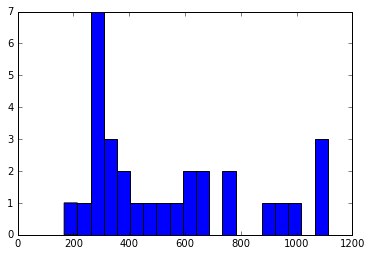

In [224]:
plt.hist(tot_sources, bins=20)
plt.show()

In [229]:
for i, (diasources, visits) in enumerate(zip(tot_sources, tot_visits)):
    print diasources, visits

1067 982181

645 982181^996718

614 982181^996718^995364

355 982181^996718^995364^996717

340 982181^996718^995364^996717^973904

303 982181^996718^995364^996717^973904^982182

282 982181^996718^995364^996717^973904^982182^996719

276 982181^996718^995364^996717^973904^982182^996719^987219

233 982181^996718^995364^996717^973904^982182^996719^987219^988586

167 982181^996718^995364^996717^973904^982182^996719^987219^988586^973905

993 987581

960 987581^994755

770 987581^994755^980477

682 987581^994755^980477^987583

615 987581^994755^980477^987583^996234

531 987581^994755^980477^987583^996234^980473

380 987581^994755^980477^987583^996234^980473^967498

329 987581^994755^980477^987583^996234^980473^967498^976051

290 987581^994755^980477^987583^996234^980473^967498^976051^980475

274 987581^994755^980477^987583^996234^980473^967498^976051^980475^980476

588 986881

915 986881^995366

1109 986881^995366^979510

1112 986881^995366^979510^988127

752 986881^995366^979510^988127^98688

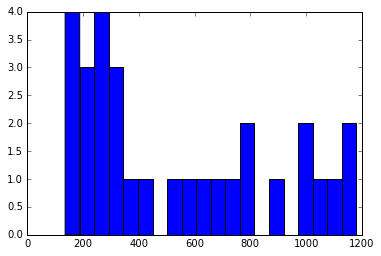

1180 987222

799 987222^973905

755 987222^973905^982182

375 987222^973905^982182^995366

331 987222^973905^982182^995366^973326

263 987222^973905^982182^995366^973326^988125

251 987222^973905^982182^995366^973326^988125^988583

187 987222^973905^982182^995366^973326^988125^988583^982189

172 987222^973905^982182^995366^973326^988125^988583^982189^967850

174 987222^973905^982182^995366^973326^988125^988583^982189^967850^986881

991 996234

1061 996234^980477

978 996234^980477^980476

899 996234^980477^980476^987582

662 996234^980477^980476^987582^975439

557 996234^980477^980476^987582^975439^967502

425 996234^980477^980476^987582^975439^967502^975442

309 996234^980477^980476^987582^975439^967502^975442^975438

250 996234^980477^980476^987582^975439^967502^975442^975438^967500

226 996234^980477^980476^987582^975439^967502^975442^975438^967500^967501

782 986883

607 986883^988583

1126 986883^988583^981584

1137 986883^988583^981584^986882

506 986883^988583^981584^986882^9739

In [234]:
tot_sources = []
tot_visits = []
for i in range(0,30):
    butler = dafPersist.Butler(DATADIR+"stn_tests/test"+str(i))
    cls=butler.get("dayDiff_class_diaSrc", dataId={"date":"2005-02-10", "filter":"r", "tract":0, "patch":"14,14"})
    tot_sources.append(len(cls))
    with open(DATADIR+"stn_tests/test"+str(i)+"/instruction.txt", "rb") as in_file:
        tot_visits.append(in_file.read())
        
plt.hist(tot_sources, bins=20)
plt.show()

for i, (diasources, visits) in enumerate(zip(tot_sources, tot_visits)):
    print diasources, visits

In [239]:
p = range(10)
max_p = range(100)
print p

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [241]:
for i, value in enumerate(max_p):
    print i, p[i/10]
    

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 3
31 3
32 3
33 3
34 3
35 3
36 3
37 3
38 3
39 3
40 4
41 4
42 4
43 4
44 4
45 4
46 4
47 4
48 4
49 4
50 5
51 5
52 5
53 5
54 5
55 5
56 5
57 5
58 5
59 5
60 6
61 6
62 6
63 6
64 6
65 6
66 6
67 6
68 6
69 6
70 7
71 7
72 7
73 7
74 7
75 7
76 7
77 7
78 7
79 7
80 8
81 8
82 8
83 8
84 8
85 8
86 8
87 8
88 8
89 8
90 9
91 9
92 9
93 9
94 9
95 9
96 9
97 9
98 9
99 9


14,14


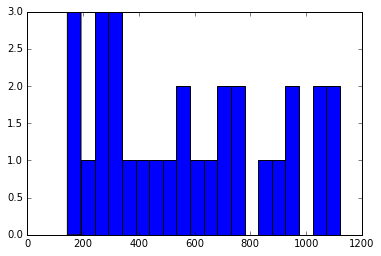

665 988126

930 988126^996718

832 988126^996718^995366

724 988126^996718^995366^973329

440 988126^996718^995366^973329^967851

301 988126^996718^995366^973329^967851^967852

239 988126^996718^995366^973329^967851^967852^981587

160 988126^996718^995366^973329^967851^967852^981587^987219

148 988126^996718^995366^973329^967851^967852^981587^987219^988586

144 988126^996718^995366^973329^967851^967852^981587^987219^988586^987584

1045 976053

1121 976053^974655

943 976053^974655^981583

734 976053^974655^981583^967502

556 976053^974655^981583^967502^987585

425 976053^974655^981583^967502^987585^975439

324 976053^974655^981583^967502^987585^975439^994755

301 976053^974655^981583^967502^987585^975439^994755^980475

265 976053^974655^981583^967502^987585^975439^994755^980475^987581

252 976053^974655^981583^967502^987585^975439^994755^980475^987581^980478

696 982186

911 982186^986887

1082 982186^986887^994756

1035 982186^986887^994756^973330

739 982186^986887^994756^973330^9678

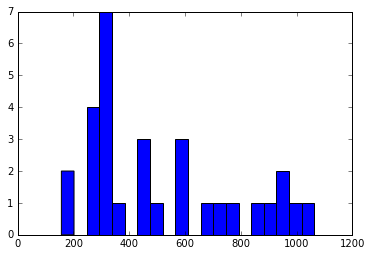

444 996721

575 996721^996719

739 996721^996719^988587

905 996721^996719^988587^973903

496 996721^996719^988587^973903^987219

329 996721^996719^988587^973903^987219^973905

316 996721^996719^988587^973903^987219^973905^988583

255 996721^996719^988587^973903^987219^973905^988583^995368

202 996721^996719^988587^973903^987219^973905^988583^995368^995364

157 996721^996719^988587^973903^987219^973905^988583^995368^995364^973902

938 974655

1064 974655^980476

937 974655^980476^980477

791 974655^980476^980477^979511

670 974655^980476^980477^979511^976054

584 974655^980476^980477^979511^976054^980473

450 974655^980476^980477^979511^976054^980473^981586

345 974655^980476^980477^979511^976054^980473^981586^974653

278 974655^980476^980477^979511^976054^980473^981586^974653^974654

275 974655^980476^980477^979511^976054^980473^981586^974653^974654^973327

882 988129

997 988129^967848

600 988129^967848^987222

463 988129^967848^987222^981587

308 988129^967848^987222^981587^967852


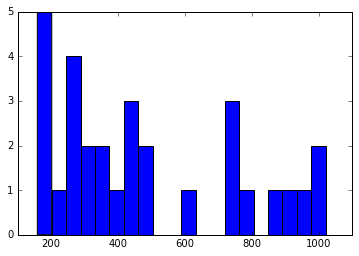

930 987221

760 987221^987219

422 987221^987219^973901

315 987221^987219^973901^967850

215 987221^987219^973901^967850^973902

177 987221^987219^973901^967850^973902^987222

174 987221^987219^973901^967850^973902^987222^996721

169 987221^987219^973901^967850^973902^987222^996721^988583

165 987221^987219^973901^967850^973902^987222^996721^988583^988584

159 987221^987219^973901^967850^973902^987222^996721^988583^988584^996717

890 974655

1020 974655^975439

800 974655^975439^967500

759 974655^975439^967500^976051

624 974655^975439^967500^976051^976053

460 974655^975439^967500^976051^976053^974652

366 974655^975439^967500^976051^976053^974652^974654

340 974655^975439^967500^976051^976053^974652^974654^994757

274 974655^975439^967500^976051^976053^974652^974654^994757^987581

263 974655^975439^967500^976051^976053^974652^974654^994757^987581^987583

728 987584

976 987584^986882

996 987584^986882^967852

466 987584^986882^967852^987220

464 987584^986882^967852^987220^967851


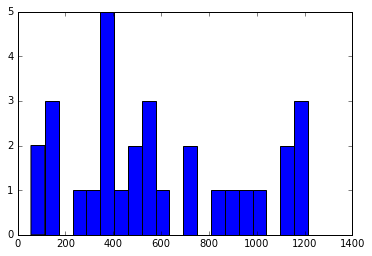

56 988583

1146 988583^981585

1214 988583^981585^973327

576 988583^981585^973327^973902

525 988583^981585^973327^973902^973326

357 988583^981585^973327^973902^973326^995366

169 988583^981585^973327^973902^973326^995366^967850

158 988583^981585^973327^973902^973326^995366^967850^982189

162 988583^981585^973327^973902^973326^995366^967850^982189^979513

92 988583^981585^973327^973902^973326^995366^967850^982189^979513^996720

863 967502

1196 967502^987583

1115 967502^987583^975441

956 967502^987583^975441^980473

746 967502^987583^975441^980473^987585

695 967502^987583^975441^980473^987585^973330

541 967502^987583^975441^980473^987585^973330^974655

473 967502^987583^975441^980473^987585^973330^974655^996234

374 967502^987583^975441^980473^987585^973330^974655^996234^994758

350 967502^987583^975441^980473^987585^973330^974655^996234^994758^976050

987 981584

1175 981584^988126

879 981584^988126^981585

602 981584^988126^981585^994756

517 981584^988126^981585^994756^98758

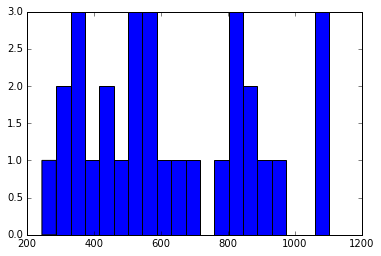

372 996720

538 996720^996717

762 996720^996717^982182

816 996720^996717^982182^982183

896 996720^996717^982182^982183^973905

853 996720^996717^982182^982183^973905^988584

505 996720^996717^982182^982183^973905^988584^973903

454 996720^996717^982182^982183^973905^988584^973903^988586

462 996720^996717^982182^982183^973905^988584^973903^988586^988583

287 996720^996717^982182^982183^973905^988584^973903^988586^988583^973904

1062 967849

1102 967849^979511

829 967849^979511^974652

634 967849^979511^974652^967500

627 967849^979511^974652^967500^976052

548 967849^979511^974652^967500^976052^976053

408 967849^979511^974652^967500^976052^976053^987220

365 967849^979511^974652^967500^976052^976053^987220^975441

307 967849^979511^974652^967500^976052^976053^987220^975441^994755

244 967849^979511^974652^967500^976052^976053^987220^975441^994755^967851

514 982180

959 982180^974652

1080 982180^974652^981587

870 982180^974652^981587^975441

826 982180^974652^981587^975441^99671

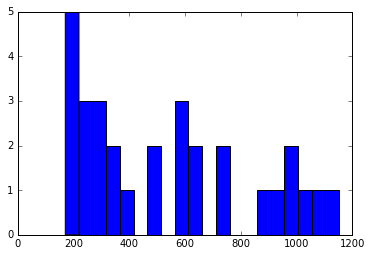

407 982183

1083 982183^973905

628 982183^973905^973902

565 982183^973905^973902^988586

338 982183^973905^973902^988586^973901

199 982183^973905^973902^988586^973901^973904

188 982183^973905^973902^988586^973901^973904^988587

211 982183^973905^973902^988586^973901^973904^988587^988583

194 982183^973905^973902^988586^973901^973904^988587^988583^996719

171 982183^973905^973902^988586^973901^973904^988587^988583^996719^996720

899 982186

913 982186^996718

1051 982186^996718^974653

746 982186^996718^974653^987223

577 982186^996718^974653^987223^988128

508 982186^996718^974653^987223^988128^987584

363 982186^996718^974653^987223^988128^987584^974652

288 982186^996718^974653^987223^988128^987584^974652^987585

278 982186^996718^974653^987223^988128^987584^974652^987585^982189

236 982186^996718^974653^987223^988128^987584^974652^987585^982189^994759

995 967498

1152 967498^979513

959 967498^979513^994756

729 967498^979513^994756^987583

614 967498^979513^994756^987583^98812

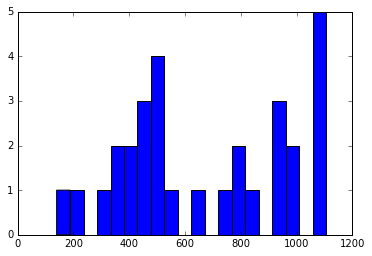

140 988586

376 988586^982183

512 988586^982183^996721

943 988586^982183^996721^982188

927 988586^982183^996721^982188^973905

503 988586^982183^996721^982188^973905^973901

477 988586^982183^996721^982188^973905^973901^982180

450 988586^982183^996721^982188^973905^973901^982180^982182

404 988586^982183^996721^982188^973905^973901^982180^982182^996718

226 988586^982183^996721^982188^973905^973901^982180^982182^996718^973902

782 967501

996 967501^982189

1066 967501^982189^986882

1072 967501^982189^986882^996234

996 967501^982189^986882^996234^981586

744 967501^982189^986882^996234^981586^981584

671 967501^982189^986882^996234^981586^981584^980474

524 967501^982189^986882^996234^981586^981584^980474^988129

450 967501^982189^986882^996234^981586^981584^980474^988129^981587

343 967501^982189^986882^996234^981586^981584^980474^988129^981587^981585

782 967501

924 967501^986882

1106 967501^986882^980474

1088 967501^986882^980474^988586

1058 967501^986882^980474^988586^986

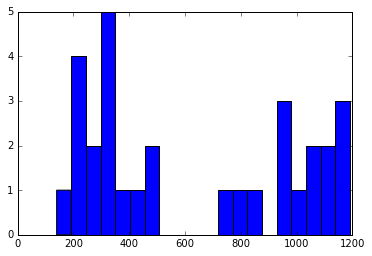

1075 995364

1184 995364^996718

1075 995364^996718^988585

1013 995364^996718^988585^988584

966 995364^996718^988585^988584^982181

480 995364^996718^988585^988584^982181^995368

350 995364^996718^988585^988584^982181^995368^988125

336 995364^996718^988585^988584^982181^995368^988125^982183

201 995364^996718^988585^988584^982181^995368^988125^982183^973902

197 995364^996718^988585^988584^982181^995368^988125^982183^973902^996721

978 981587

1118 981587^986885

1151 981587^986885^986884

1116 981587^986885^986884^987581

975 981587^986885^986884^987581^979511

867 981587^986885^986884^987581^979511^986886

795 981587^986885^986884^987581^979511^986886^973330

483 981587^986885^986884^987581^979511^986886^973330^967849

339 981587^986885^986884^987581^979511^986886^973330^967849^981585

271 981587^986885^986884^987581^979511^986886^973330^967849^981585^975442

435 988127

1191 988127^988126

746 988127^988126^995366

374 988127^988126^995366^973905

304 988127^988126^995366^973905^

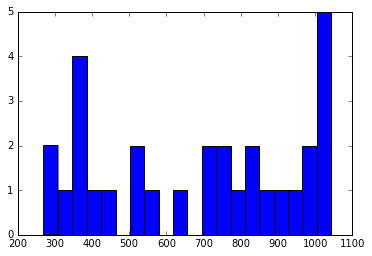

368 996721

451 996721^988586

717 996721^988586^982183

814 996721^988586^982183^988585

973 996721^988586^982183^988585^988584

993 996721^988586^982183^988585^988584^988583

720 996721^988586^982183^988585^988584^988583^973903

423 996721^988586^982183^988585^988584^988583^973903^973901

385 996721^988586^982183^988585^988584^988583^973903^973901^988587

270 996721^988586^982183^988585^988584^988583^973903^973901^988587^973905

570 988128

901 988128^986885

1008 988128^986885^973326

1016 988128^986885^973326^980474

932 988128^986885^973326^980474^979511

863 988128^986885^973326^980474^979511^986881

805 988128^986885^973326^980474^979511^986881^973330

749 988128^986885^973326^980474^979511^986881^973330^973327

620 988128^986885^973326^980474^979511^986881^973330^973327^980475

514 988128^986885^973326^980474^979511^986881^973330^973327^980475^987581

1012 967850

1043 967850^996718

1033 967850^996718^982180

822 967850^996718^982180^975442

761 967850^996718^982180^975442^986

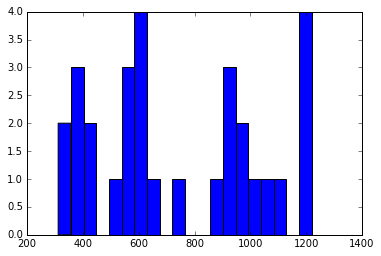

381 982184

602 982184^988586

907 982184^988586^988585

1180 982184^988586^988585^988584

1219 982184^988586^988585^988584^996718

1217 982184^988586^988585^988584^996718^982189

742 982184^988586^988585^988584^996718^982189^995368

624 982184^988586^988585^988584^996718^982189^995368^982185

604 982184^988586^988585^988584^996718^982189^995368^982185^982182

580 982184^988586^988585^988584^996718^982189^995368^982185^982182^982180

903 976050

1050 976050^980475

1180 976050^980475^980476

963 976050^980475^980476^981584

653 976050^980475^980476^981584^974654

575 976050^980475^980476^981584^974654^994757

408 976050^980475^980476^981584^974654^994757^974653

365 976050^980475^980476^981584^974654^994757^974653^982186

311 976050^980475^980476^981584^974654^994757^974653^982186^976054

316 976050^980475^980476^981584^974654^994757^974653^982186^976054^973327

538 986884

882 986884^986887

1104 986884^986887^987221

1033 986884^986887^987221^979510

987 986884^986887^987221^979510^9

In [243]:
patches = ["14,14","15,15","14,15","12,12","16,16","17,17","14,17","15,17","16,17","15,14"]



for p in patches:
    print "============="
    print p
    tot_sources = []
    tot_visits = []
    for i in range(0,30):
        butler = dafPersist.Butler(DATADIR+"stn_tests"+p+"/test"+str(i))
        cls=butler.get("dayDiff_class_diaSrc", dataId={"date":"2005-02-10", "filter":"r", "tract":0, "patch":p})
        tot_sources.append(len(cls))
        with open(DATADIR+"stn_tests"+p+"/test"+str(i)+"/instruction.txt", "rb") as in_file:
            tot_visits.append(in_file.read())

    plt.hist(tot_sources, bins=20)
    plt.show()

    for i, (diasources, visits) in enumerate(zip(tot_sources, tot_visits)):
        print diasources, visits


In [138]:
patches = ["14,14","15,15","14,15","12,12","16,16","17,17","14,17","15,17","16,17","15,14", "12,13","12,14","12,15","12,16","12,17","13,13","13,14","13,15","13,16","13,17"]

global_lens = []

for p in patches:
    print "============="
    print p
    tot_sources = []
    tot_visits = []
    for i in range(0,30):
        butler = dafPersist.Butler(DATADIR+"stn_tests"+p+"/test"+str(i))
        cls=butler.get("dayDiff_class_diaSrc", dataId={"date":"2005-02-10", "filter":"r", "tract":0, "patch":p})
        tot_sources.append(len(cls))
        with open(DATADIR+"stn_tests"+p+"/test"+str(i)+"/instruction.txt", "rb") as in_file:
            tot_visits.append(in_file.read())
    global_lens.append(tot_sources)



14,14
15,15
14,15
12,12
16,16
17,17
14,17
15,17
16,17
15,14
12,13
12,14
12,15
12,16
12,17
13,13
13,14
13,15
13,16
13,17


In [139]:
tot = np.mean(global_lens, axis=0)
err = np.std(global_lens, axis=0)

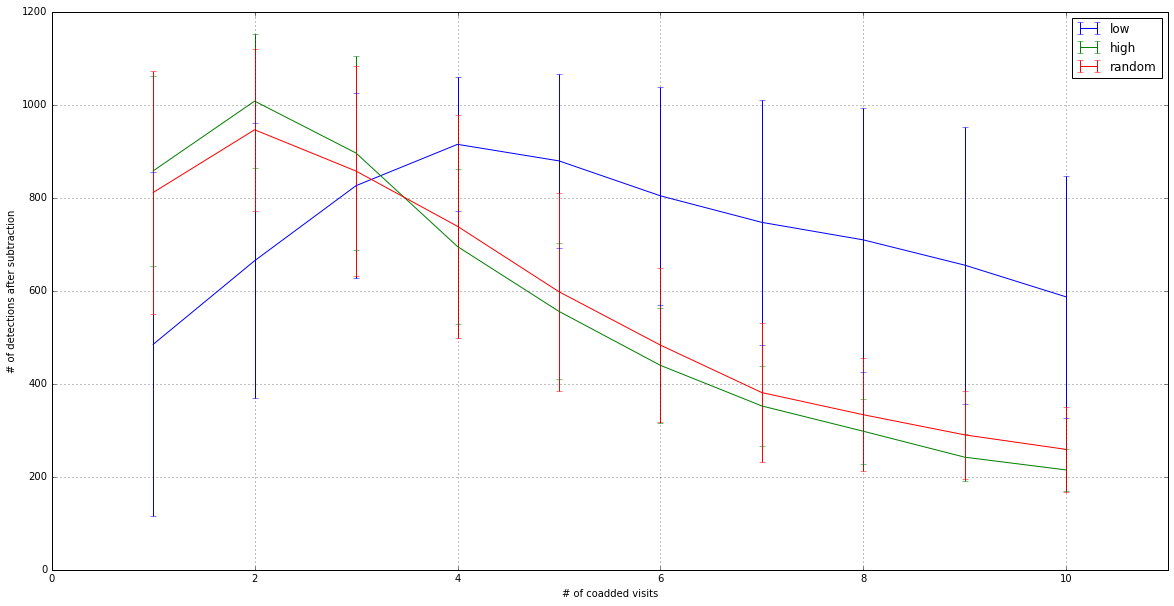

In [140]:
plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[:10], yerr=err[:10], label="low")
plt.errorbar(range(1,11),tot[10:20], yerr=err[10:20], label="high")
plt.errorbar(range(1,11),tot[20:], yerr=err[20:], label="random")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.grid()
plt.show()




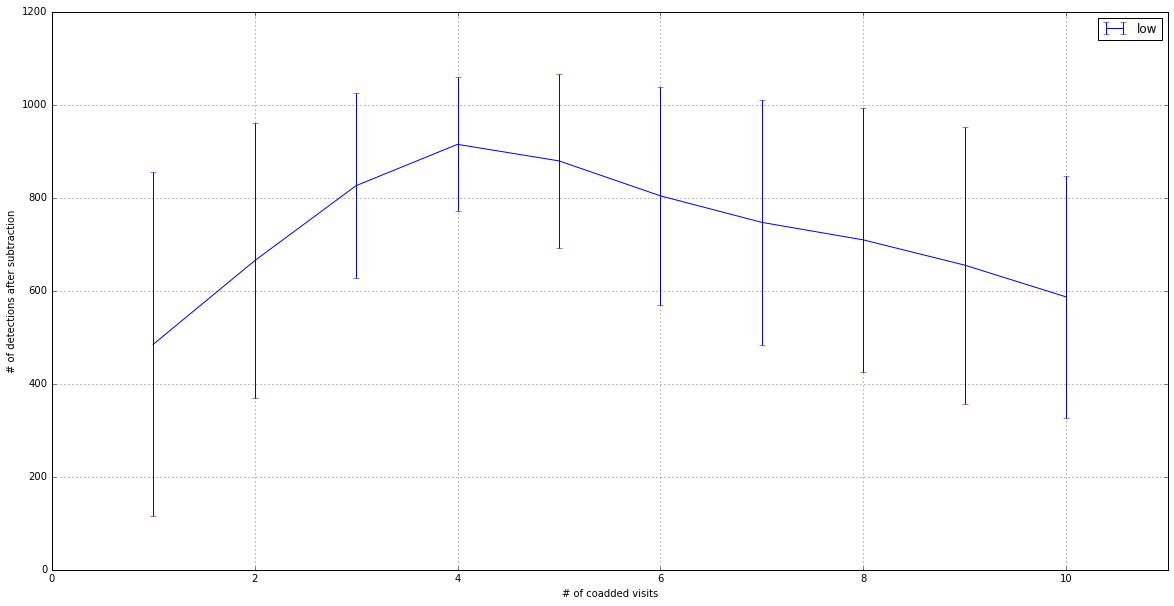

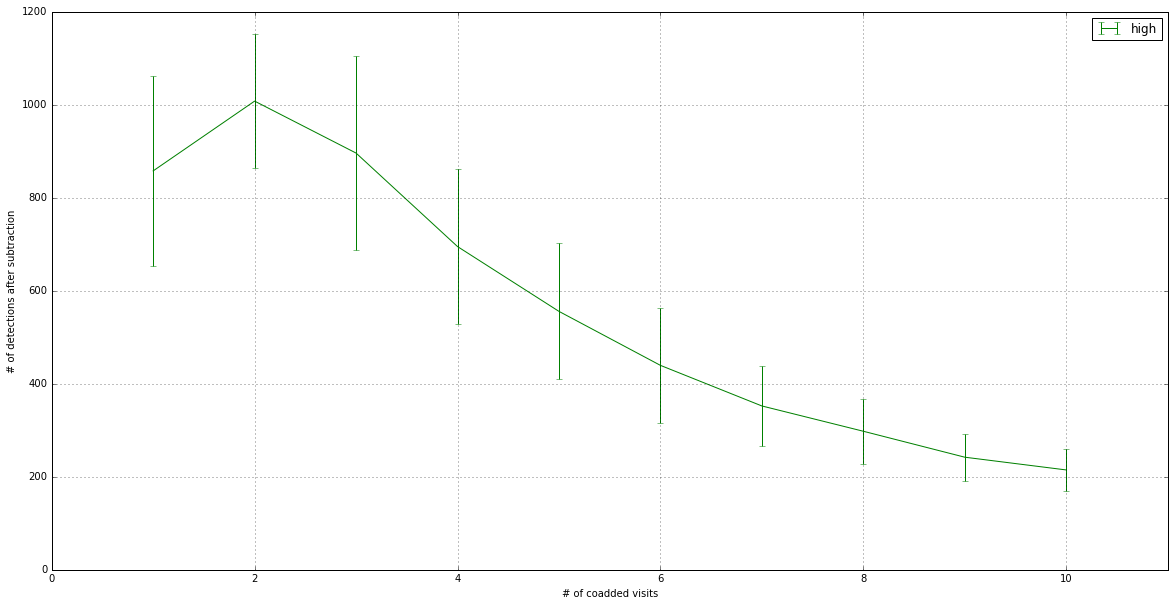

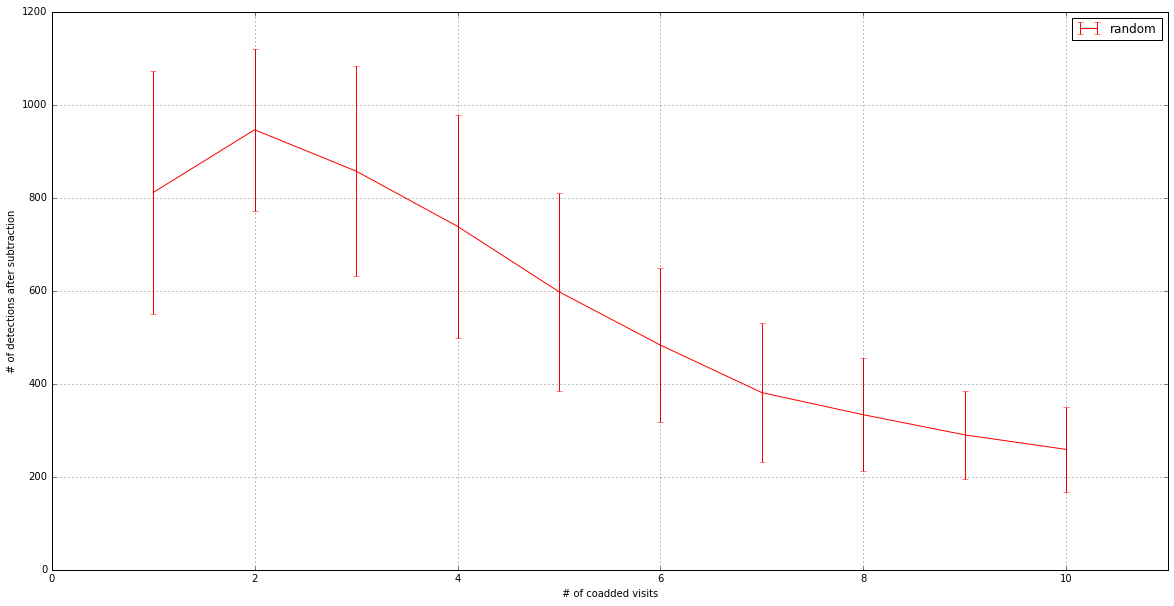

In [141]:
plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[:10], yerr=err[:10], label="low")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.ylim(ymin=0, ymax=1200)
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[10:20], yerr=err[10:20], c="green", label="high")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.ylim(ymin=0, ymax=1200)
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.errorbar(range(1,11),tot[20:], yerr=err[20:], c="red", label="random")
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=0, xmax=11)
plt.ylim(ymin=0, ymax=1200)
plt.grid()
plt.show()




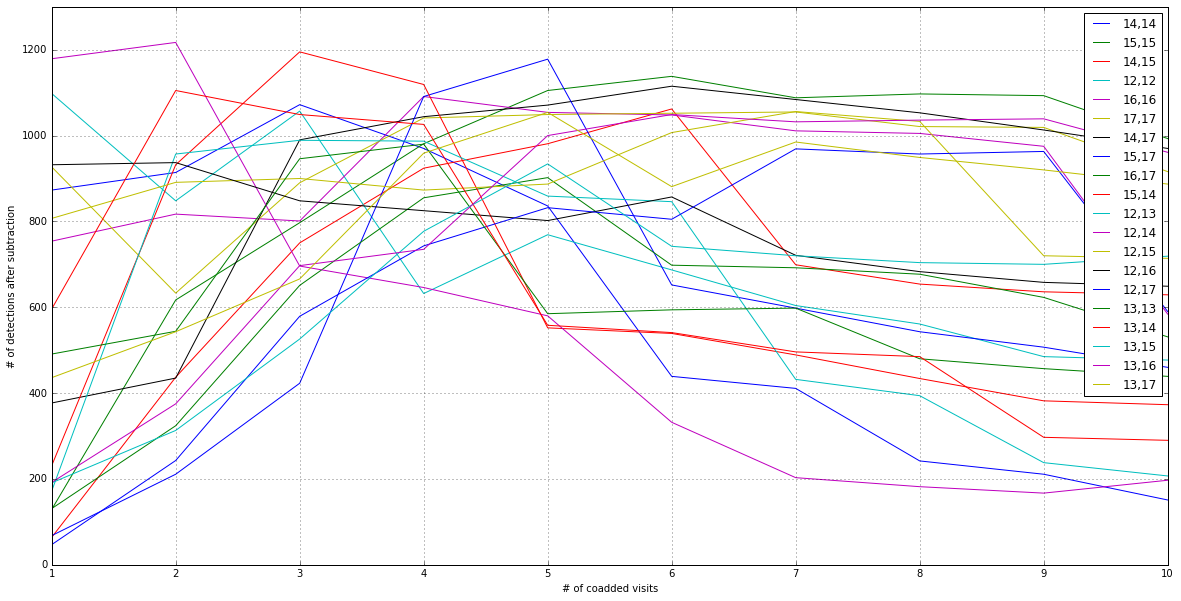

In [142]:

plt.figure(figsize=(20,10))
for i, gl in enumerate(global_lens):
    plt.plot(range(1,11),gl[:10], label=patches[i])
    
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0, ymax=1300)
plt.grid()
plt.show()

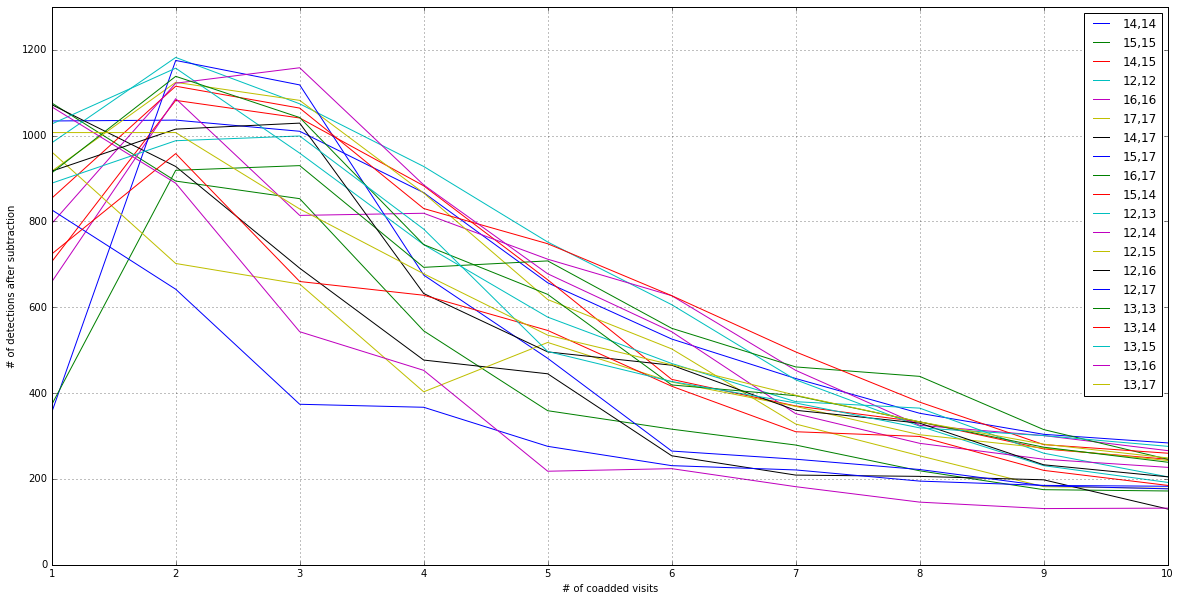

In [143]:
plt.figure(figsize=(20,10))
for i, gl in enumerate(global_lens):
    plt.plot(range(1,11),gl[10:20], label=patches[i])
    
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0, ymax=1300)
plt.grid()
plt.show()

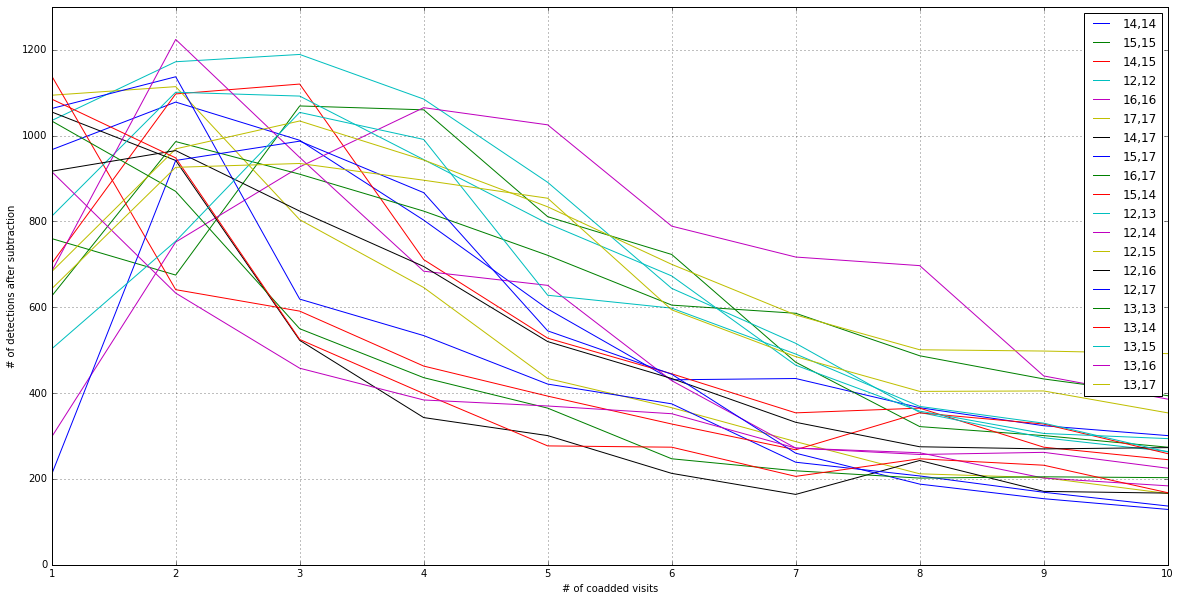

In [144]:
plt.figure(figsize=(20,10))
for i, gl in enumerate(global_lens):
    plt.plot(range(1,11),gl[20:], label=patches[i])
    
plt.legend()
plt.xlabel("# of coadded visits")
plt.ylabel("# of detections after subtraction")
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0, ymax=1300)
plt.grid()
plt.show()

In [215]:
stns = pickle.load( open( "/datadec/cppm/jpreyes/CFHT_Production/stns.p", "rb" ) )

In [216]:
stns

{967498: {0: 2.523480799055084,
  1: 14.332735835081243,
  2: 5.5175039460337612,
  3: 6.6332757272651515,
  4: 6.4769892370227753,
  5: 11.481982567778759,
  6: 6.8327450238559866,
  7: 3.5203727086709296,
  8: 4.0353819198867207,
  9: 11.606951669732611,
  10: 17.827989042402642,
  11: 8.3005560837515002,
  12: 12.664894476118789,
  13: 9.9338524022396602,
  14: 12.488631956456222,
  15: 18.976407120440594,
  16: 3.8267921936764213,
  17: 3.4821720578388726,
  18: 18.611496942339539,
  19: 3.7075797926479037,
  20: 17.797487871077873,
  21: 8.2673205113288279,
  22: 7.7082058082442524,
  23: 15.057510989394897,
  24: 10.893412868172319,
  25: 9.9062324773138712,
  26: 4.7400141837533605,
  27: 17.182016024607709,
  28: 2.4845155314521929,
  29: 8.1745265478724729,
  30: 5.7422894856391835,
  31: 30.04021853302087,
  32: 10.915536030086145,
  33: 12.666204556284258,
  34: 10.731672697007246,
  35: 3.8750932384707473},
 967499: {0: 2.1325089736912575,
  1: 13.984634267650218,
  2: 4.75

In [218]:
patch_dict = pickle.load(open("/datadec/cppm/jpreyes/CFHT_Production/patches_dict.pickle","rb"))


In [219]:
patch_dict

{(5, 5): {967498: {27: 17.182016024607709},
  967499: {27: 18.018908768418537},
  967500: {27: 16.319266750444211},
  967501: {27: 17.42950354644859},
  967848: {27: 13.287022389110762},
  967849: {27: 12.079057490898951},
  967850: {27: 12.25110507317153},
  967851: {27: 11.561079175472486},
  973326: {27: 14.648925465418914},
  973327: {27: 15.179650359662528},
  973328: {27: 14.437655244964434},
  973329: {27: 13.798777983036281},
  973901: {27: 11.282313348700891},
  973902: {27: 9.3806355370446486},
  973903: {27: 8.693916167402655},
  973904: {27: 9.3523220394759967},
  974652: {27: 18.608041488414429},
  974653: {27: 16.350311873070869},
  974654: {27: 16.060814151926511},
  974655: {27: 18.334164734383776},
  975438: {27: 17.274263478242336},
  975439: {27: 17.123571722724975},
  975440: {27: 16.114927758333703},
  975441: {27: 18.219348461506343},
  976050: {27: 19.670449196517016},
  976051: {27: 18.662039037760163},
  976052: {27: 18.33196069647046},
  976053: {27: 20.486361

In [232]:
visits = patch_dict[(20,20)]
vals = visits[967849].values()
print vals,  np.median(vals)

[6.1167359612440952, 3.7417019512251604, 5.9604460123816283, 11.514104982140003] 6.03859098681


In [289]:
np.min(visits[v].values())

13.203258169506626

In [293]:
patch = "10,10"
high = []

h = int(patch.split(",")[0])
v = int(patch.split(",")[-1])

visits= patch_dict[(h,v)]

visit_pairs = []
visits_keys = []

for v in visits.keys():
    visit_pairs.append( ((np.min(visits[v].values()), np.max(visits[v].values()) ),str(v))  )

visit_pairs.sort()
#low= np.column_stack(visit_pairs[:10])[-1]
#print low
high=np.column_stack(visit_pairs[-10:])[-1]


In [294]:
"^".join(high)

'973328^967850^979512^995366^974654^981585^967500^976052^975440^994757'

In [257]:
import re
patches_file=open(DATADIR+"/patches.txt", "rb")
for line in patches_file:
        line = line.replace('\n','')
        text = re.split("=| ",line)
        patches.append(text[-1])
patches_file.close()


In [269]:
patches_2 = [p for p in patches if (int(p.split(",")[0]),int(p.split(",")[-1])) in patch_dict.keys()]

In [270]:
len(patches), len(patches_2)

(545, 440)

In [265]:
p

'24,25'

In [266]:
p.split(",")[0]

'24'

In [283]:
patch_dict = pickle.load(open("/datadec/cppm/jpreyes/CFHT_Production/patches_dict_stns.pickle","rb"))
patch_dict_psf = pickle.load(open("/datadec/cppm/jpreyes/CFHT_Production/patch_dict_old.pickle","rb"))

In [284]:
print patch_dict[(15,15)]

{982187: {14: 8.2978714926773822, 13: 6.4675095784179861, 22: 6.5305986187550324, 23: 12.474340300540852}, 967852: {13: 10.832810507042362, 22: 6.3586512935619943}, 973326: {13: 7.4877715923255463, 22: 5.9935147489969545, 23: 10.378571322071801}, 973327: {13: 10.379841966582747, 22: 7.8472952340838553}, 973328: {14: 8.4820582830846476, 13: 6.086740964779926, 22: 7.0242228738751011, 23: 12.719603573068071}, 973329: {14: 8.2209769062719538, 13: 8.1807188677911533, 22: 5.7599258739795687, 23: 10.548523936081894}, 973330: {13: 7.5812325458268583, 22: 4.9973469628611404}, 995364: {13: 9.3560286273401605, 22: 7.3896631413919769}, 995365: {13: 12.131462895290008, 22: 8.3409668321566279}, 995366: {14: 10.037189425331261, 13: 8.0582395727195664, 22: 7.5173800973901912}, 995367: {14: 10.161193960479228, 13: 10.02018590096149, 22: 6.3248835755393893, 23: 13.567843281628848}, 995368: {13: 10.348266344909399, 22: 6.0056076462757684}, 979510: {14: 9.3167422031018141, 13: 8.2049824811453416, 22: 6.55

In [285]:
print patch_dict_psf[(15,15)]

{982187: {14: 8.2978714926773822, 13: 6.4675095784179861, 22: 6.5305986187550324, 23: 12.474340300540852}, 967852: {13: 10.832810507042362, 22: 6.3586512935619943}, 973326: {13: 7.4877715923255463, 22: 5.9935147489969545, 23: 10.378571322071801}, 973327: {13: 10.379841966582747, 22: 7.8472952340838553}, 973328: {14: 8.4820582830846476, 13: 6.086740964779926, 22: 7.0242228738751011, 23: 12.719603573068071}, 973329: {14: 8.2209769062719538, 13: 8.1807188677911533, 22: 5.7599258739795687, 23: 10.548523936081894}, 973330: {13: 7.5812325458268583, 22: 4.9973469628611404}, 995364: {13: 9.3560286273401605, 22: 7.3896631413919769}, 995365: {13: 12.131462895290008, 22: 8.3409668321566279}, 995366: {14: 10.037189425331261, 13: 8.0582395727195664, 22: 7.5173800973901912}, 995367: {14: 10.161193960479228, 13: 10.02018590096149, 22: 6.3248835755393893, 23: 13.567843281628848}, 995368: {13: 10.348266344909399, 22: 6.0056076462757684}, 979510: {14: 9.3167422031018141, 13: 8.2049824811453416, 22: 6.55